# Project - Python For Data Analysis 🐍 

---

## Addiction to drugs 💊

Various studies have outlined that personality attributes are related with drug consumption.
3 psychologic tests:
- Big Five personality traits (NEO-FFI-R), 
- impulsivity (BIS-11), available
- sensation seeking (ImpSS)


• A drug is a ‘chemical that influences biological function (other than by providing
nutrition or hydration)’.  
• A psychoactive drug is a ‘drug whose influence is in a part on mental functions’.



**Set mesurable objective for our project:**
- **Objective:** Predict the frequency of addiction of certain drugs
- **Metrics:** balanced_accuracy_score, confusion matrix

### *Table of Contents*

- [Requirements](#requirements)
- [Import data](#import_data)
- [Data Vizualisation](#data_viz) 🔎
  - [Global analysis of the dataset](#global_analysis) 
  - [Exploration of all columns](#col_exploration) 
  - [Missing values](#missing_values) 
  - [Relationships](#relationships) 
  - [PCA](#pca) 
- [Preprocessing](#preprocessing)
- [Modeling](#modeling)
  - [Initial classes](#initial_classes) 
  - [New classes](#new_classes) 
  - [Tuning hyperparameters](#tuning) 
  - [Neural Networks](#neural_networks) 
- [Final models for each drugs](#final_models)
  - [Alcohol](#alcohol) 
  - [Amphet](#amphet) 
  - [Amyl](#amyl) 
  - [Benzos](#benzos) 
  - [Caff](#caff) 
  - [Cannabis](#cannabis) 
  - [Coke](#coke) 
  - [Crack](#crack) 
  - [Esctasy](#esctasy)
  - [Heroin](#heroin) 
  - [Ketamine](#ketamine) 
  - [Legalh](#legalh) 
  - [Meth](#meth) 
  - [LSD](#lsd) 
  - [Mushrooms](#mushrooms) 
  - [Nicotine](#nicotine)
  - [VSA](#vsa) 

<a name="requirements">

### Requirements

In [1]:
# Data
import numpy as np
import pandas as pd

# Vizualisation
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Utils
from tqdm.notebook import tqdm
import scipy.stats as stats
import pickle 

# Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, make_scorer, roc_curve, auc

# Model selection and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine Learning models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Deep Learning
import tensorflow as tf
from tensorflow import keras 

# Set a style to our plots
plt.style.use('ggplot')

<a name="import_data">

### Import data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data',header = None)

In [3]:
column_names = ['ID','Age','Gender','Education','Country','Ethnicity',
                'Nscore','Escore','Oscore','Ascore','Cscore','Impulsive',
                'SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis',
                'Choc','Coke','Crack','Esctasy','Heroin','Ketamine','Legalh',
                'LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
feature_names = ["Age","Gender","Education",'Country','Ethnicity',
                'Nscore','Escore','Oscore','Ascore','Cscore','Impulsive',
                'SS']
drug_names = ['Alcohol', 'Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Esctasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
df.columns = column_names

In [4]:
df.head()

ID      Age   Gender  Education  Country  ...  Meth  Mushrooms  Nicotine  Semer  VSA
0   1  0.49788  0.48246   -0.05921  0.96082  ...   CL0        CL0       CL2    CL0  CL0
1   2 -0.07854 -0.48246    1.98437  0.96082  ...   CL3        CL0       CL4    CL0  CL0
2   3  0.49788 -0.48246   -0.05921  0.96082  ...   CL0        CL1       CL0    CL0  CL0
3   4 -0.95197  0.48246    1.16365  0.96082  ...   CL0        CL0       CL2    CL0  CL0
4   5  0.49788  0.48246    1.98437  0.96082  ...   CL0        CL2       CL2    CL0  CL0

[5 rows x 32 columns]

<a name="data_viz">

## Data Vizualisation

---

In [ ]:
class_drugs = ["Never Used", "Used over a decade ago", "Used in Last Decade", "Used in the Last Year", "Used in the Last month", "Used in the Last Week", "Used in Last Day"]
class_age = ["18-24","25-34","35-44","45-54","55-64","64+"]
class_gender = ["Man", "Women"]
class_education = ["Left school before 16 years", "Left school at 16 years", "Left school at 17 years", "Left school at 18 years", "Some college or university, no certificate or degree",
                   "Professional certificate/ diploma 270 14.32%", "University degree", "Master's degree", "Doctoral degree"]
class_country = ["USA", "New Zealand", "Other", "Australia", "Republic of Ireland", "Canada", "UK"]
class_Ethnicity = ["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]
class_nscore = np.arange(12,61)
class_escore = np.delete(np.arange(16,60), [1,-3])
class_oscore = np.delete(np.arange(24,61), [1,3])
class_ascore = np.delete(np.arange(12,61), [1,2,3,5,7,8,9,10])
class_cscore = np.delete(np.arange(17,60), [1,-2])


df_viz = df.copy()
df_viz.iloc[:,13:] = df.iloc[:,13:].replace(sorted(df.Cannabis.unique()),class_drugs)
df_viz.loc[:,"Age"] = df.loc[:,"Age"].replace(sorted(df.Age.unique()),class_age)
df_viz.loc[:,"Gender"] = df.loc[:,"Gender"].replace(sorted(df.Gender.unique()),class_gender)
df_viz.loc[:,"Education"] = df.loc[:,"Education"].replace(sorted(df.Education.unique()),class_education)
df_viz.loc[:,"Country"] = df.loc[:,"Country"].replace(sorted(df.Country.unique()),class_country)
df_viz.loc[:,"Ethnicity"] = df.loc[:,"Ethnicity"].replace(sorted(df.Ethnicity.unique()),class_Ethnicity)

df_viz.loc[:,"Nscore"] = df.loc[:,"Nscore"].replace(sorted(df.Nscore.unique()),class_nscore)
df_viz.loc[:,"Escore"] = df.loc[:,"Escore"].replace(sorted(df.Escore.unique()),class_escore)
df_viz.loc[:,"Oscore"] = df.loc[:,"Oscore"].replace(sorted(df.Oscore.unique()),class_oscore)
df_viz.loc[:,"Ascore"] = df.loc[:,"Ascore"].replace(sorted(df.Ascore.unique()),class_ascore)
df_viz.loc[:,"Cscore"] = df.loc[:,"Cscore"].replace(sorted(df.Cscore.unique()),class_cscore)

# We consider that user over a decade can be grouped with the never used class
for drug in drug_names:
    df_viz[f"{drug}_used"] = df_viz[drug].replace(class_drugs, ["Never Used","Never Used","Used","Used","Used","Used","Used"])

We don't have information on the real values for SS and impulsive

<a name="global_analysis">

### Global analysis of the dataset

In [ ]:
df.describe()

ID         Age  ...    Impulsive           SS
count  1885.000000  1885.00000  ...  1885.000000  1885.000000
mean    945.294960     0.03461  ...     0.007216    -0.003292
std     545.167641     0.87836  ...     0.954435     0.963701
min       1.000000    -0.95197  ...    -2.555240    -2.078480
25%     474.000000    -0.95197  ...    -0.711260    -0.525930
50%     946.000000    -0.07854  ...    -0.217120     0.079870
75%    1417.000000     0.49788  ...     0.529750     0.765400
max    1888.000000     2.59171  ...     2.901610     1.921730

[8 rows x 13 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

There are 1885 entry in the dataset, which not much.

In this dataset with have 32 columns:
- 13 features
There are:
  - 9 numerical features: ID, Age, Nscore, Escore, Oscore, Ascore, CScore, Impulsive, ss
  However, except for ID, all these numerical features have been grouped (for example by class of age) and then have been labeled encoded and normalized.
  - 4 categorical features: Gender Education, Country, Ethnicity  
However these categorical values have been labeled encoded and normalized
- 19 targets that represent the addiction for each drugs  
Targets are categoric and contain the following classes:
  - CLO: Never Used
  - CL1: Used over a Decade Ago
  - CL2: Used in Last Decade
  - CL3: Used in Last Year
  - CL4: Used in Last Month
  - CL5: Used in Last Week
  - CL6: Used in Last Day

<a name="col_exploration">

### Exploration of all columns

#### ID column

In [ ]:
df.ID.nunique()

1885

All ID values are unique

#### Features

As mentionned in the description of the dataset, we have:   
**Demographic informations**
- Age
- Gender
- Education
- Country
- Ethnicity	  

**Psychological test scores**
- NEO-FFI-R
  - Nscore	
  - Escore	
  - Oscore	
  - Ascore	
  - Cscore	
- BIS11: Impulsive	
- ImpSS: SS


##### Age

In [ ]:
df.Age.value_counts(normalize=True)

-0.95197    0.341114
-0.07854    0.255172
 0.49788    0.188859
 1.09449    0.155968
 1.82213    0.049337
 2.59171    0.009549
Name: Age, dtype: float64

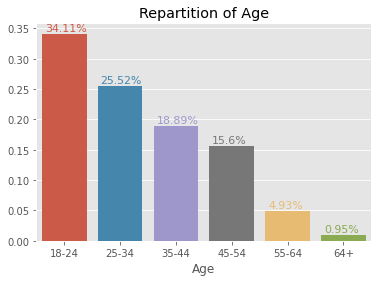

In [ ]:
age_density = pd.DataFrame(df_viz.Age.value_counts(normalize=True)).reset_index()

ylabels = age_density.Age.values

fig, ax = plt.subplots()
sns.barplot(x = "index", y = "Age", data = age_density, ax=ax, order=class_age)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.35, 
            y=m+0.005, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("Age")
ax.set_ylabel("")
ax.set_title("Repartition of Age")
fig.show()

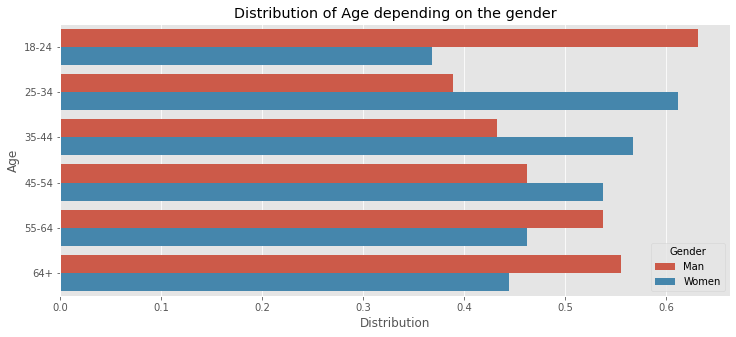

In [ ]:
plt.figure(figsize=(12,5))
df_bar = pd.DataFrame(df_viz.groupby(["Age"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Age", hue = "Gender", order = class_age, data = df_bar)
plt.title(f"Distribution of Age depending on the gender")
plt.show()

##### Gender

In [ ]:
df.Gender.value_counts(normalize=True)

-0.95197    0.341114
-0.07854    0.255172
 0.49788    0.188859
 1.09449    0.155968
 1.82213    0.049337
 2.59171    0.009549
Name: Age, dtype: float64

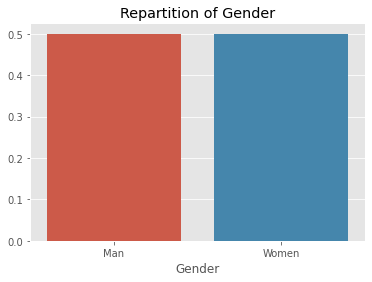

In [ ]:
gender_density = pd.DataFrame(df_viz.Gender.value_counts(normalize=True)).reset_index()
fig, ax = plt.subplots()
sns.barplot(x = "index", y = "Gender", data = gender_density, ax=ax)
ax.set_xlabel("Gender")
ax.set_ylabel("")
ax.set_title("Repartition of Gender")
fig.show()

Equal gender repartition

##### Education

In [ ]:
df.Education.value_counts(normalize=True)

-0.61113    0.268435
 0.45468    0.254642
 1.16365    0.150133
-0.05921    0.143236
-1.22751    0.053050
-1.73790    0.052520
 1.98437    0.047215
-1.43719    0.015915
-2.43591    0.014854
Name: Education, dtype: float64

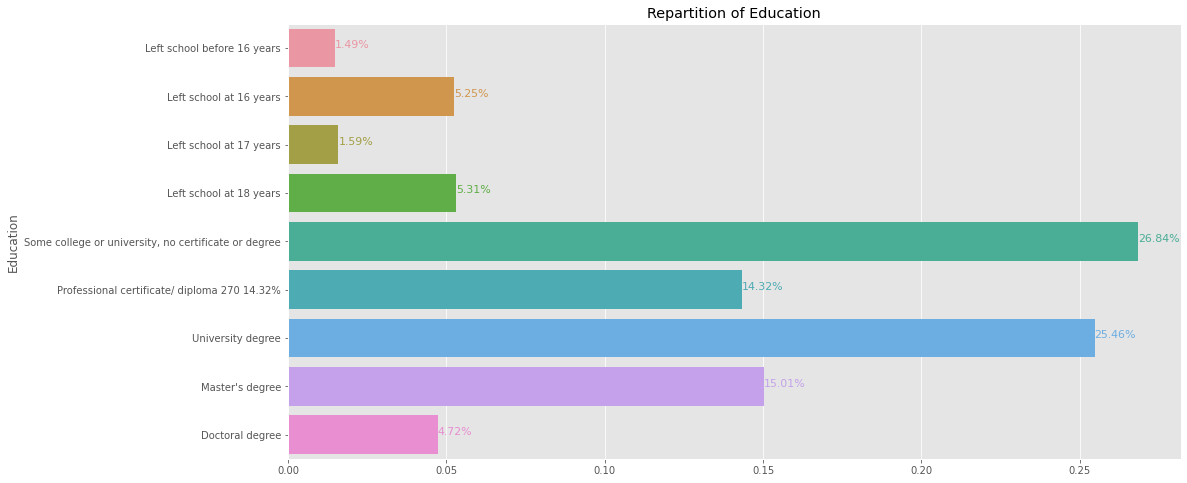

In [ ]:
education_density = pd.DataFrame(df_viz.Education.value_counts(normalize=True)).reset_index()

fig, ax = plt.subplots(figsize=(16,8))
bar = sns.barplot(x = "Education", y = "index", data = education_density, ax=ax, order=class_education)

ylabels = [ax.patches[i].get_bbox().get_points()[1][0] for i in range(education_density.shape[0])]

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=m, 
            y=y, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)
    
ax.set_xlabel("")
ax.set_ylabel("Education")
ax.set_title("Repartition of Education")
fig.show()

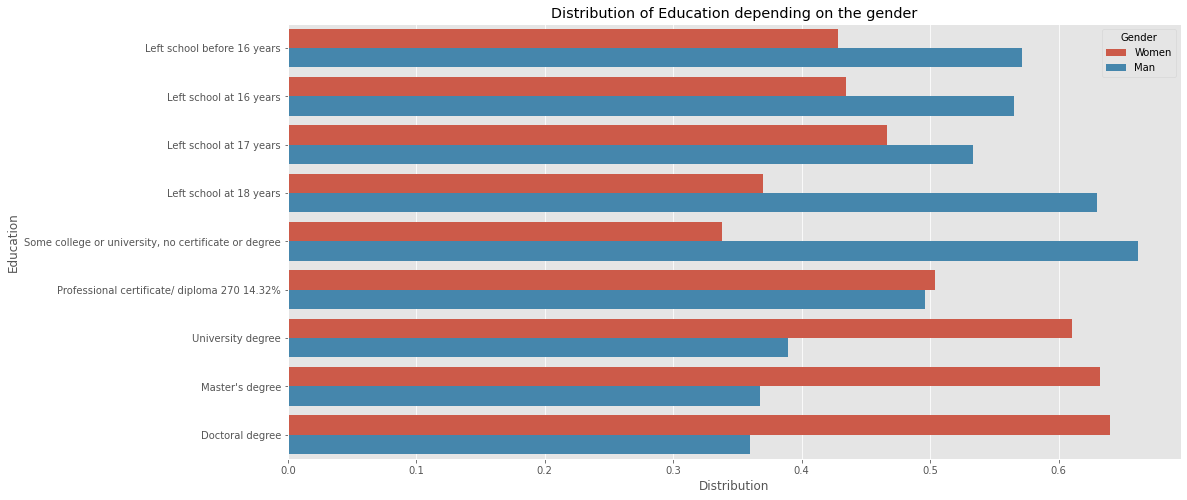

In [ ]:
plt.figure(figsize=(16,8))
df_bar = pd.DataFrame(df_viz.groupby(["Education"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Education", hue = "Gender", order = class_education, data = df_bar)
plt.title(f"Distribution of Education depending on the gender")
plt.show()

##### Country

In [ ]:
df.Country.value_counts(normalize=True)

 0.96082    0.553846
-0.57009    0.295491
-0.28519    0.062599
 0.24923    0.046154
-0.09765    0.028647
 0.21128    0.010610
-0.46841    0.002653
Name: Country, dtype: float64

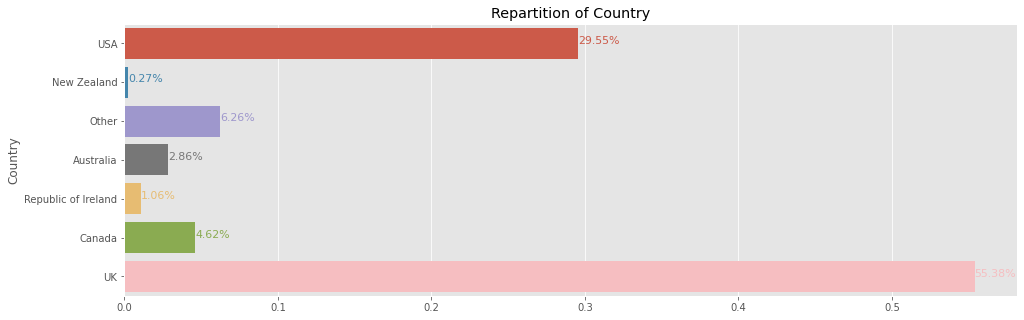

In [ ]:
country_density = pd.DataFrame(df_viz.Country.value_counts(normalize=True)).reset_index()

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x = "Country", y = "index", data = country_density, ax=ax, order=class_country)

ylabels = [ax.patches[i].get_bbox().get_points()[1][0] for i in range(country_density.shape[0])]

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=m, 
            y=y, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)
    
ax.set_xlabel("")
ax.set_ylabel("Country")
ax.set_title("Repartition of Country")
fig.show()

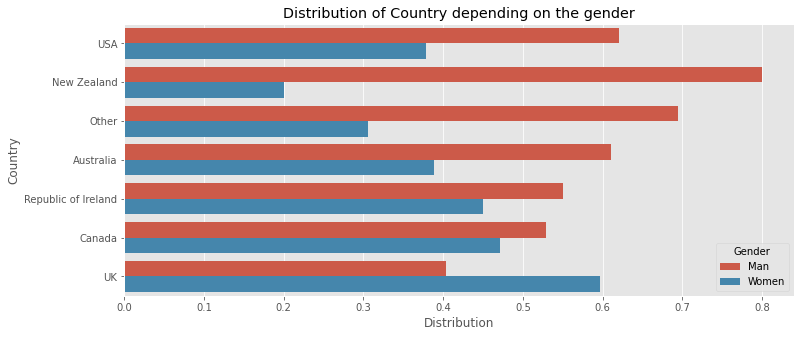

In [ ]:
plt.figure(figsize=(12,5))
df_bar = pd.DataFrame(df_viz.groupby(["Country"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Country", hue = "Gender", order = class_country, data = df_bar)
plt.title(f"Distribution of Country depending on the gender")
plt.show()

##### Ethnicity

In [ ]:
df.Ethnicity.value_counts(normalize=True)

-0.31685    0.912467
 0.11440    0.033422
-1.10702    0.017507
-0.50212    0.013793
-0.22166    0.010610
 0.12600    0.010610
 1.90725    0.001592
Name: Ethnicity, dtype: float64

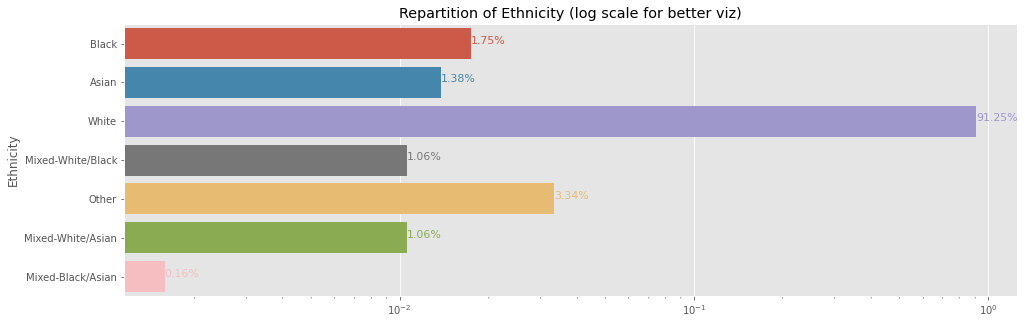

In [ ]:
ethnicity_density = pd.DataFrame(df_viz.Ethnicity.value_counts(normalize=True)).reset_index()

fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(x = "Ethnicity", y = "index", data = ethnicity_density, ax=ax, order=class_Ethnicity)

ylabels = [ax.patches[i].get_bbox().get_points()[1][0] for i in range(ethnicity_density.shape[0])]

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=m, 
            y=y, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)
    
ax.set_xlabel("")
ax.set_xscale('log')

ax.set_ylabel("Ethnicity")
ax.set_title("Repartition of Ethnicity (log scale for better viz)")
fig.show()

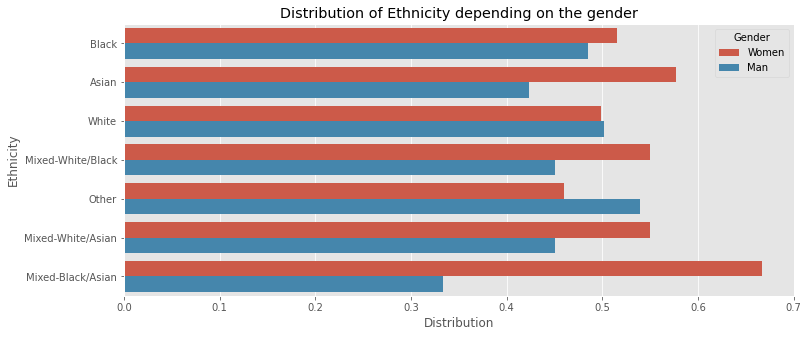

In [ ]:
plt.figure(figsize=(12,5))
df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])["Gender"].value_counts(normalize = True))
df_bar.rename(columns = {"Gender":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Ethnicity", hue = "Gender", order = class_Ethnicity, data = df_bar)
plt.title(f"Distribution of Ethnicity depending on the gender")
plt.show()

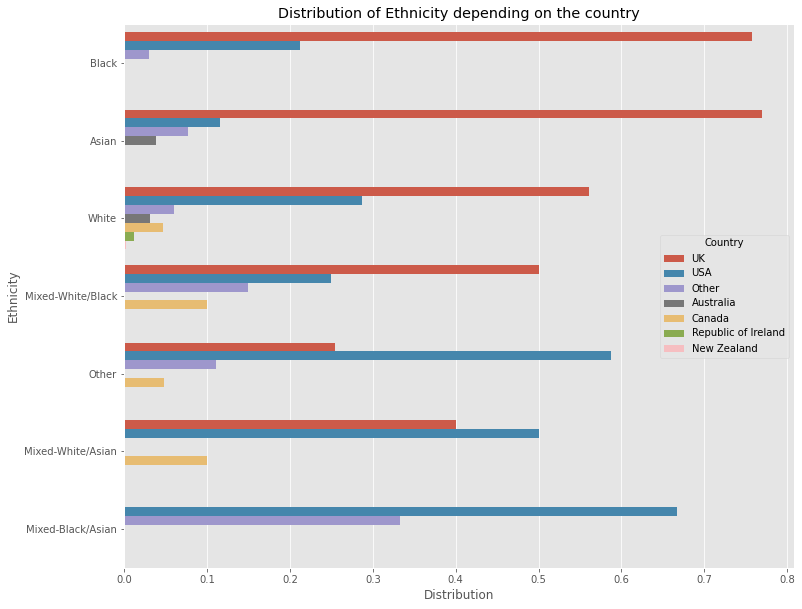

In [ ]:
plt.figure(figsize=(12,10))
df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])["Country"].value_counts(normalize = True))
df_bar.rename(columns = {"Country":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Ethnicity", hue = "Country", order = class_Ethnicity, data = df_bar)
plt.title(f"Distribution of Ethnicity depending on the country")
plt.show()

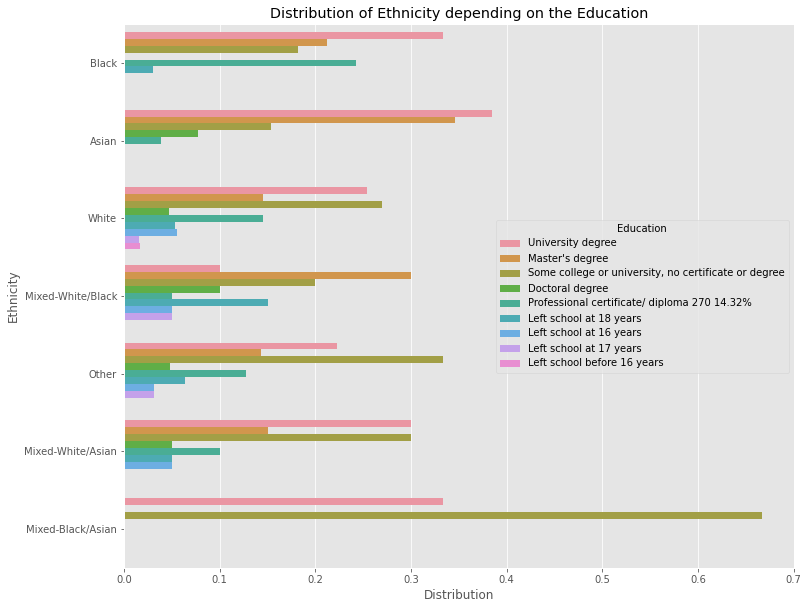

In [ ]:
plt.figure(figsize=(12,10))
df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])["Education"].value_counts(normalize = True))
df_bar.rename(columns = {"Education":"Distribution"}, inplace=True)
df_bar.reset_index(inplace = True)
sns.barplot(x = "Distribution", y = "Ethnicity", hue = "Education", order = class_Ethnicity, data = df_bar)
plt.title(f"Distribution of Ethnicity depending on the Education")
plt.show()

##### NEO-FFI-R score

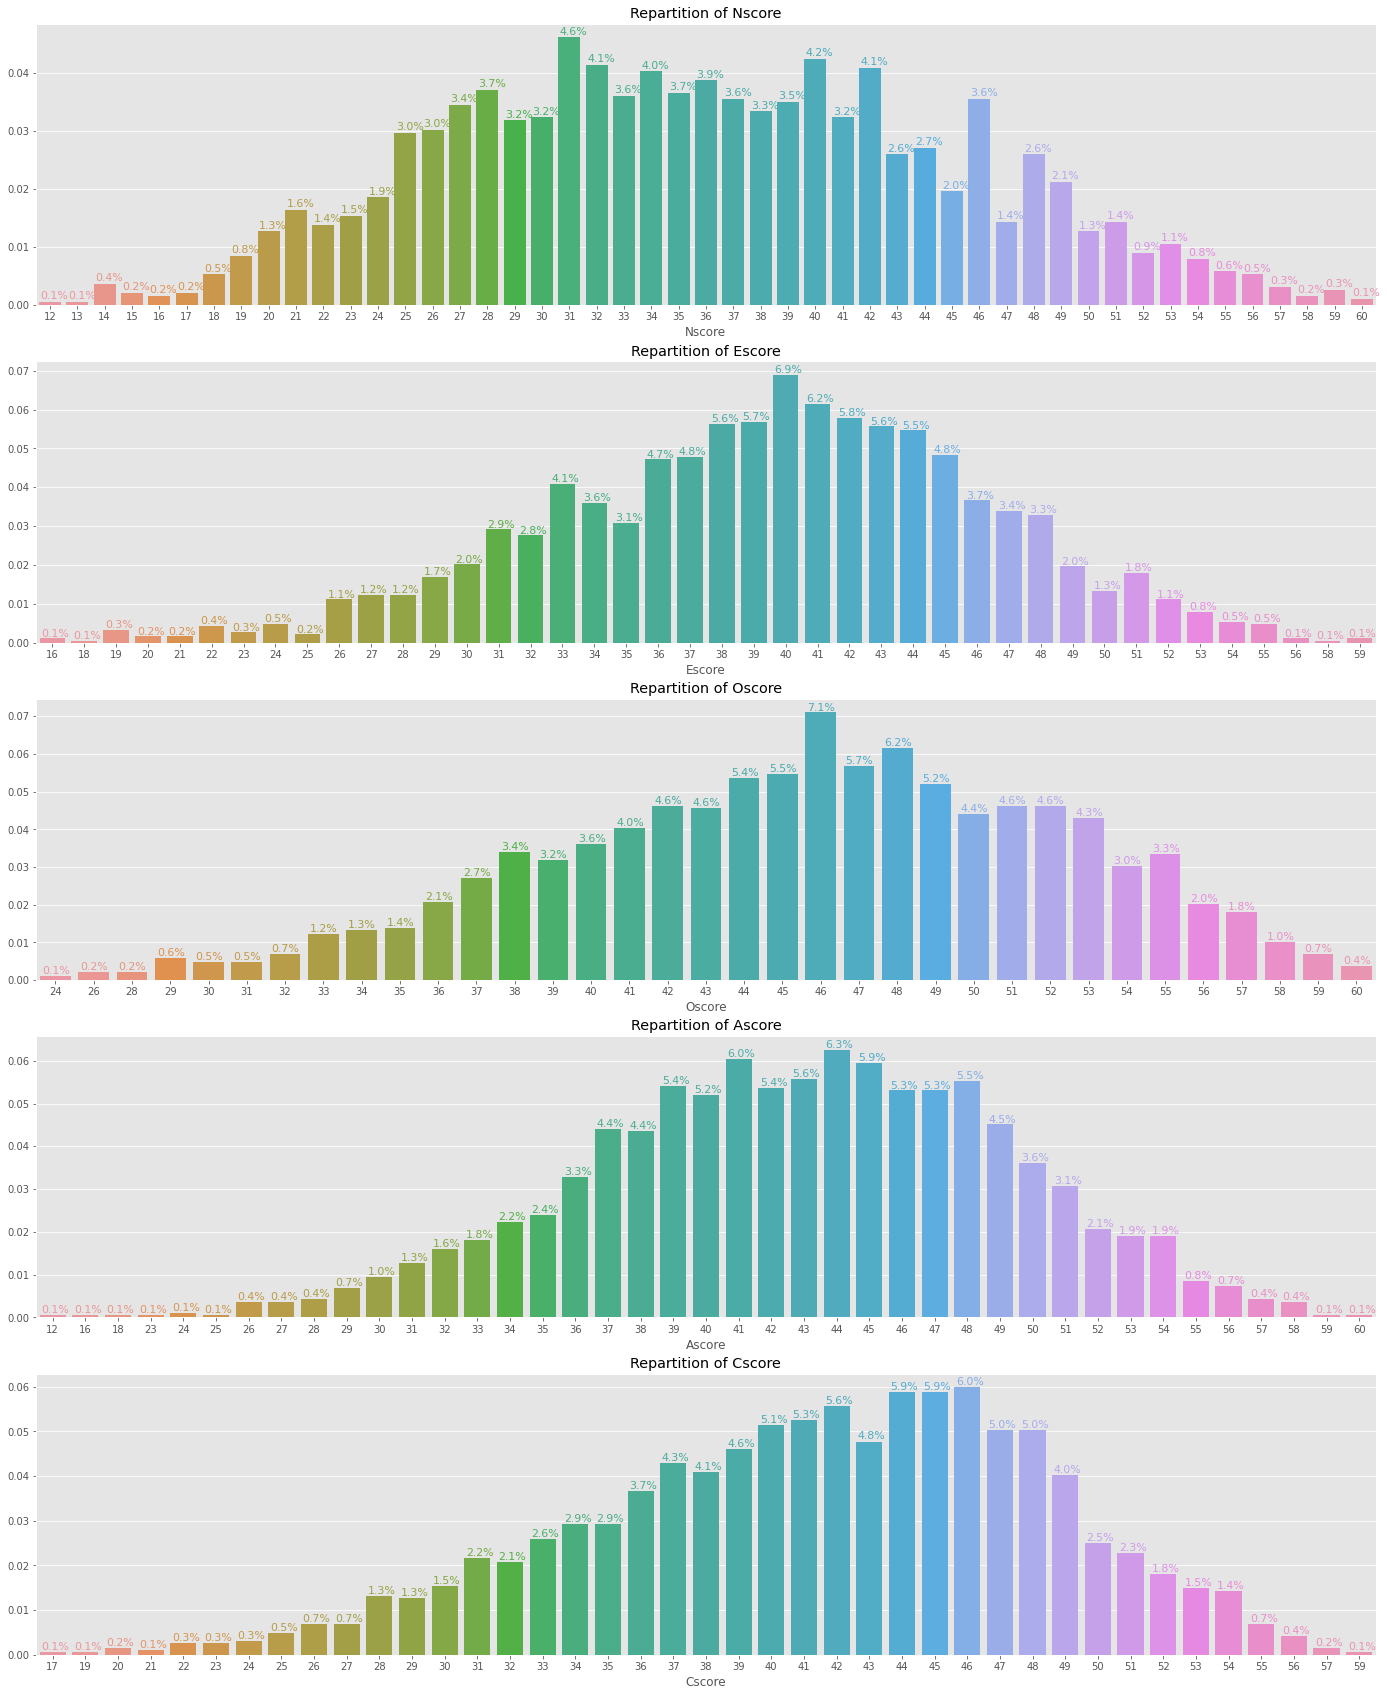

In [ ]:
nrow = 5
ncol = 1
fig, axes = plt.subplots(nrow, ncol, figsize = (24,6*nrow))

for i, name in enumerate([f"{letter}score" for letter in ["N","E","O","A","C"]]):
    score_density = pd.DataFrame(df_viz[name].value_counts(normalize=True)).reset_index()
    score_density.loc[:,"index"] = score_density["index"].apply(round)

    ylabels = score_density.sort_values(by="index")[name].values

    sns.barplot(x = "index", y = name, data = score_density, ax=axes[i])

    bars = [r for r in axes[i].get_children() if type(r)==Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]] 
    for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
        axes[i].text(x=y-0.35, 
                y=m+0.0005, 
                s=str(round(m*100,1))+"%", 
                color=c,
                fontsize=11)

    axes[i].set_xlabel(name)
    axes[i].set_ylabel("")
    axes[i].set_title(f"Repartition of {name}")

fig.show()

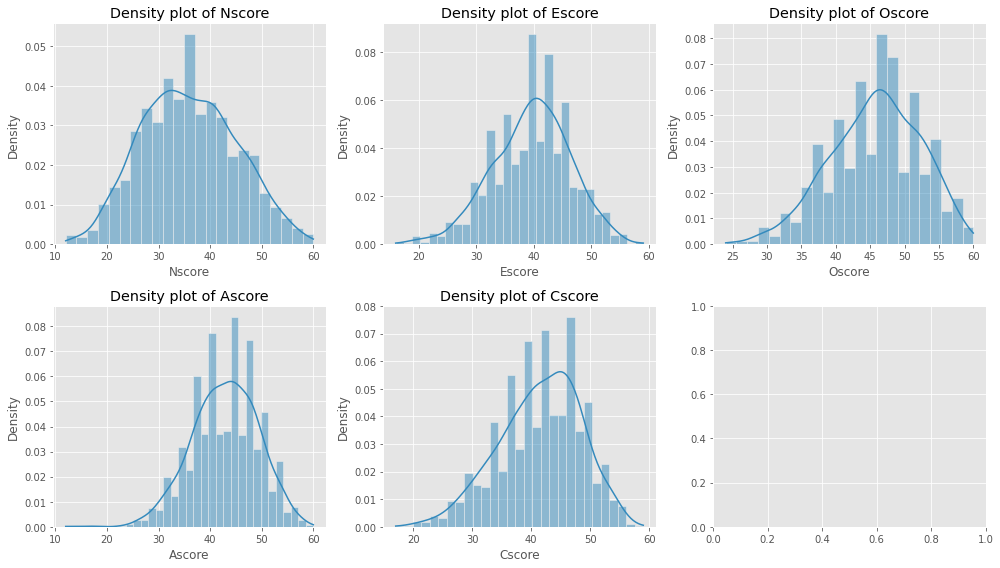

In [ ]:
nrow = 2
ncol = 3
fig, axes = plt.subplots(nrow, ncol, figsize = (14,8))

for i, name in enumerate([f"{letter}score" for letter in ["N","E","O","A","C"]]):
    sns.histplot(df_viz[name],kde=True, stat="density", ax=axes[i//ncol,i%ncol])
    axes[i//ncol,i%ncol].set_title(f"Density plot of {name}")

fig.tight_layout()
fig.show()

##### BIS11
We don't have the real values associated to this test

In [ ]:
df.Impulsive.value_counts(normalize=True)

-0.21712    0.188329
-0.71126    0.162865
-1.37983    0.146419
 0.19268    0.136340
 0.52975    0.114589
 0.88113    0.103448
 1.29221    0.078515
 1.86203    0.055172
-2.55524    0.010610
 2.90161    0.003714
Name: Impulsive, dtype: float64

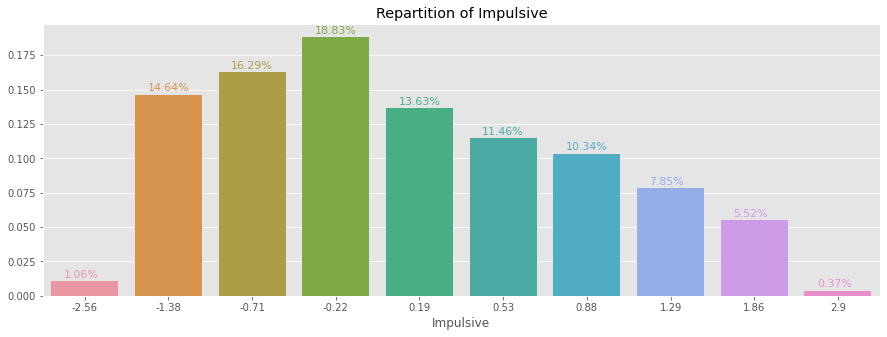

In [ ]:
impulsive_density = pd.DataFrame(df_viz.Impulsive.value_counts(normalize=True)).reset_index()
impulsive_density.loc[:,"index"] = impulsive_density["index"].apply(lambda x: round(x,2))

ylabels = impulsive_density.sort_values(by="index").Impulsive.values

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = "index", y = "Impulsive", data = impulsive_density, ax=ax)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.25, 
            y=m+0.0025, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("Impulsive")
ax.set_ylabel("")
ax.set_title("Repartition of Impulsive")
fig.show()

##### ImpSS
We don't have the real values associated to this test

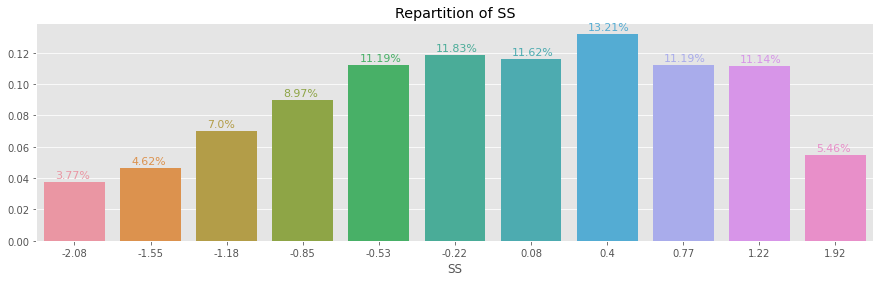

In [ ]:
SS_density = pd.DataFrame(df_viz.SS.value_counts(normalize=True)).reset_index()
SS_density.loc[:,"index"] = SS_density["index"].apply(lambda x: round(x,2))

ylabels = SS_density.sort_values(by="index").SS.values

fig, ax = plt.subplots(figsize=(15,4))
sns.barplot(x = "index", y = "SS", data = SS_density, ax=ax)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.25, 
            y=m+0.0025, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("SS")
ax.set_ylabel("")
ax.set_title("Repartition of SS")
fig.show()

#### Target

There are 19 drugs that can be divided in the following categories:  
**Common**
- Caff
- Choc
- VSA: glue sniffing
- Benzos: psychoactive drugs, such as antidepressants, anxiolytics, muscle relaxants
- Ketamine: anesthésiant

**Legal**
- Alcohol
- Legalh
- Nicotine

**Illegal**
- Amphet
- Amyl: poppers
- Cannabis
- Coke
- Crack
- Esctasy
- Heroin
- LSD
- Meth
- Mushrooms

**Fictional**
- Semer

**Repartition for each drugs of all classes**

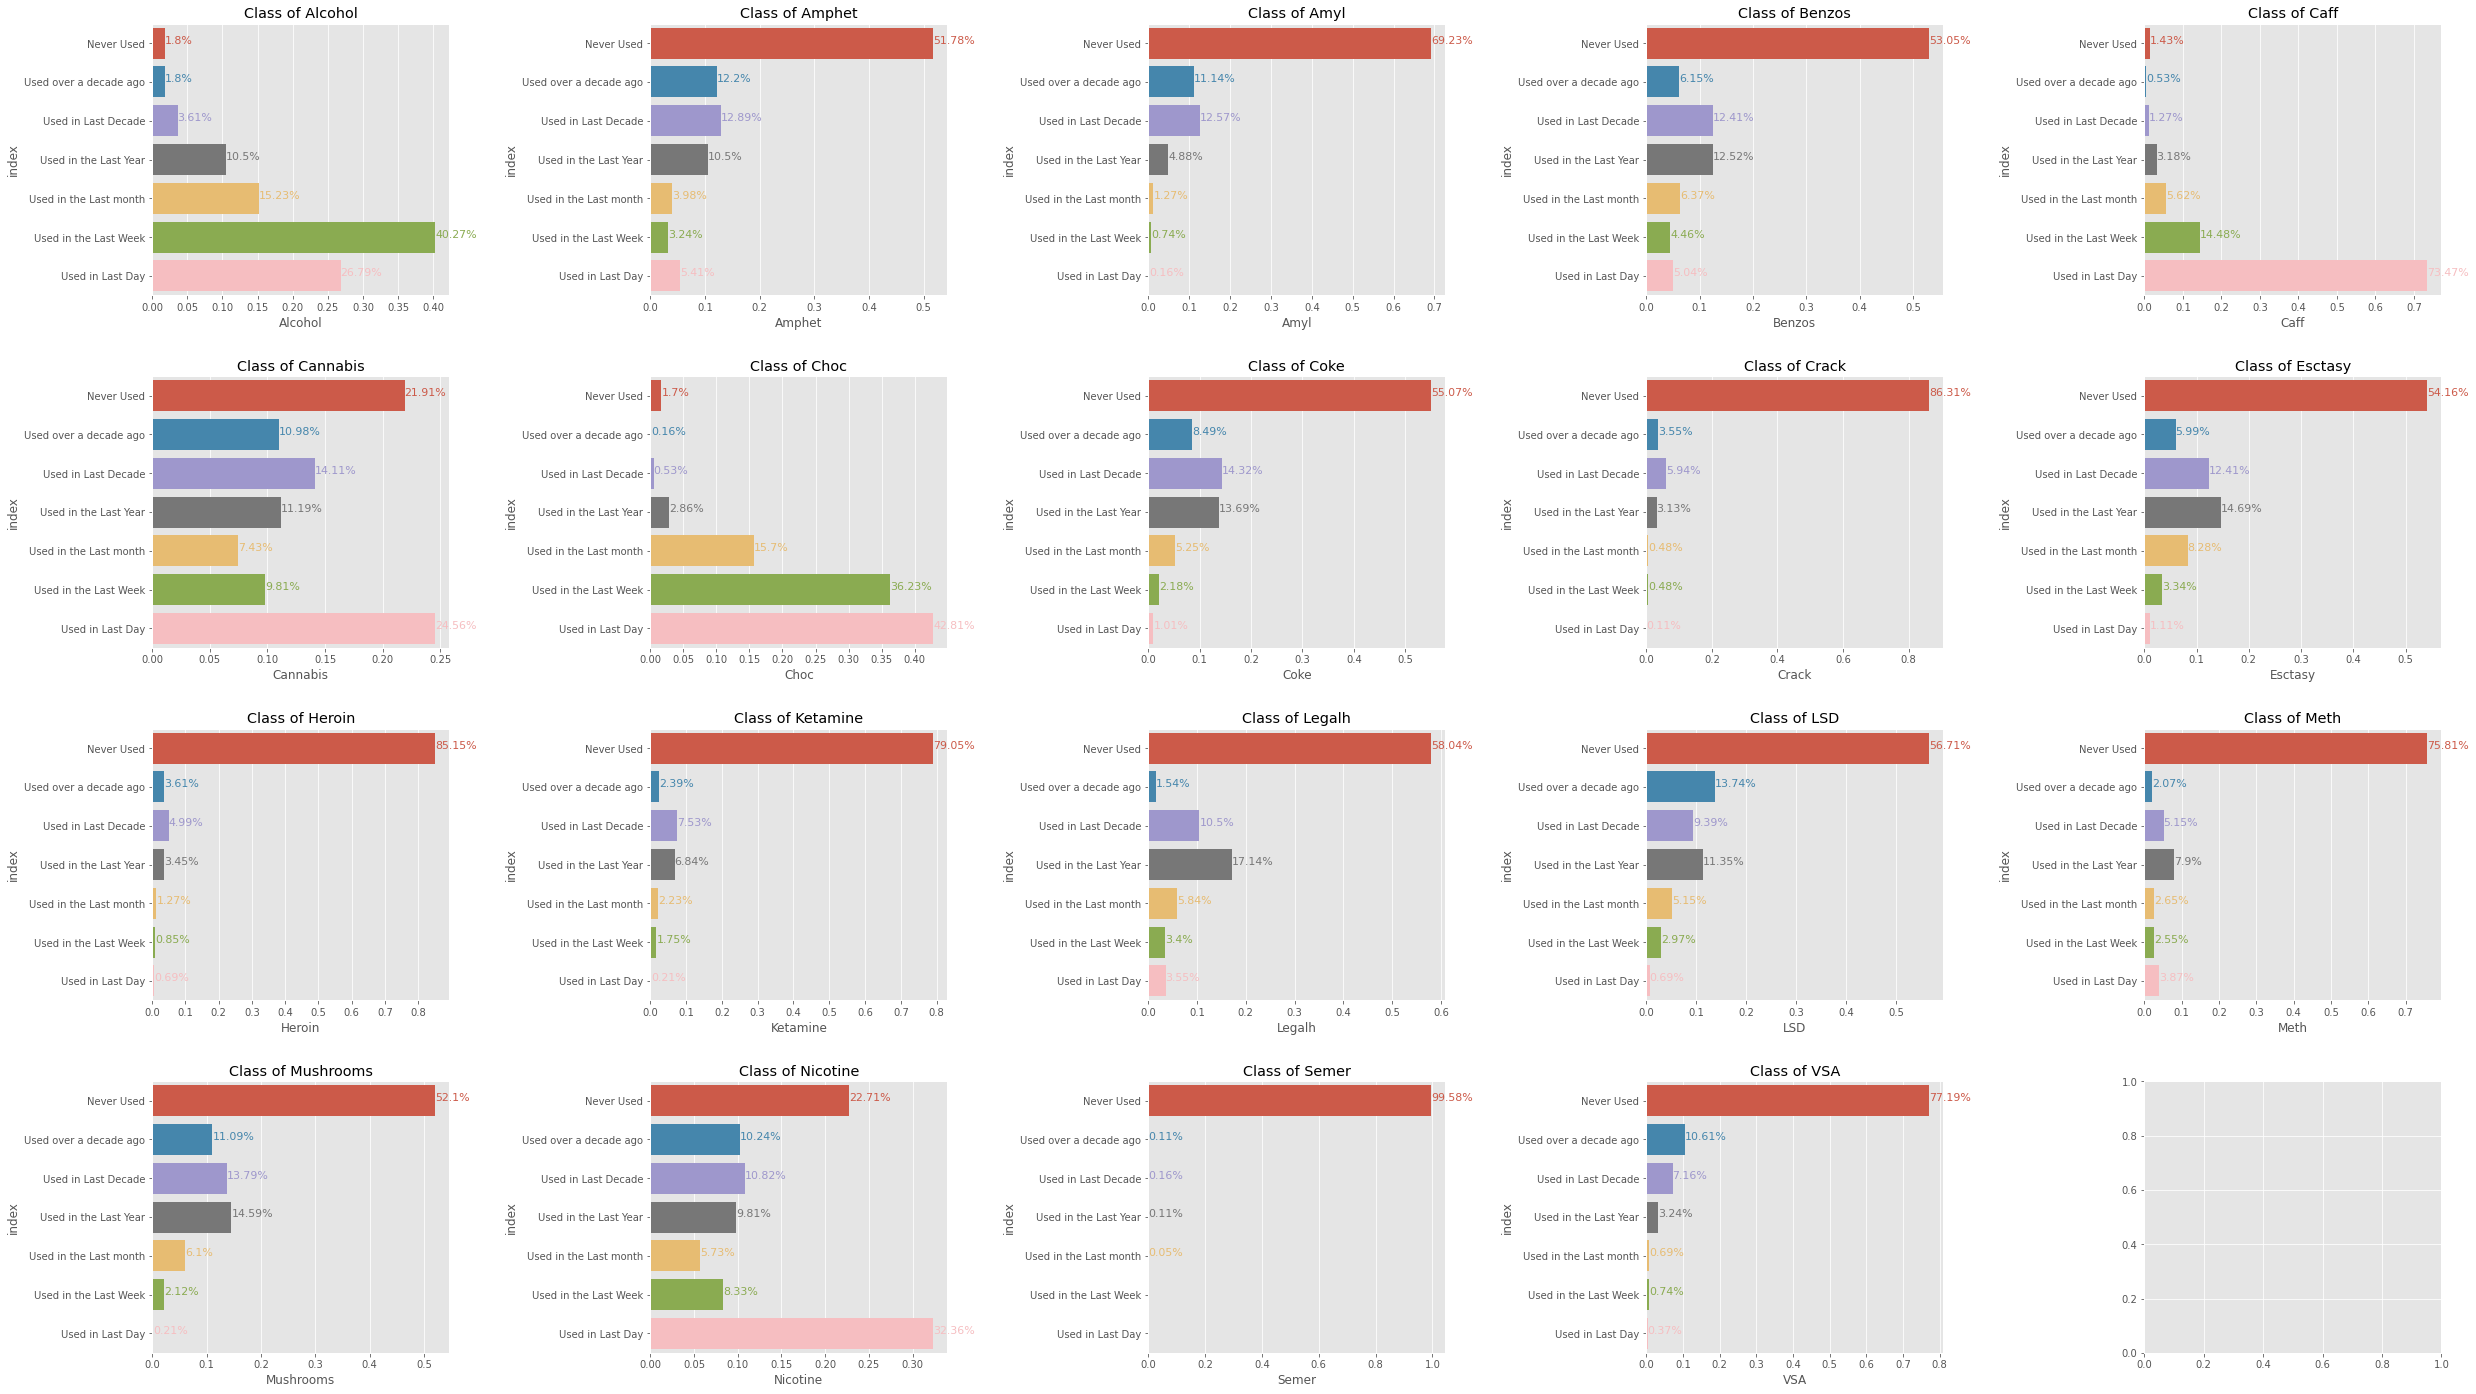

In [ ]:
nrows = 4
ncols = 5
fig, axis = plt.subplots(nrows, ncols, figsize=(35,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        drug_density = pd.DataFrame(df_viz.iloc[:,13+i].value_counts(normalize=True)).reset_index()
        sns.barplot(y = "index", x = df_viz.iloc[:,13:].columns[i], data = drug_density, ax=axis[r,c], order=class_drugs)
        ylabels = [axis[r,c].patches[i].get_bbox().get_points()[1][0] for i in range(drug_density.shape[0])]

        bars = [r for r in axis[r,c].get_children() if type(r)==Rectangle]
        colors = [c.get_facecolor() for c in bars[:-1]] 
        for y, m, color in zip(np.arange(len(ylabels)), ylabels, colors):
            axis[r,c].text(x=m, 
                    y=y, 
                    s=str(round(m*100,2))+"%", 
                    color=color,
                    fontsize=11)

        axis[r,c].set_title(f"Class of {df_viz.iloc[:,13:].columns[i]}")
        i+=1
        if i == 19:
          break
fig.tight_layout(pad=3.0)
fig.show()

**Repartition for each drugs of classes Used and not used**

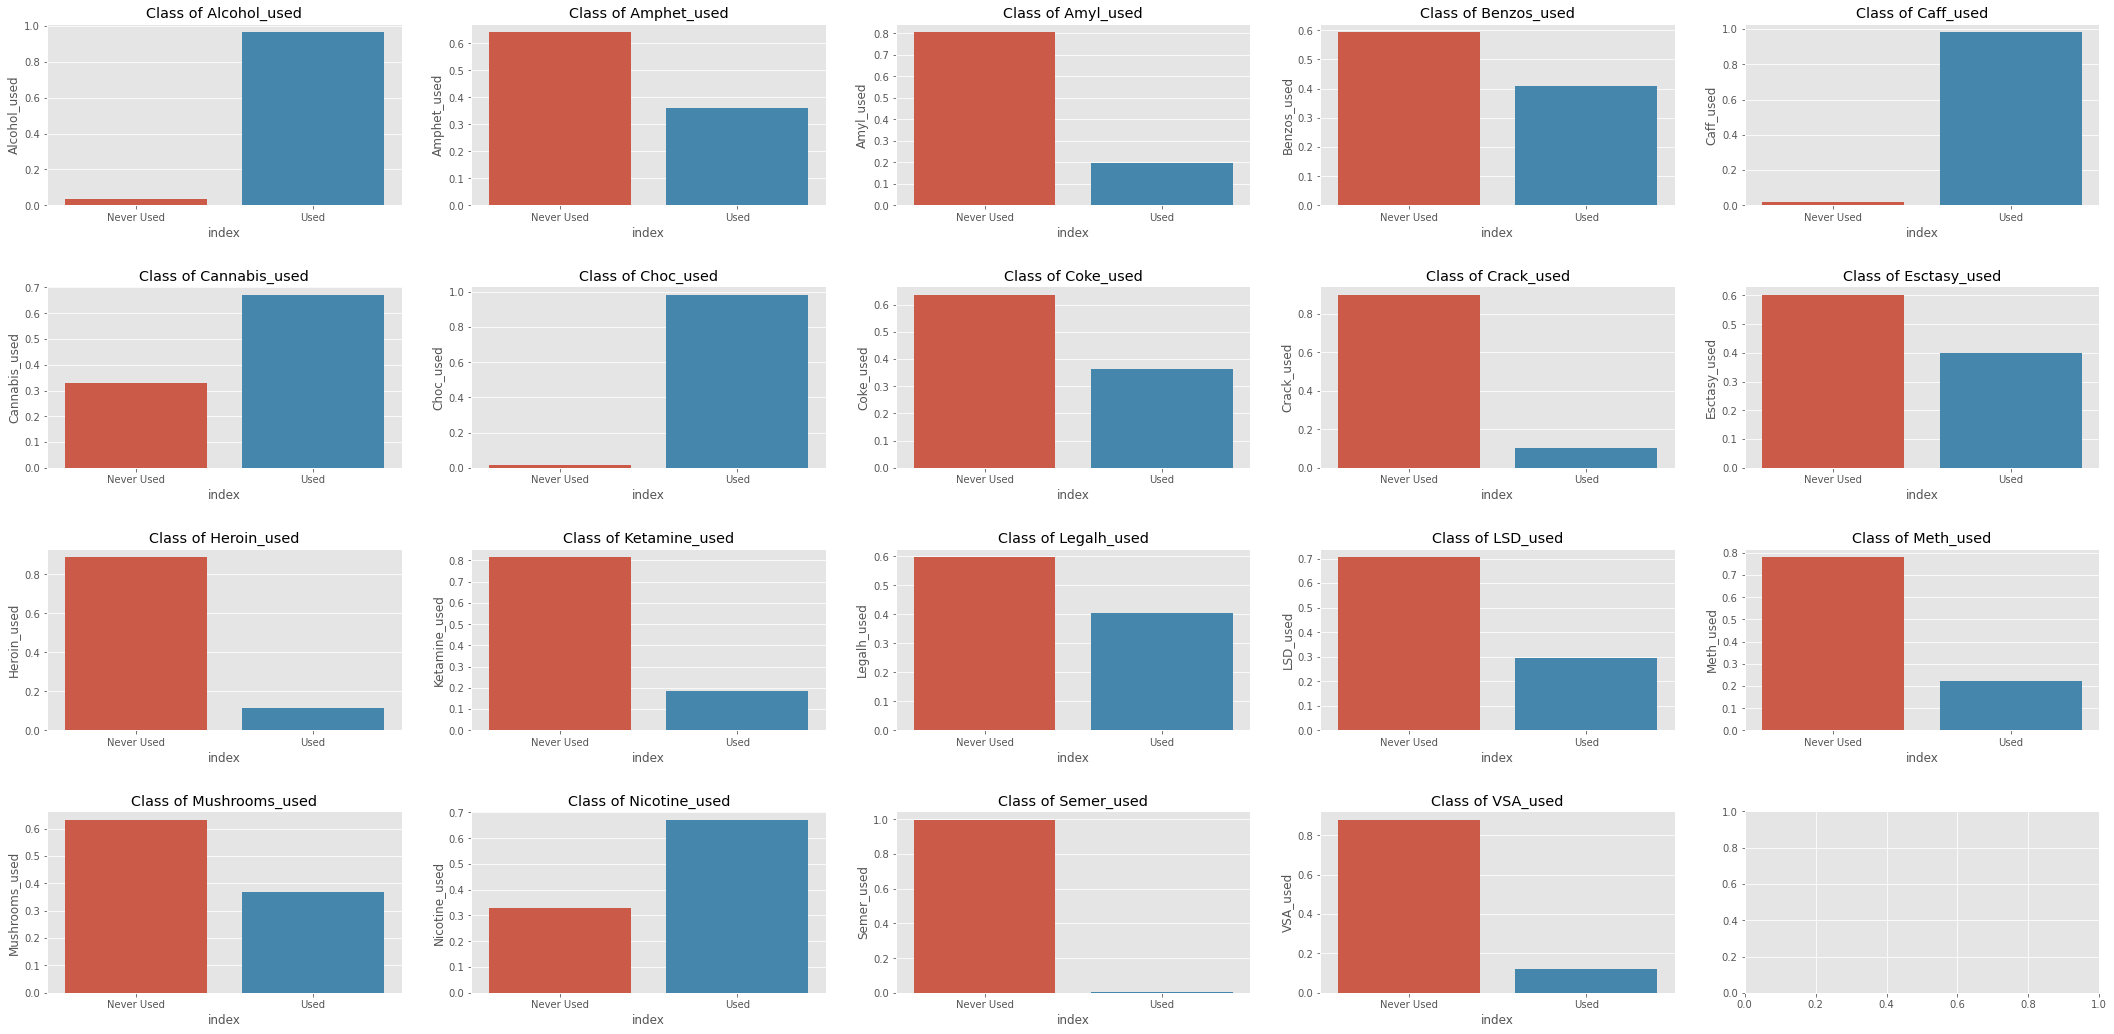

In [ ]:
nrows = 4
ncols = 5
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        drug_density = pd.DataFrame(df_viz.iloc[:,32+i].value_counts(normalize=True)).reset_index()
        sns.barplot(x = "index", y = df_viz.iloc[:,32:].columns[i], data = drug_density, ax=axis[r,c], order=["Never Used", "Used"])
        axis[r,c].set_title(f"Class of {df_viz.iloc[:,32:].columns[i]}")
        axis[r,c].tick_params(axis='x')
        i+=1
        if i == 19:
          break
fig.tight_layout(pad=3.0)
fig.show()

We can observe that:
- The drug Semer has not interest for us
- Common drugs such has Choc, caff and alcohol are most of the time been consumed by people
- There is a problem of imbalanced data

Let's see the number of drugs used by person

In [ ]:
nb_drugs = df_viz.iloc[:,32:].apply(pd.Series.value_counts, axis=1).fillna(0)
df_viz["Number of drug used"] = nb_drugs.Used

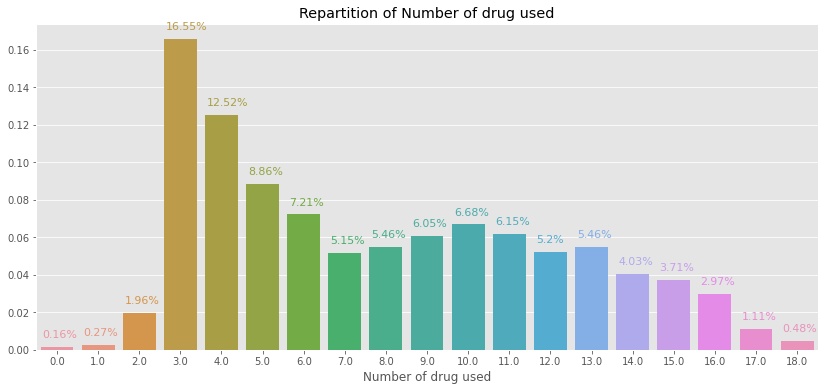

In [ ]:
nb_drugs_density = pd.DataFrame(df_viz["Number of drug used"].value_counts(normalize=True)).reset_index()

ylabels = nb_drugs_density.sort_values(by="index")["Number of drug used"].values

fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x = "index", y = "Number of drug used", data = nb_drugs_density, ax=ax)

bars = [r for r in ax.get_children() if type(r)==Rectangle]
colors = [c.get_facecolor() for c in bars[:-1]] 
for y, m, c in zip(np.arange(len(ylabels)), ylabels, colors):
    ax.text(x=y-0.35, 
            y=m+0.005, 
            s=str(round(m*100,2))+"%", 
            color=c,
            fontsize=11)

ax.set_xlabel("Number of drug used")
ax.set_ylabel("")
ax.set_title("Repartition of Number of drug used")
fig.show()

We can divide the dataset into two groups:
- People using few drugs (0-6)
- people using a lot of drugs (7+)

**Our Assumptions**     
- ***HIGH Neuroticism*** can lead people to have negative thoughts and then use drugs as a way to feel better.
- **LOW Extraversion:** we cannot really assume that there is a correlation with this variable appart from the fact that introverts could take more drugs than extraverts but it's not always the case.
- **HIGH Openness:** we can infer that people with high openness could be tempt to test drugs
- **LOW Agreeableness:** maybe, people with low agreebleness could be more isolate and could use drugs
- **LOW Conscientiousness:** people less reliable could be tempt to use drugs


We will verify these assumptions with the relationships between drug used and features

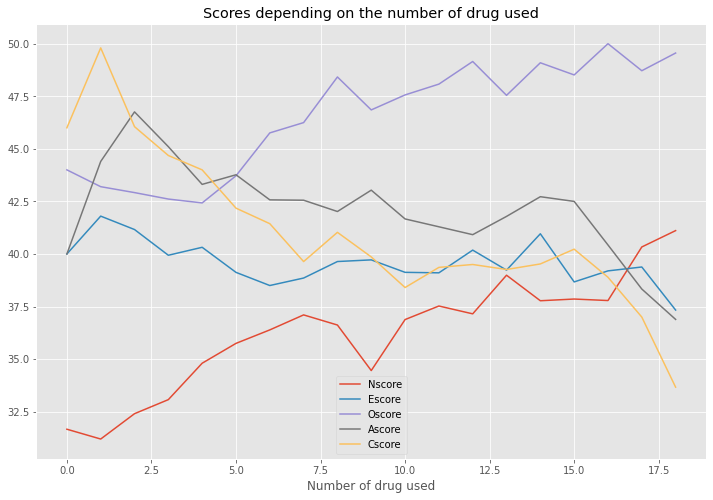

In [ ]:
scores_drugs = df_viz.groupby("Number of drug used")[["Nscore","Escore","Oscore","Ascore","Cscore"]].mean()
scores_drugs.plot(figsize=(12,8))
plt.title("Scores depending on the number of drug used")
plt.show()

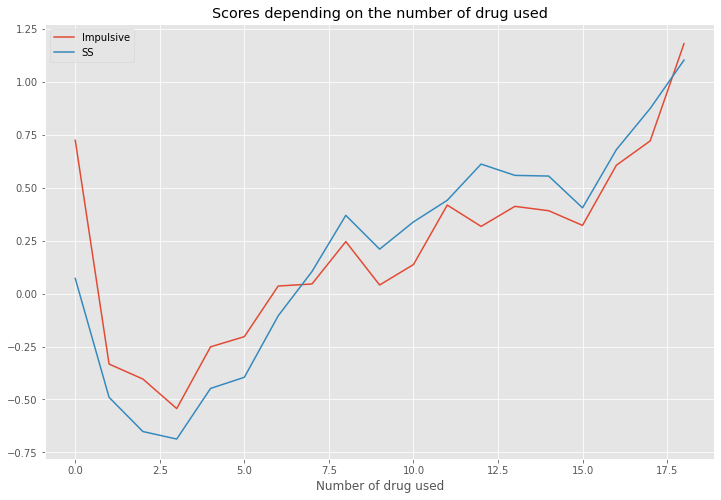

In [ ]:
other_test_drugs = df_viz.groupby("Number of drug used")[["Impulsive","SS"]].mean()
other_test_drugs.plot(figsize=(12,8))
plt.title("Scores depending on the number of drug used")
plt.show()

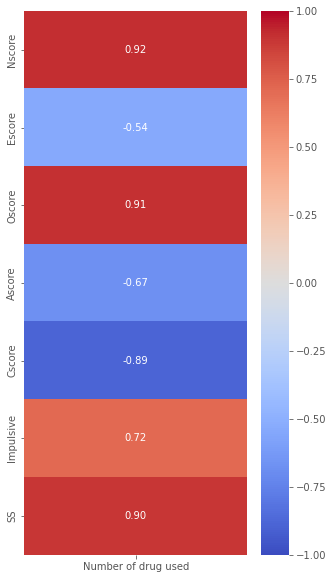

In [ ]:
all_scores_drugs = df_viz.groupby("Number of drug used")[["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]].mean()
plt.figure(figsize=(5,10))
sns.heatmap(pd.DataFrame(all_scores_drugs.reset_index().corr().iloc[1:,0]),annot=True,fmt='.2f',cmap='coolwarm',vmax=1.0,vmin=-1.0)
plt.show()

Our assumptions seems to be true

<a name="missing_values">

### Missing values

In [ ]:
df.isna().sum()/df.shape[0]

ID           0.0
Age          0.0
Gender       0.0
Education    0.0
Country      0.0
Ethnicity    0.0
Nscore       0.0
Escore       0.0
Oscore       0.0
Ascore       0.0
Cscore       0.0
Impulsive    0.0
SS           0.0
Alcohol      0.0
Amphet       0.0
Amyl         0.0
Benzos       0.0
Caff         0.0
Cannabis     0.0
Choc         0.0
Coke         0.0
Crack        0.0
Esctasy      0.0
Heroin       0.0
Ketamine     0.0
Legalh       0.0
LSD          0.0
Meth         0.0
Mushrooms    0.0
Nicotine     0.0
Semer        0.0
VSA          0.0
dtype: float64

There is no missing values

<a name="relationships">

### Relationships

#### Between Features

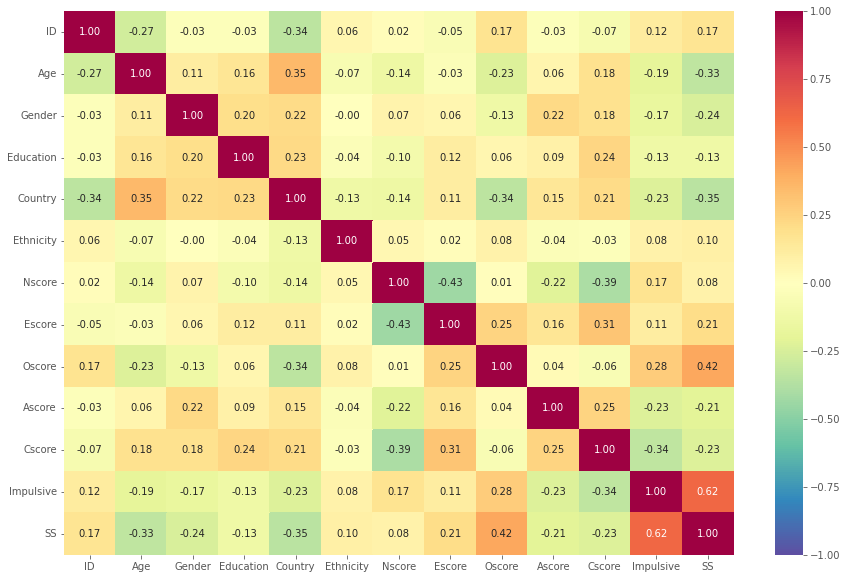

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Spectral_r',vmax=1.0,vmin=-1.0)
plt.show()

There are no strong correlations between personality factors. The strongest correlations (significant, positive):

Sensation seeking and Impulsiveness (r = 0.63) Sensation seeking and Openness to experience (r = 0.4) The strongest correlations (significant, negative):

Extraversion and Neuroticism (r = -0.42) Neuroticism and Conscientiousness (r = -0.38) Conscientiousness and Impulsiveness (r = -0.34)

Agreeableness",color = "Heroin consumption" with two curves

P-values : correlation between drugs consumption and personality traits

##### Personality tests features

- ***Nscore:*** **Neuroticism**  
People that score high on neuroticism often experience emotional instability and negative emotions.
- ***Escore:*** **Extraversion**  
Extraverts get their energy from interacting with others, while introverts get their energy from within themselves.
- ***Oscore:*** **Openness**  
People who like to learn new things and enjoy new experiences usually score high in openness.
- ***Ascore:*** **Agreeableness**  
These individuals are friendly, cooperative, and compassionate. People with low agreeableness may be more distant.
- ***Cscore:*** **Conscientiousness**  
People that have a high degree of conscientiousness are reliable and prompt.


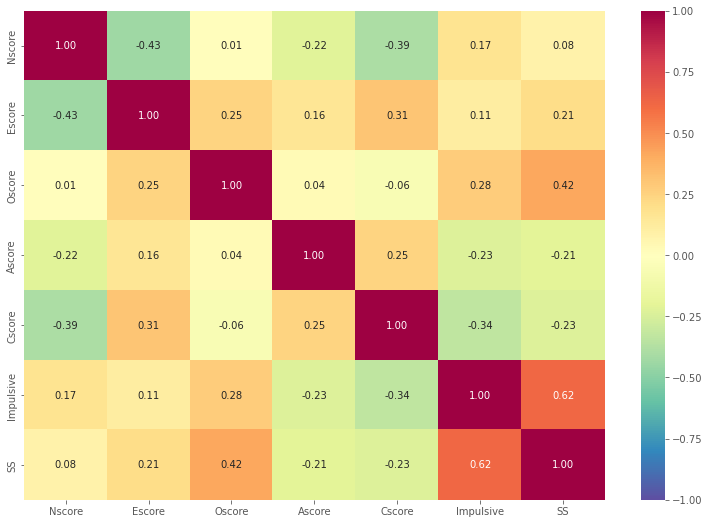

In [ ]:
plt.figure(figsize=(13,9))
sns.heatmap(df.iloc[:,6:].corr(),annot=True,fmt='.2f',cmap='Spectral_r',vmax=1.0,vmin=-1.0)
plt.show()

There is no correlation between Openness to experience and Neuroticism.

The remaining correlations are at most moderate correlations.

#### Features/Targets

In [ ]:
df.iloc[:,13:] = df.iloc[:,13:].replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])

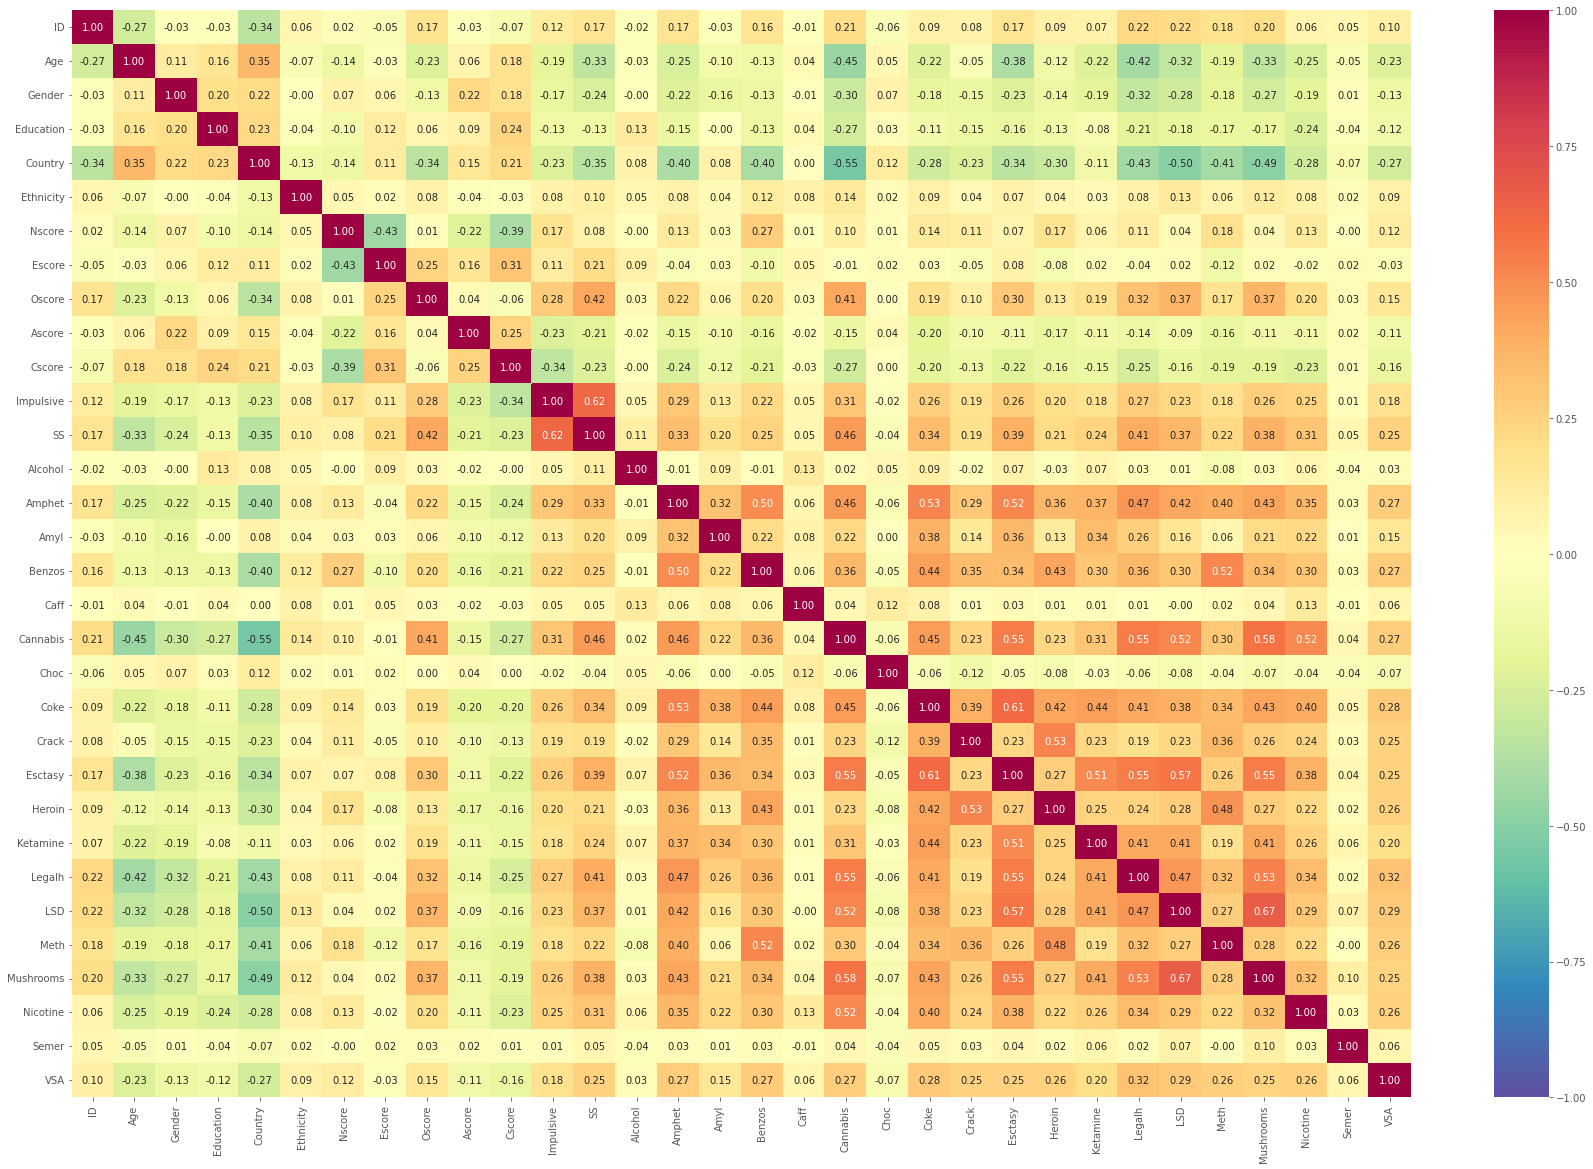

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Spectral_r',vmax=1.0,vmin=-1.0)
plt.show()

Let's now calculate the statistic to use at least one drug and recompute correlation matrix

**Our Assumptions**     
- ***HIGH Neuroticism*** can lead people to have negative thoughts and then use drugs as a way to feel better.
- **LOW Extraversion:** we cannot really assume that there is a correlation with this variable appart from the fact that introverts could take more drugs than extraverts but it's not always the case.
- **HIGH Openness:** we can infer that people with high openness could be tempt to test drugs
- **LOW Agreeableness:** maybe, people with low agreebleness could be more isolate and could use drugs
- **LOW Conscientiousness:** people less reliable could be tempt to use drugs


We will verify these assumptions with the relationships between drug used and features

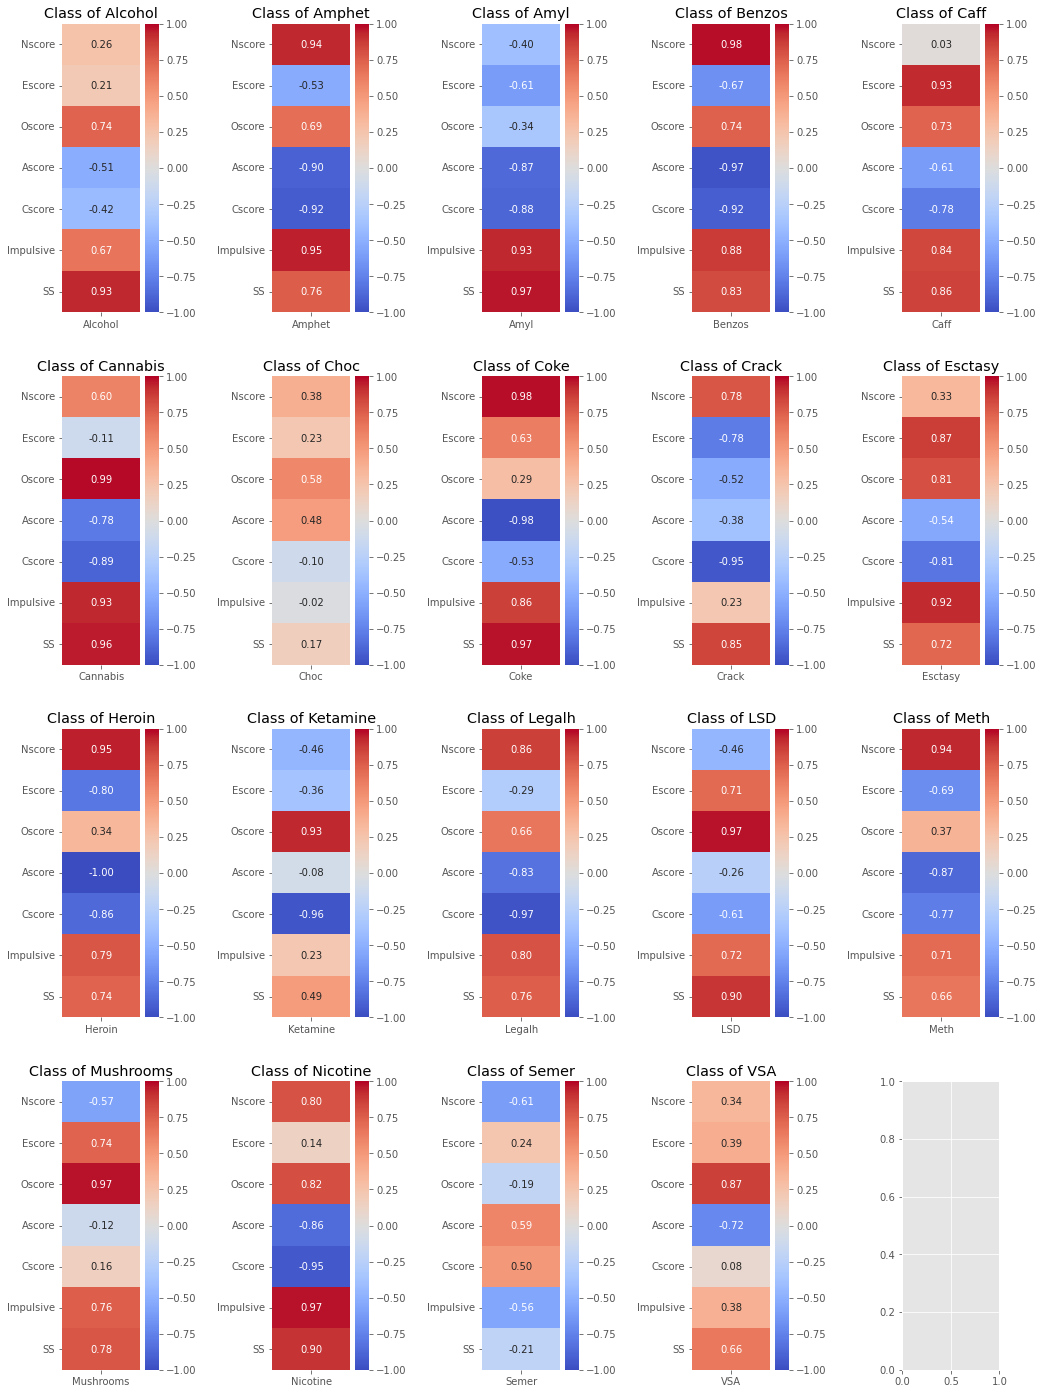

In [ ]:
nrows = 4
ncols = 5
fig, axis = plt.subplots(nrows, ncols, figsize=(15,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            all_scores_drugs = df.groupby(df.columns[i+13])[["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS"]].mean()
            sns.heatmap(pd.DataFrame(all_scores_drugs.reset_index().corr().iloc[1:,0]),annot=True,fmt='.2f',cmap='coolwarm',vmax=1.0,vmin=-1.0, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.columns[13+i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Age - Drug used

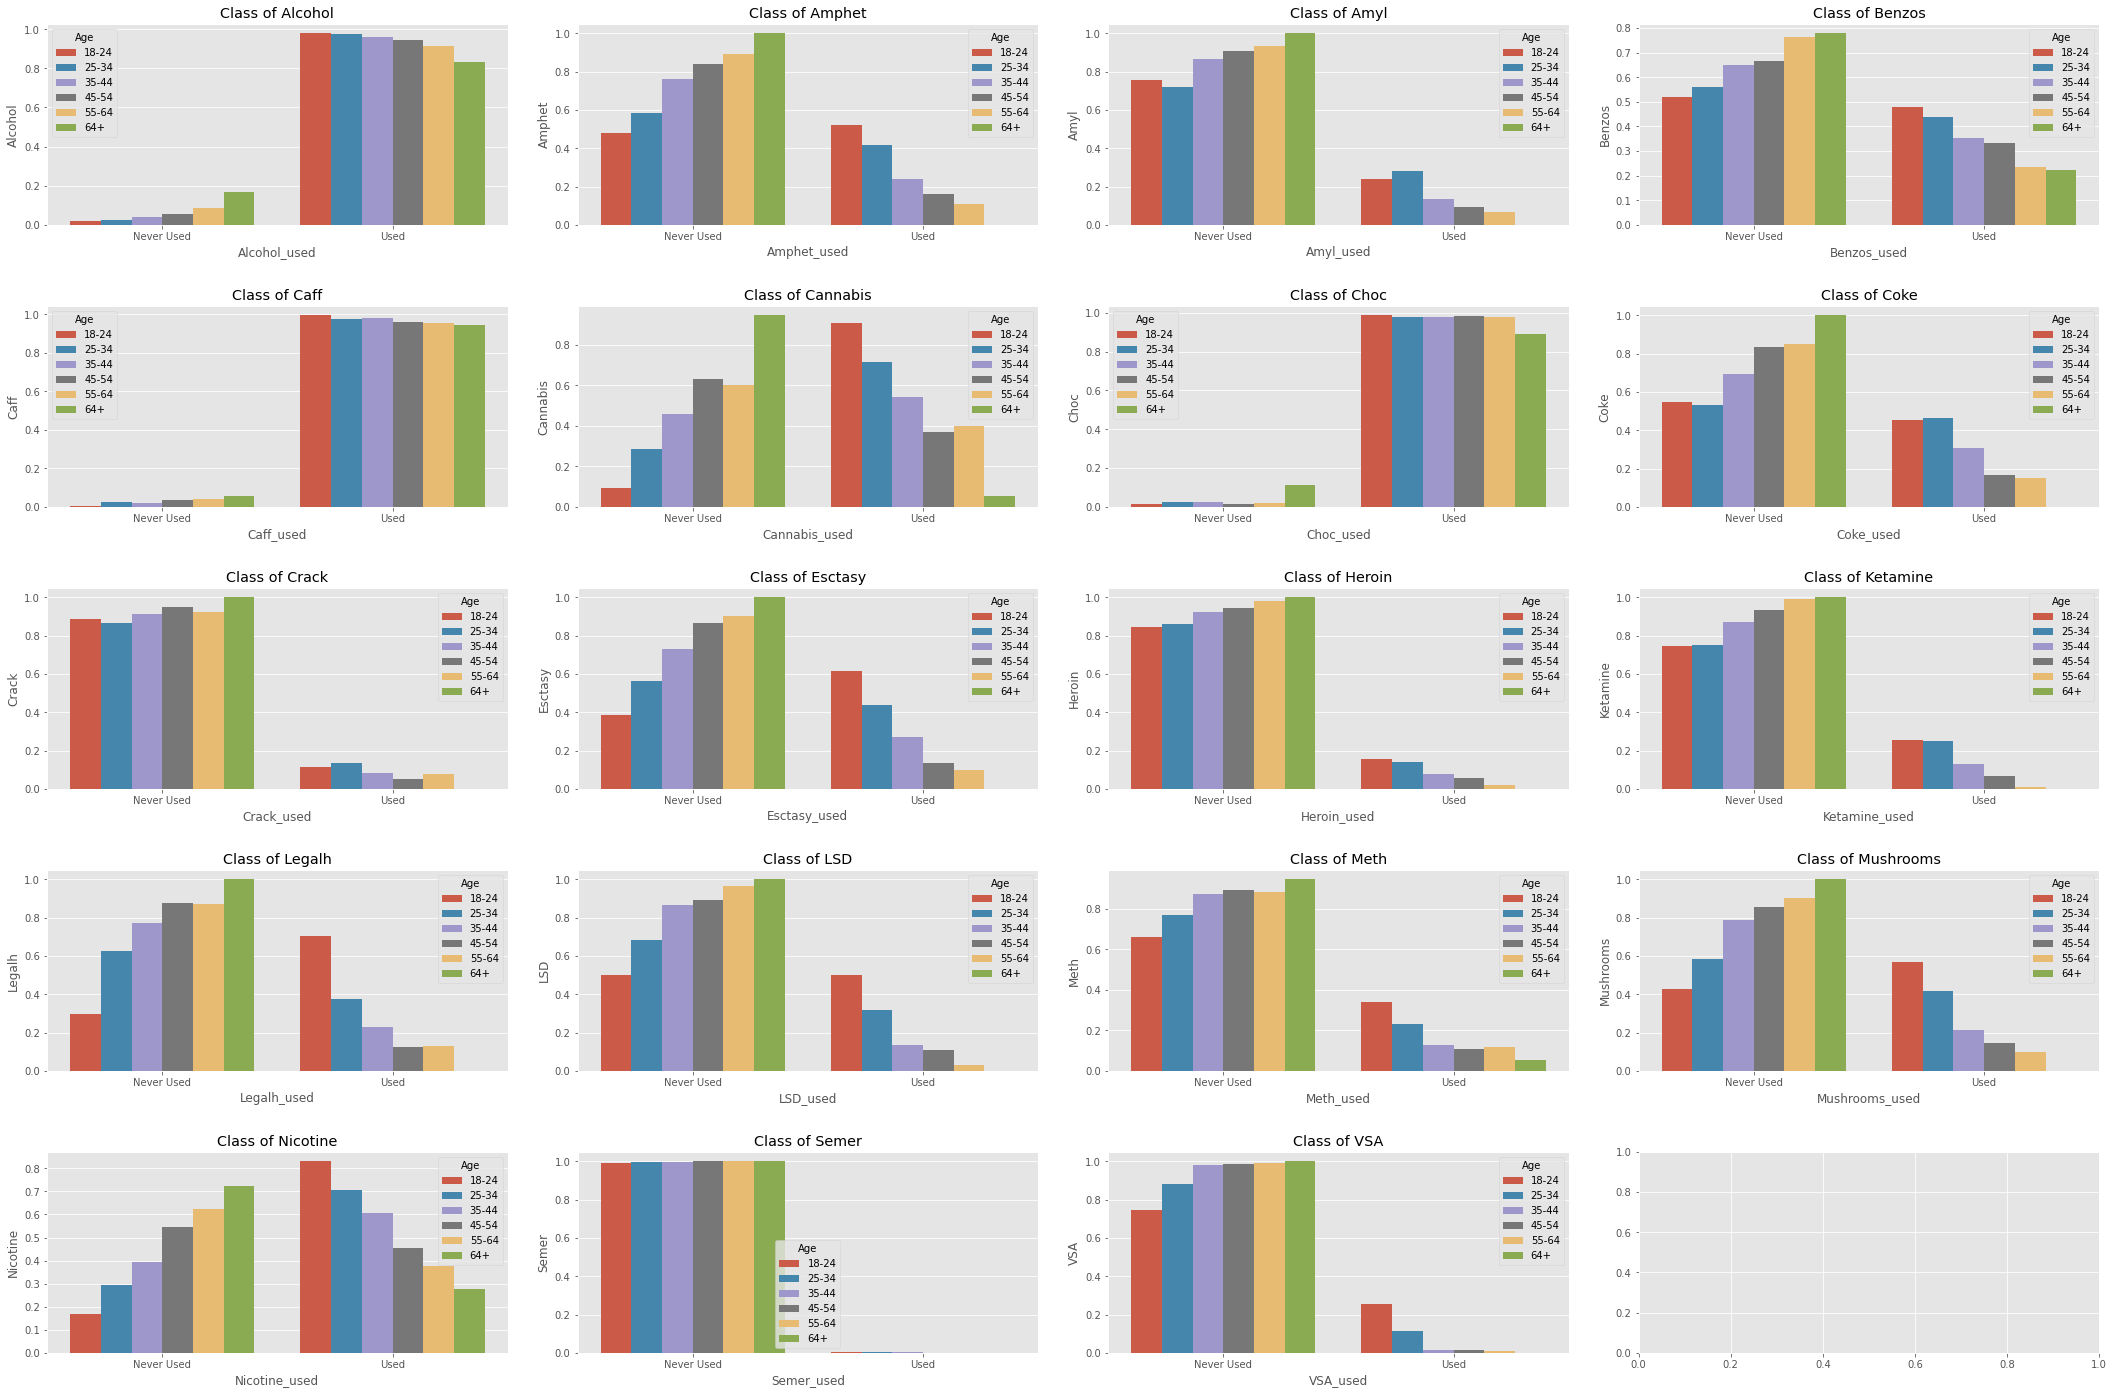

In [ ]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Age"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Age", data = df_bar, order=["Never Used","Used"], ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Gender - Drug used

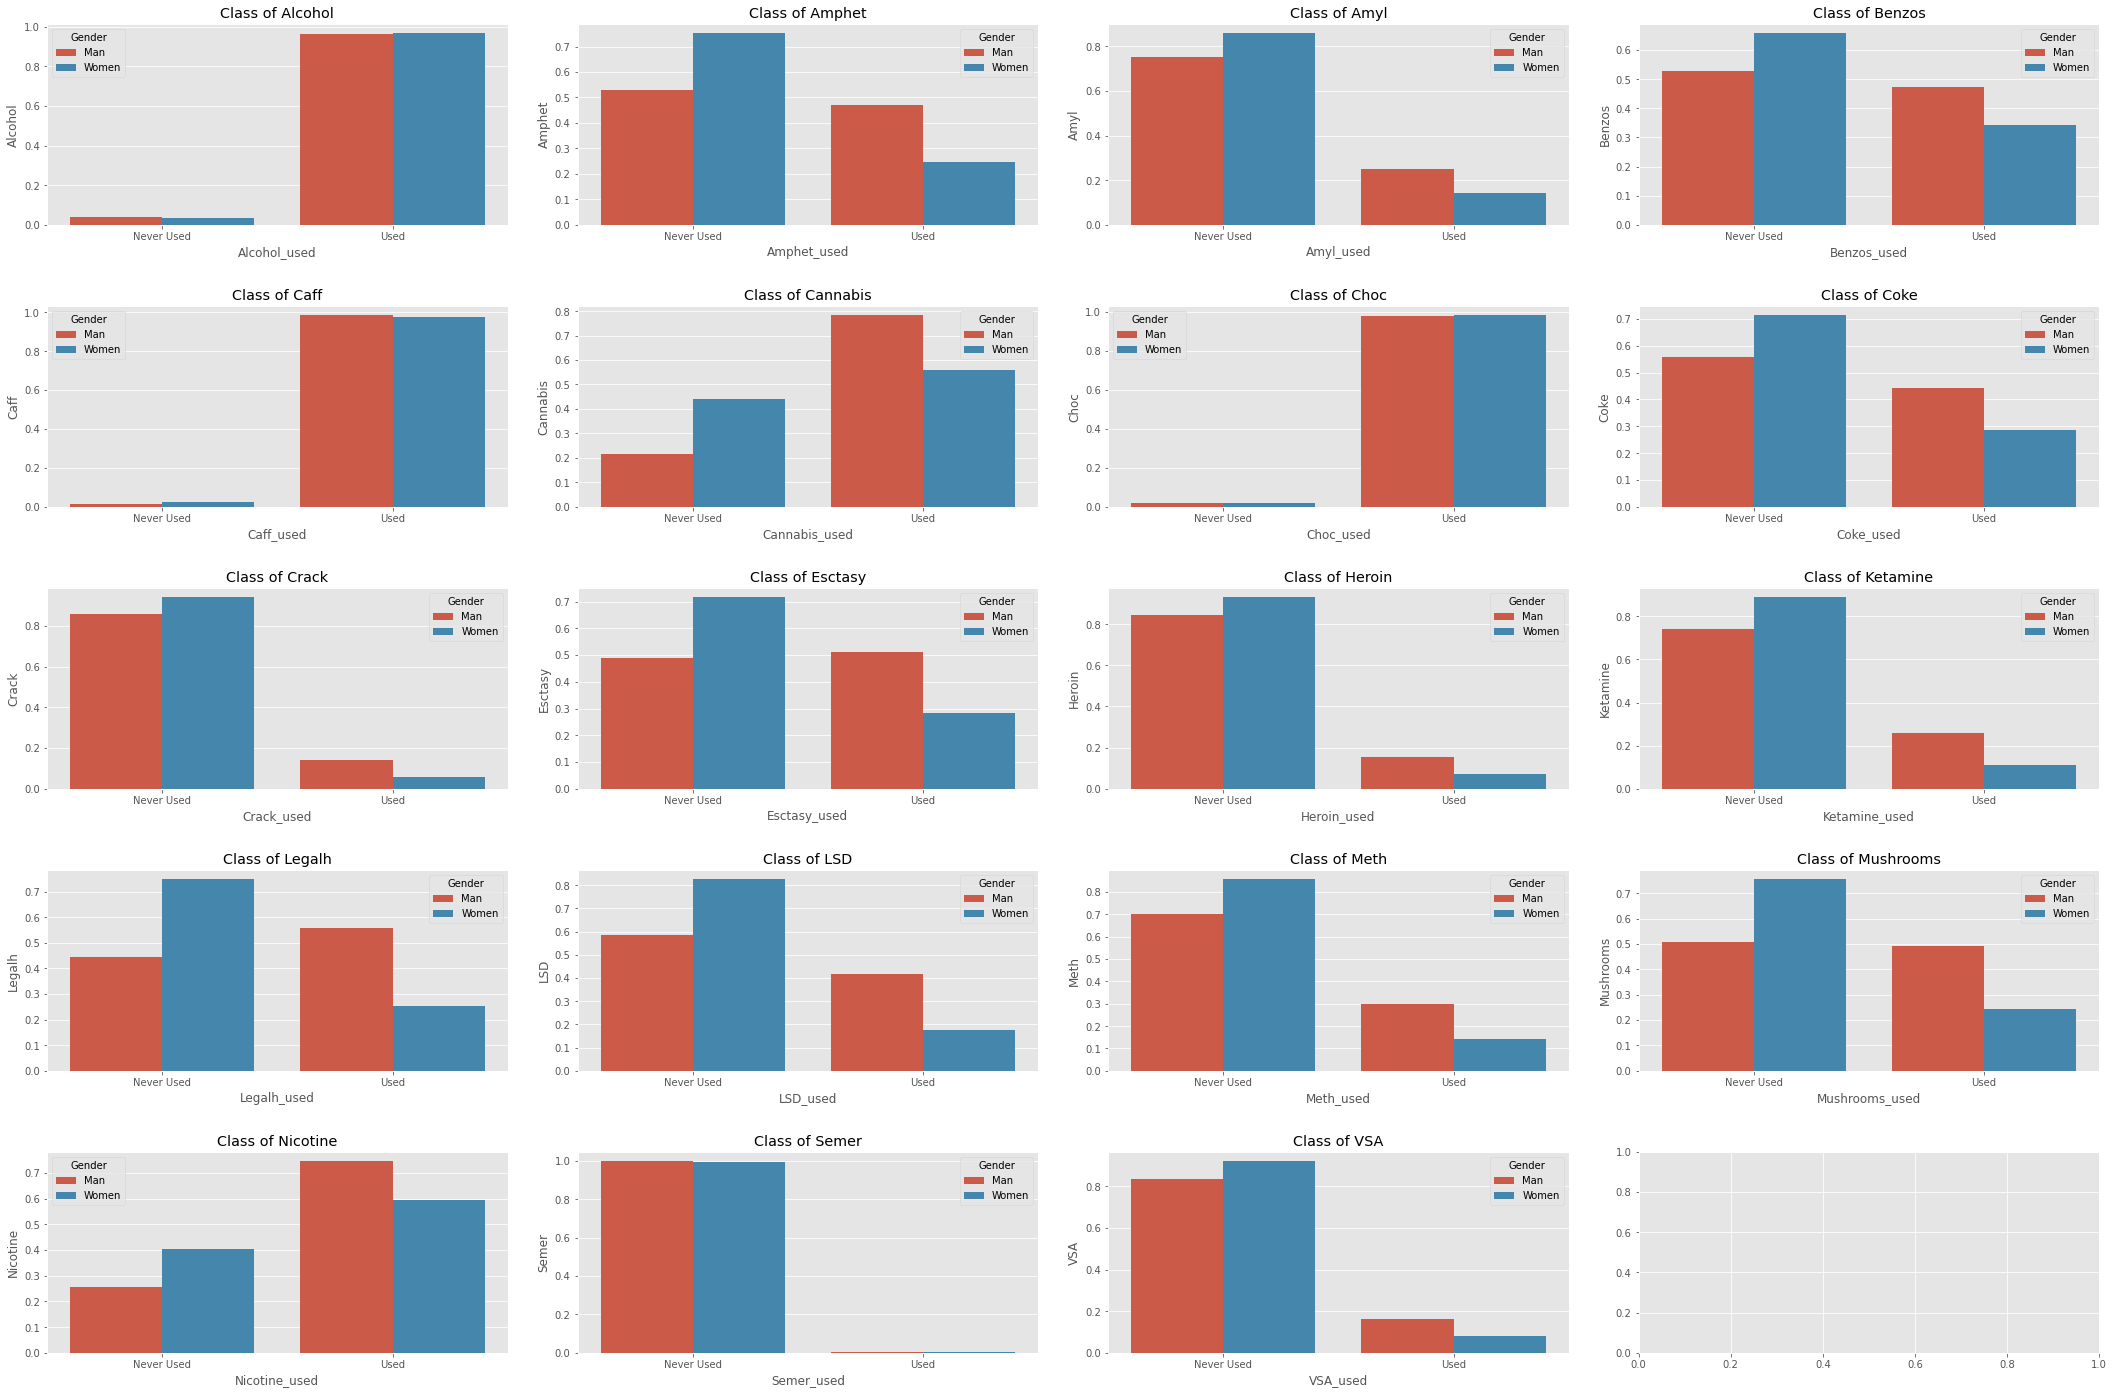

In [ ]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Gender"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Gender", data = df_bar, order = ["Never Used","Used"], ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Education - Drug used

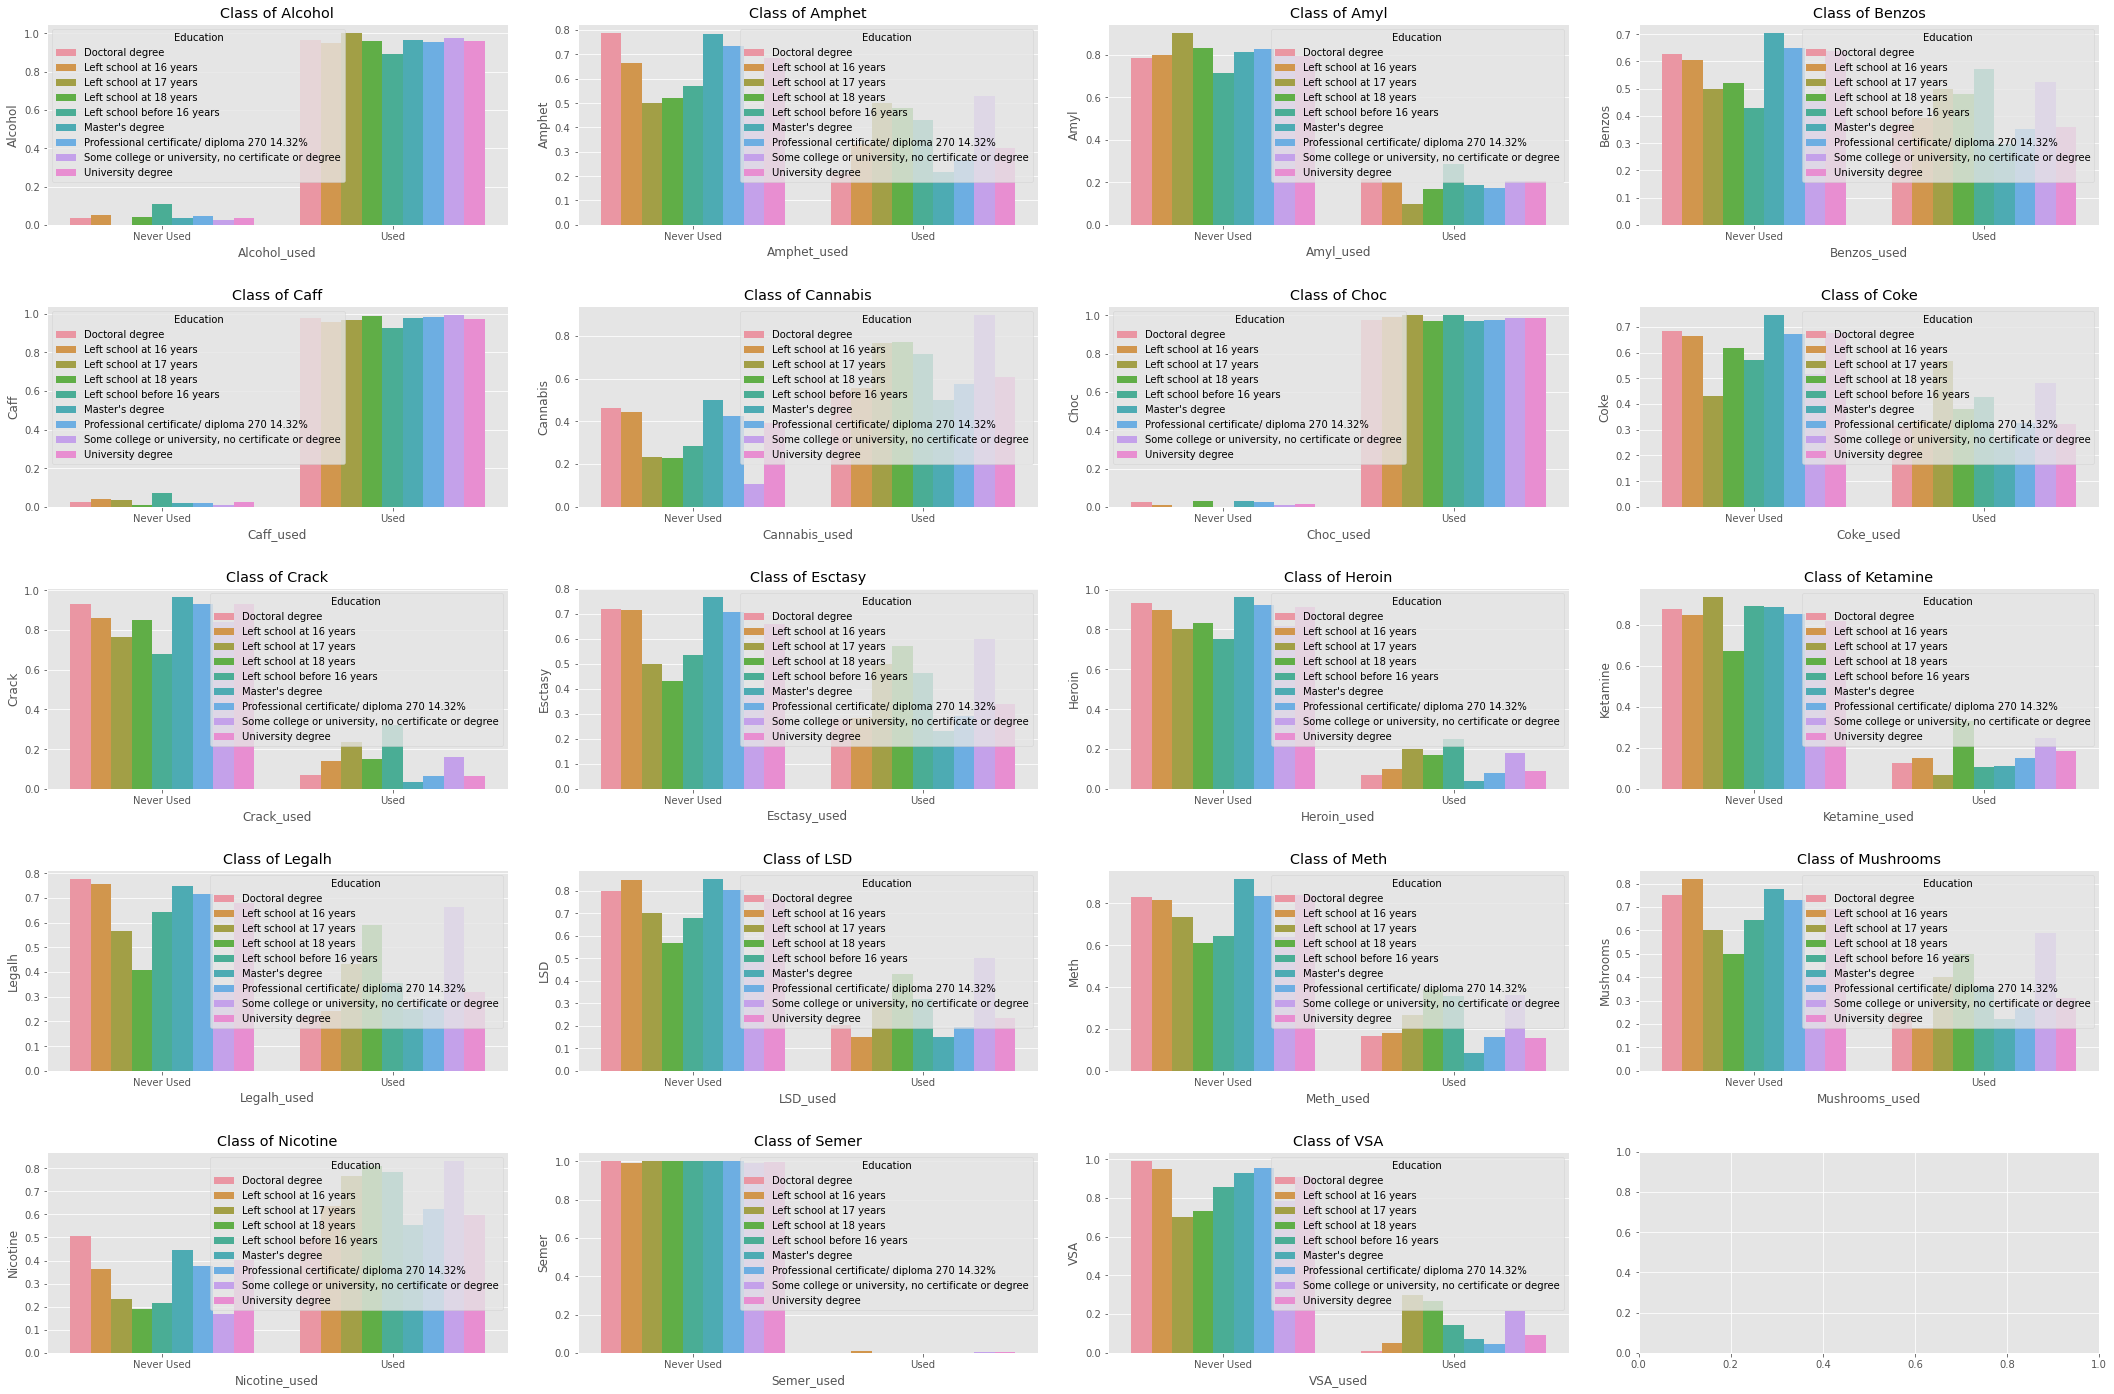

In [ ]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Education"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Education", order = ["Never Used","Used"], data = df_bar, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Country - Drug used

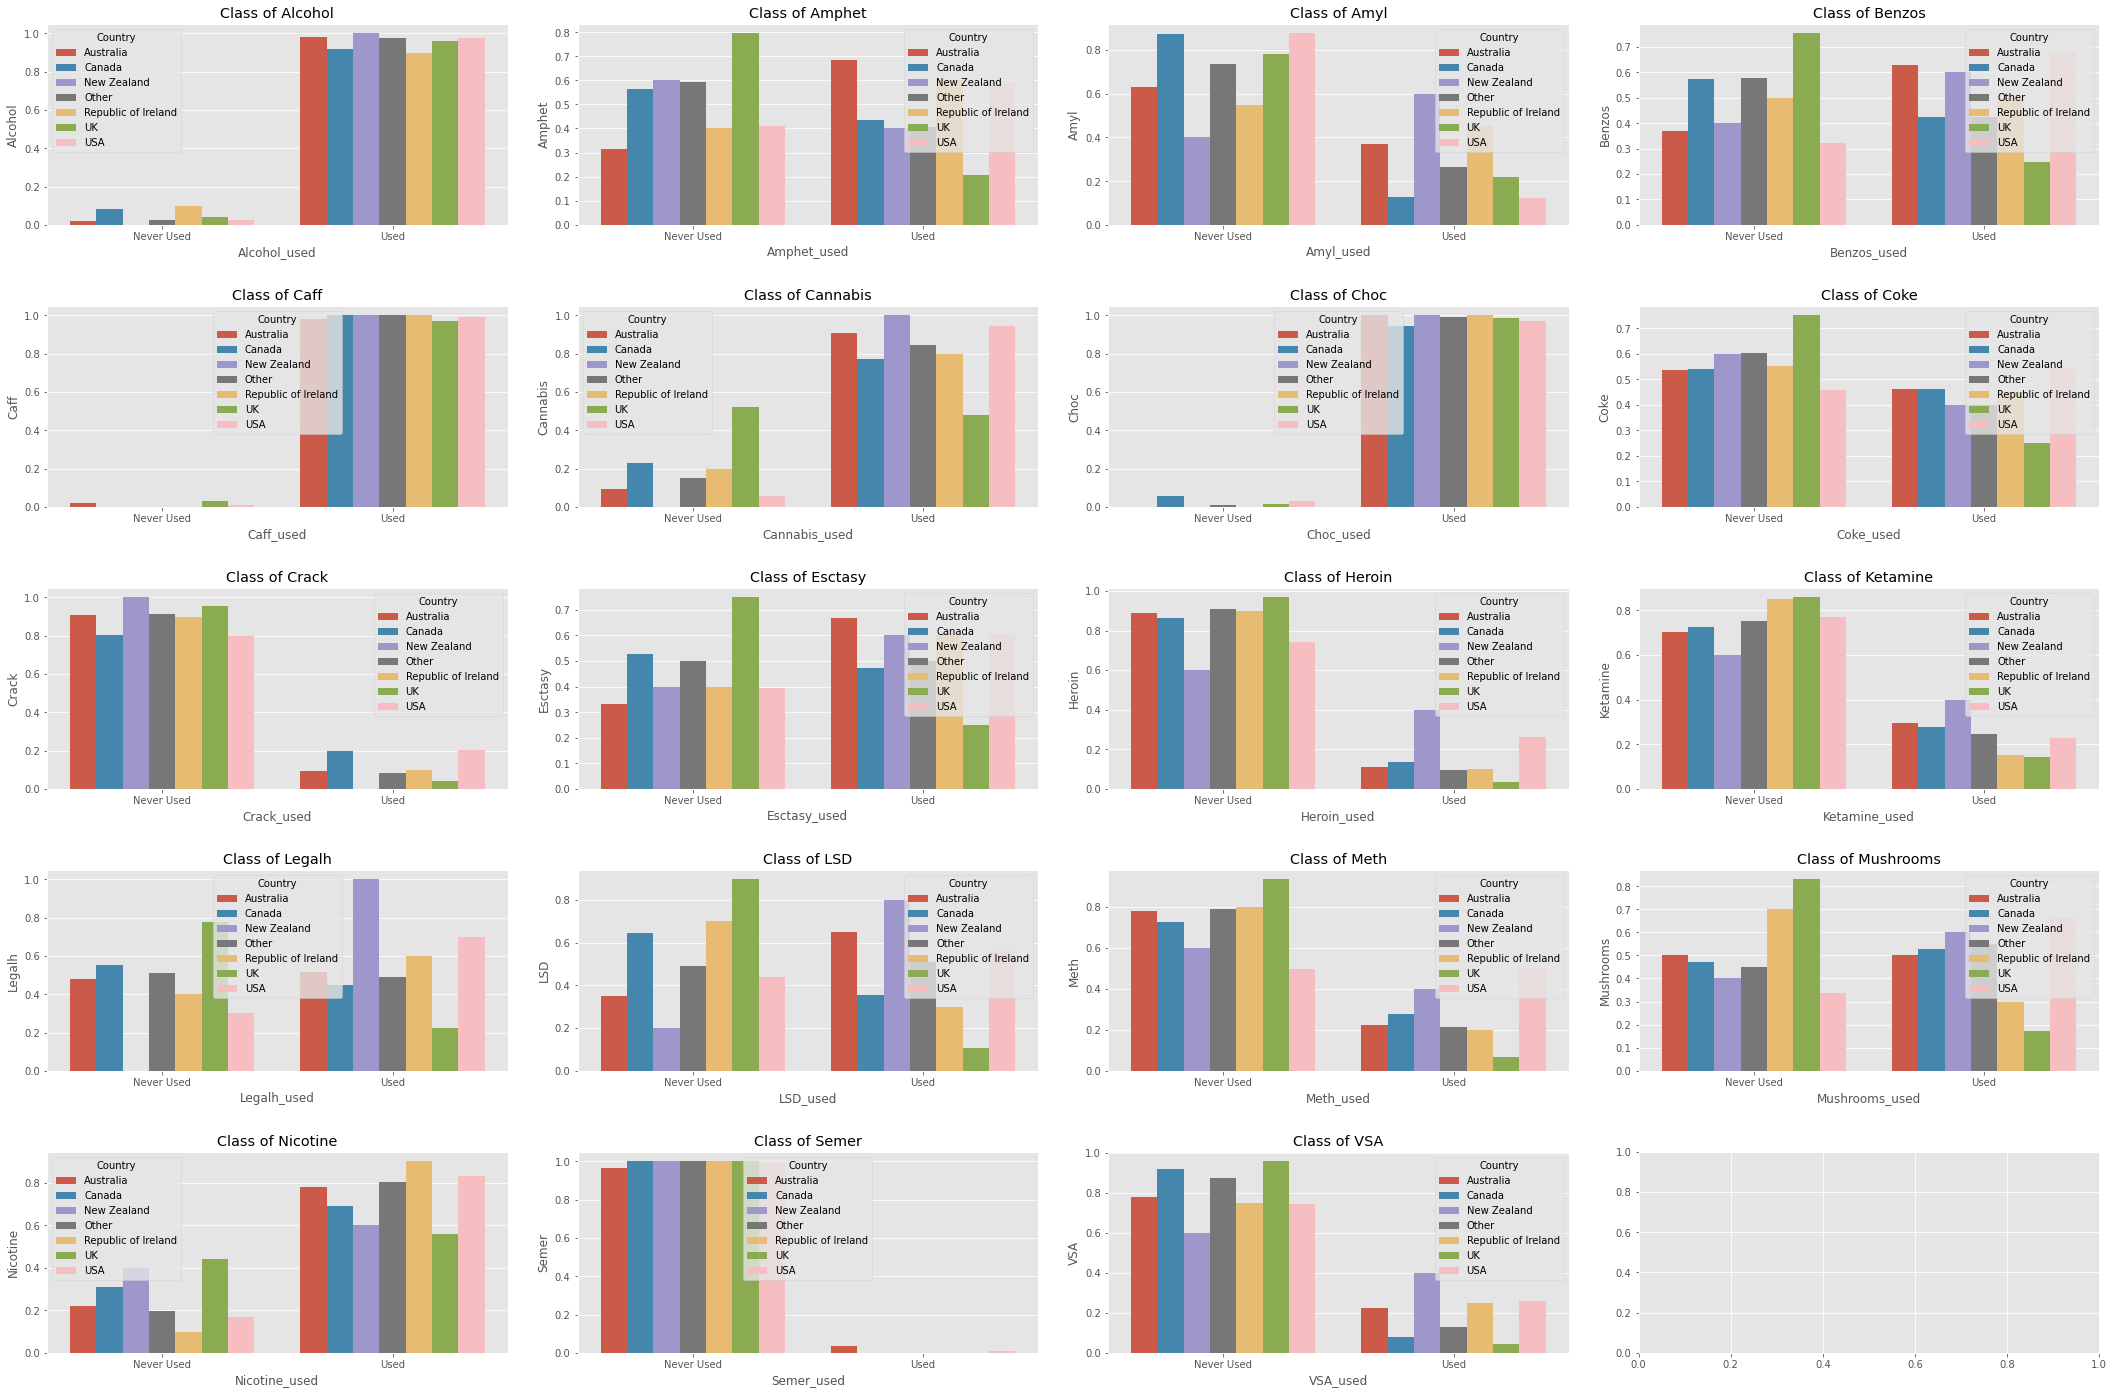

In [ ]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Country"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Country", order = ["Never Used","Used"], data = df_bar, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

##### Ethnicity - Drug used

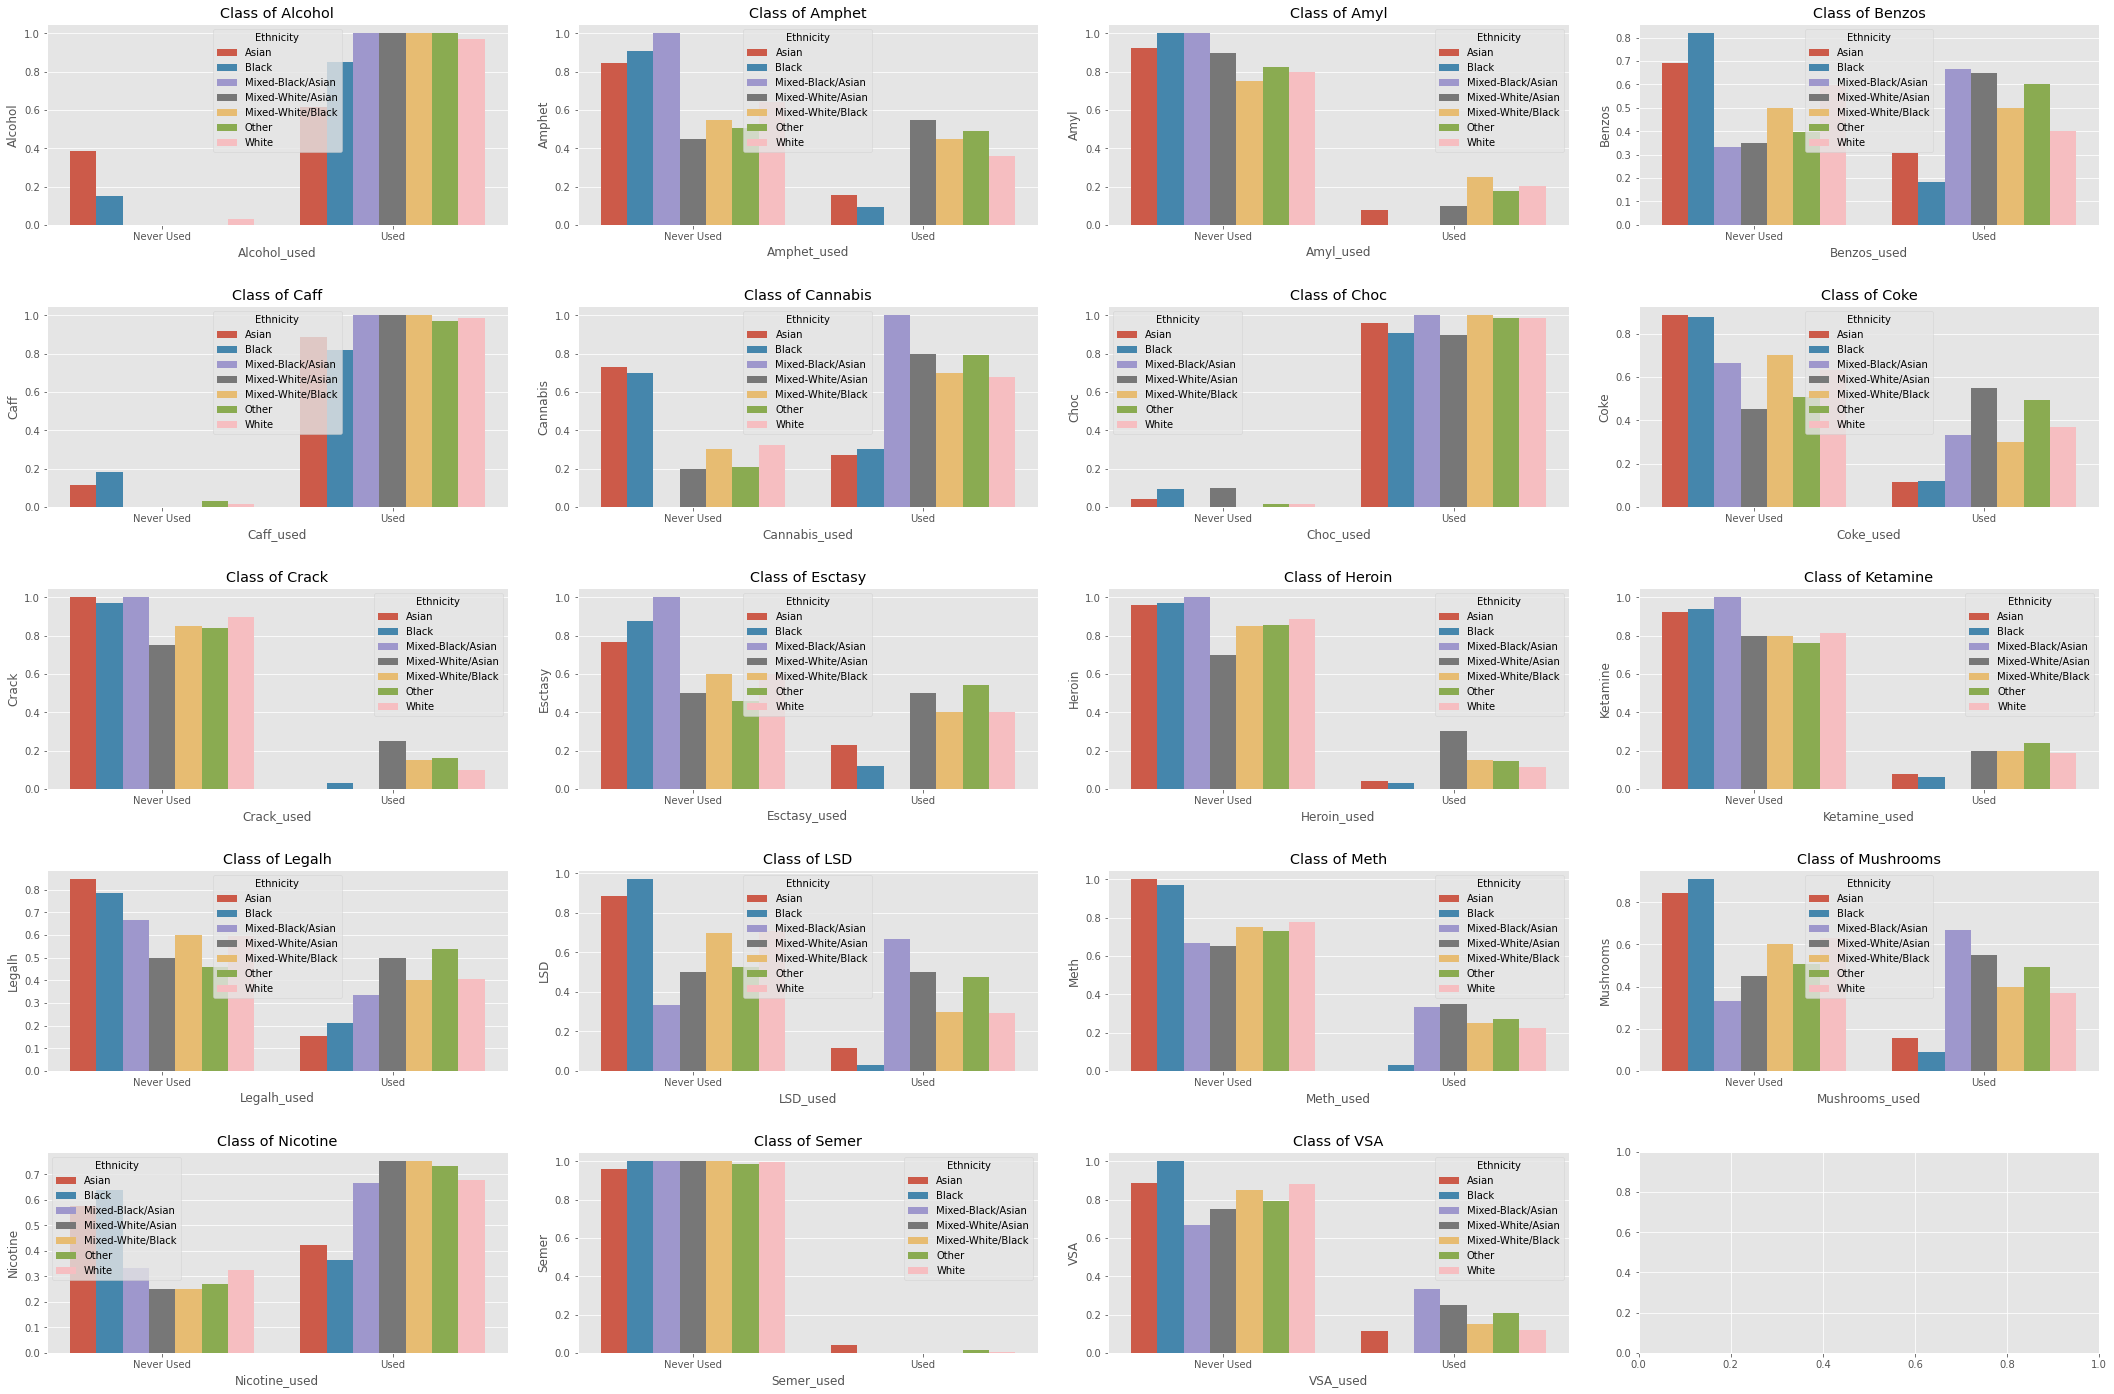

In [ ]:
nrows = 5
ncols = 4
fig, axis = plt.subplots(nrows, ncols, figsize=(30,20))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        if i!=ncols*nrows-1:     
            df_bar = pd.DataFrame(df_viz.groupby(["Ethnicity"])[f"{drug_names[i]}_used"].value_counts(normalize = True))
            df_bar.rename(columns = {f"{drug_names[i]}_used":drug_names[i]}, inplace = True)
            df_bar.reset_index(inplace = True)
            sns.barplot(x = f"{drug_names[i]}_used", y = drug_names[i], hue = "Ethnicity", order = ["Never Used","Used"], data = df_bar, ax=axis[r,c])
            axis[r,c].set_title(f"Class of {df.iloc[:,13:].columns[i]}")
            i+=1
fig.tight_layout(pad=3.0)
fig.show()

#### Between targets

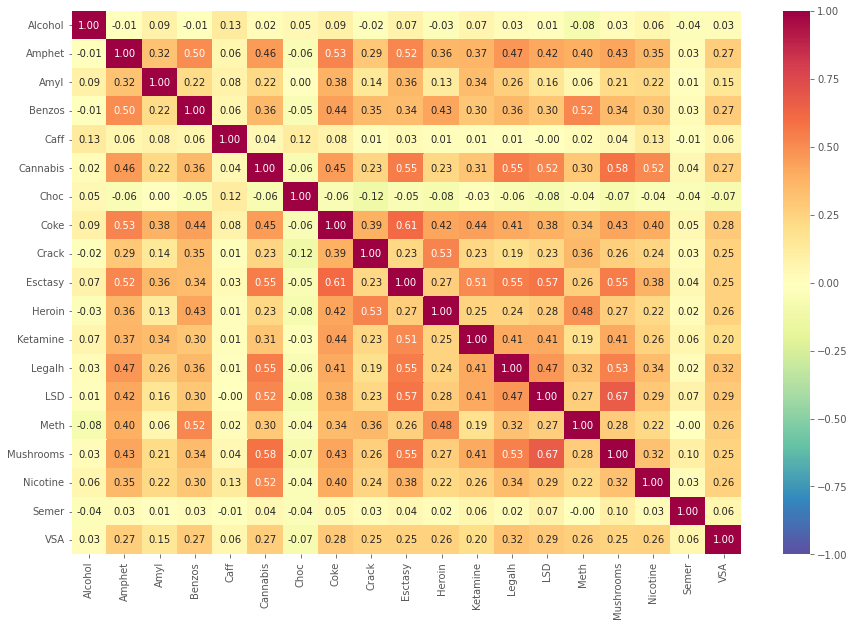

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,13:].corr(),annot=True,fmt='.2f',cmap='Spectral_r',vmax=1.0,vmin=-1.0)
plt.show()

<a name="pca">

### PCA

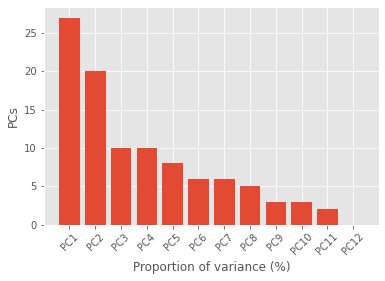

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

pca_out = PCA().fit(df.loc[:,feature_names])

num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

plt.bar(pc_list,np.round(pca_out.explained_variance_ratio_*100))
plt.xticks(rotation=45)
plt.xlabel("Proportion of variance (%)")
plt.ylabel("PCs")
plt.show()

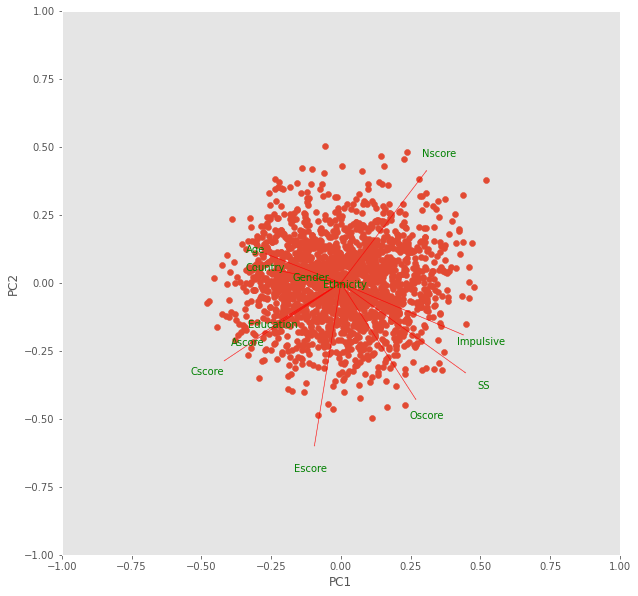

In [ ]:
pca_out = PCA()
pca_x = pca_out.fit_transform(df.loc[:,feature_names])

def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.figure(figsize=(10,10))
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, feature_names[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(pca_x[:,0:2],np.transpose(pca_out.components_[0:2, :]))
plt.show()

<a name="preprocessing">

## Preprocessing
---

In [4]:
df.iloc[:,13:] = df.iloc[:,13:].replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])

In [5]:
df = df.drop("Semer",axis=1)

In [6]:
#remove columns ID from df
df.drop('ID',axis=1,inplace=True)

#modify the column country to be one hot encoded
list_of_countries = ['USA','New zealand','Other_Country','Australia','Republic of ireland','Canada','UK']
df.Country = df.Country.replace(df.Country.unique(),list_of_countries)


#modify the column ethnicity to be one hot encoded
list_of_ethnicity = ['Black','Asian','White','Mix_White_Black','Other_Ethnicity','Mix_White_Asian','Mix_Asian_Black']
df.Ethnicity = df.Ethnicity.replace(df.Ethnicity.unique(),list_of_ethnicity)


df = pd.concat([df.iloc[:,:3],pd.get_dummies(df.Country),pd.get_dummies(df.Ethnicity),df.iloc[:,5:]],axis = 1)

<a name="modeling">

## Modeling
---

<a name="inital_classes">

### Initial classes

In [ ]:
X = df.iloc[:,:24]
y = df.iloc[:,24:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
y.iloc[:,].value_counts()

CL0    1069
CL1     259
CL3     214
CL2     177
CL4      97
CL5      56
CL6      13
Name: LSD, dtype: int64

#### Basic implementation

##### First metric: Accuracy
Accuracy is not the best metrics in this case as we can see here

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]
scores = dict()
scoring = ['accuracy', 'balanced_accuracy', 'precision']

for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        score_ = model.score(X_test, y_test_i)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

Alcohol :  LogisticRegression :  0.4452296819787986
Amphet :  SVC :  0.5388692579505301
Amyl :  RandomForestClassifier :  0.7102473498233216
Benzos :  SVC :  0.5459363957597173
Caff :  LogisticRegression :  0.7579505300353356
Cannabis :  SVC :  0.43992932862190814
Choc :  SVC :  0.41519434628975266
Coke :  SVC :  0.5971731448763251
Crack :  RandomForestClassifier :  0.8816254416961131
Esctasy :  SVC :  0.5812720848056537
Heroin :  RandomForestClassifier :  0.8604240282685512
Ketamine :  SVC :  0.803886925795053
Legalh :  SVC :  0.6466431095406361
LSD :  SVC :  0.6148409893992933
Meth :  RandomForestClassifier :  0.765017667844523
Mushrooms :  SVC :  0.5830388692579506
Nicotine :  SVC :  0.4028268551236749
VSA :  SVC :  0.784452296819788



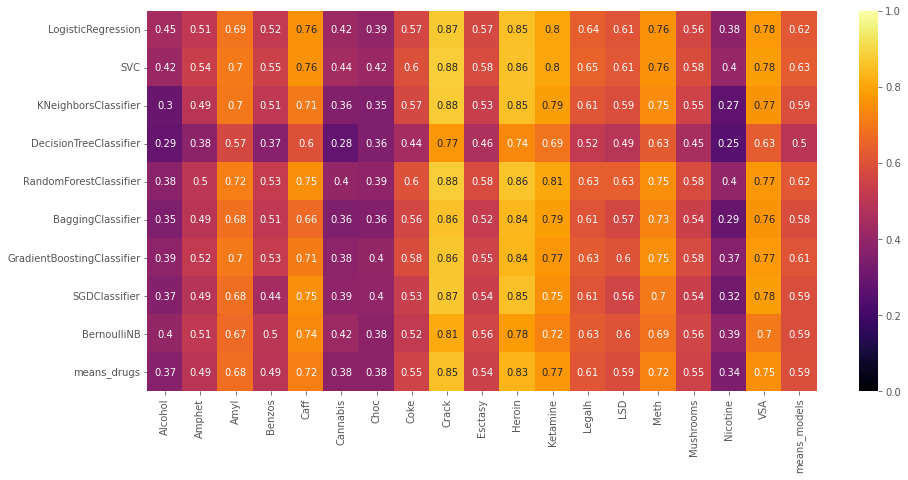

In [ ]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

##### Second metric: Accuracy balanced (classes took into account)

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]
scores = dict()
scoring = ['accuracy', 'balanced_accuracy', 'precision']

for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/18 [00:00<?, ?it/s]

Alcohol :  BernoulliNB :  0.23902397029765146
Amphet :  BernoulliNB :  0.2295992111449647


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Amyl :  GradientBoostingClassifier :  0.22576041504337432
Benzos :  SGDClassifier :  0.21296606311804836
Caff :  SGDClassifier :  0.16737385726932766
Cannabis :  SVC :  0.2875494611223024


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Choc :  DecisionTreeClassifier :  0.25288879920178475
Coke :  GradientBoostingClassifier :  0.2384703698909541


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Crack :  BernoulliNB :  0.23380283494424267
Esctasy :  BernoulliNB :  0.21061562822852395
Heroin :  BernoulliNB :  0.217939027462837
Ketamine :  DecisionTreeClassifier :  0.1939372135800707
Legalh :  BernoulliNB :  0.2507777426857773
LSD :  BernoulliNB :  0.3122374515252853
Meth :  BernoulliNB :  0.20461207738909518


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Mushrooms :  SGDClassifier :  0.38312315604037667
Nicotine :  GradientBoostingClassifier :  0.22868463805536307
VSA :  BernoulliNB :  0.19564389462348647


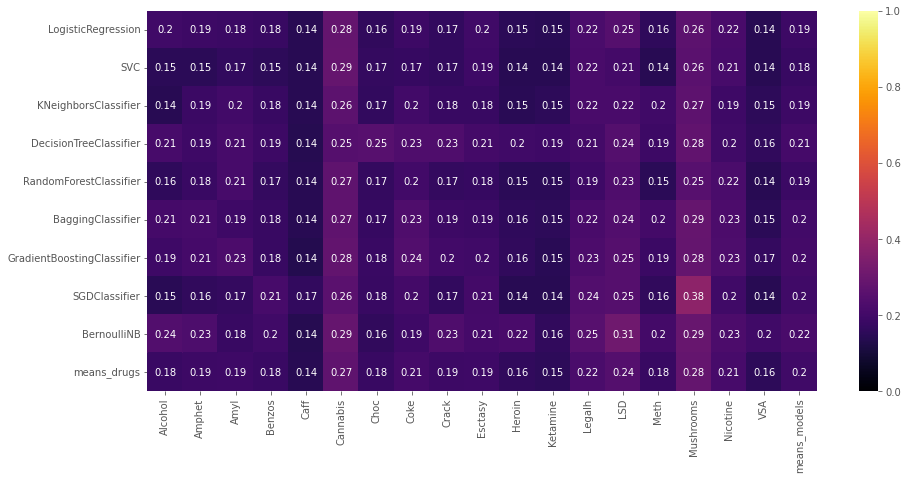

In [ ]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

##### Third Metric: Confusion matrix
Example: Alcohol

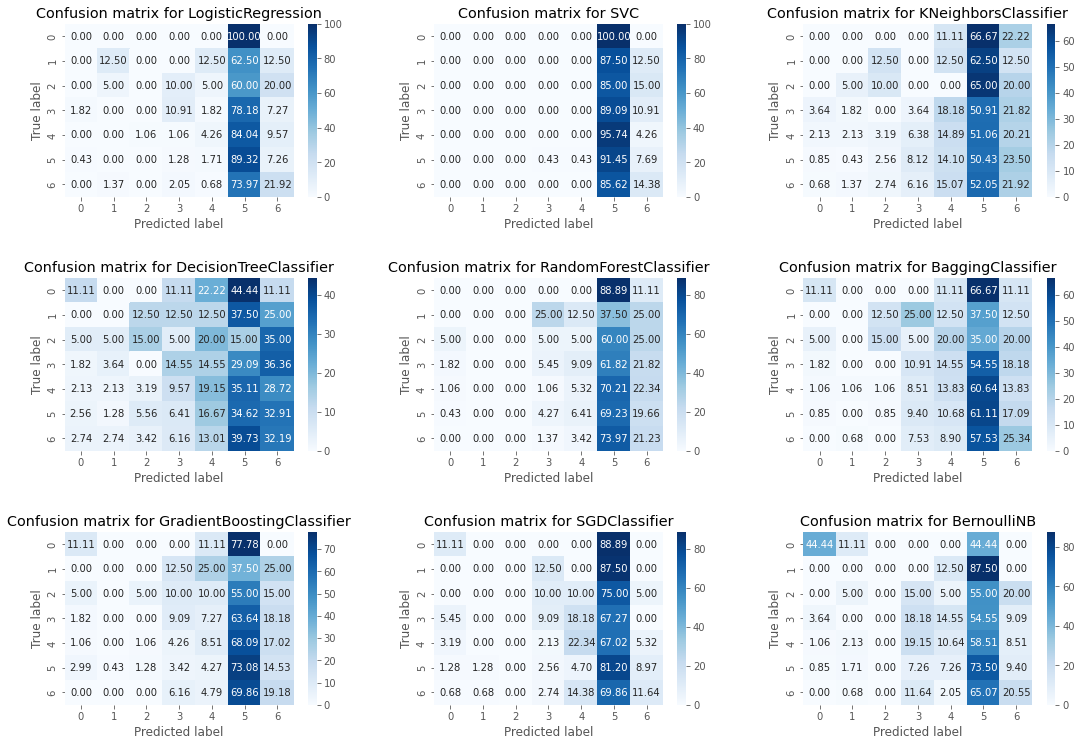

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
i = 0
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Weighting (balanced classes)

In principal, unbalanced classes are not a problem at all for the k-nearest neighbor algorithm.

Because the algorithm is not influenced in any way by the size of the class, it will not favor any on the basis of size. T

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000, class_weight="balanced"), 
          SVC(class_weight="balanced"), 
          KNeighborsClassifier(), 
          DecisionTreeClassifier(class_weight="balanced"), 
          RandomForestClassifier(class_weight="balanced"), 
          BaggingClassifier(), 
          GradientBoostingClassifier(), 
          SGDClassifier(class_weight="balanced"), 
          BernoulliNB()]

In [ ]:
scores = dict()
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/18 [00:00<?, ?it/s]

Alcohol :  LogisticRegression :  0.24522677037978702
Amphet :  LogisticRegression :  0.30368846681742745


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Amyl :  SVC :  0.305454586774713
Benzos :  LogisticRegression :  0.2914673465745748
Caff :  SVC :  0.2507637542480748
Cannabis :  LogisticRegression :  0.31516812330775806


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Choc :  SVC :  0.2730739582282313
Coke :  SVC :  0.29050479980489413


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Crack :  LogisticRegression :  0.3078478187070451
Esctasy :  SVC :  0.25587805737054065
Heroin :  DecisionTreeClassifier :  0.2457688389365408
Ketamine :  SVC :  0.23622171479314338
Legalh :  LogisticRegression :  0.25094294949334306
LSD :  LogisticRegression :  0.3952919248807337
Meth :  SVC :  0.2747131410703817


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Mushrooms :  SVC :  0.37316195610755587
Nicotine :  SVC :  0.2736514972444228
VSA :  SVC :  0.253473590208284


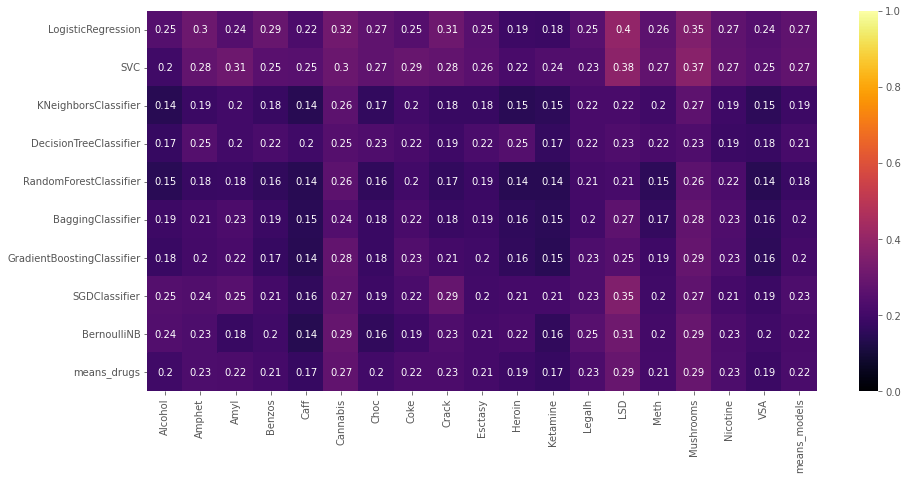

In [ ]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example for alcohol

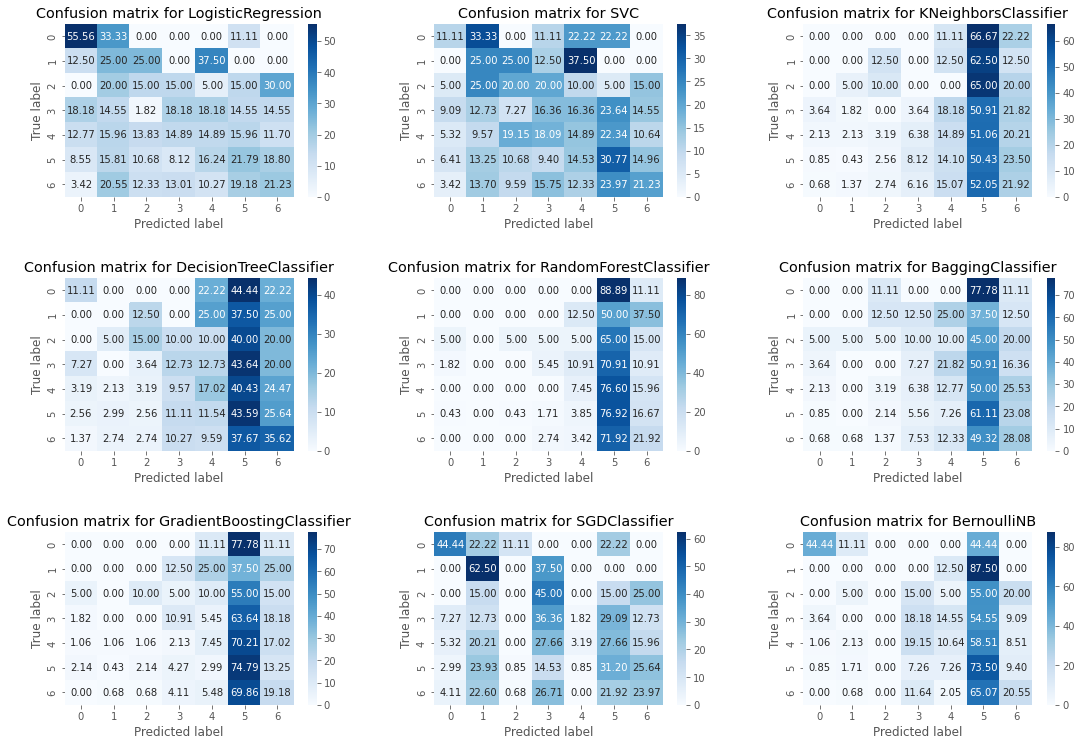

In [ ]:
nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
i = 0
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Over sampling

In [ ]:
# We group the classes with less than 6 samples (condition required by the SMOTE algorithm)
dict_1 = {0:0,1:1,2:2,3:3,4:4,5:5,6:5}
dict_2 = {0:0,1:0,2:1,3:2,4:3,5:4,6:5} 

df_classed2 = df.copy()
df_classed2.iloc[:,26] = df_classed2.iloc[:,26].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,30] = df_classed2.iloc[:,30].replace(dict_2.keys(),dict_2.values())
df_classed2.iloc[:,32] = df_classed2.iloc[:,32].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,35] = df_classed2.iloc[:,35].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,39] = df_classed2.iloc[:,39].replace(dict_1.keys(),dict_1.values())
df_classed2.iloc[:,41] = df_classed2.iloc[:,41].replace(dict_1.keys(),dict_1.values())

In [ ]:
X = df_classed2.iloc[:,:24]
y = df_classed2.iloc[:,24:]
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
oversample = SMOTE()
list_X = dict()
list_y = dict()
for i, name in enumerate(y_train_sampled.columns):
    try:
        new_X, new_y = oversample.fit_resample(X_train_sampled, y_train_sampled.iloc[:,i])
    except Exception as e:
        print(i,e)
    list_X[name] = new_X
    list_y[name] = new_y

In [ ]:
scores = dict
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    X_train_i = list_X[y.columns[i]]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test_sampled)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/18 [00:00<?, ?it/s]

Alcohol :  BernoulliNB :  0.23902397029765146
Amphet :  BernoulliNB :  0.2295992111449647


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Amyl :  DecisionTreeClassifier :  0.23816886135785156
Benzos :  SGDClassifier :  0.2173462970362771
Caff :  DecisionTreeClassifier :  0.15727536110811371
Cannabis :  RandomForestClassifier :  0.2945438053598401


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Choc :  GradientBoostingClassifier :  0.18202060561217057
Coke :  SGDClassifier :  0.23500291863828057


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Crack :  BernoulliNB :  0.23380283494424267
Esctasy :  BernoulliNB :  0.21061562822852395
Heroin :  BernoulliNB :  0.217939027462837
Ketamine :  DecisionTreeClassifier :  0.186915663701378
Legalh :  BernoulliNB :  0.2507777426857773
LSD :  BernoulliNB :  0.3122374515252853
Meth :  BernoulliNB :  0.20461207738909518


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1953: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Mushrooms :  BernoulliNB :  0.2898771271807558
Nicotine :  BaggingClassifier :  0.2399172847433547
VSA :  SGDClassifier :  0.20974837811572503


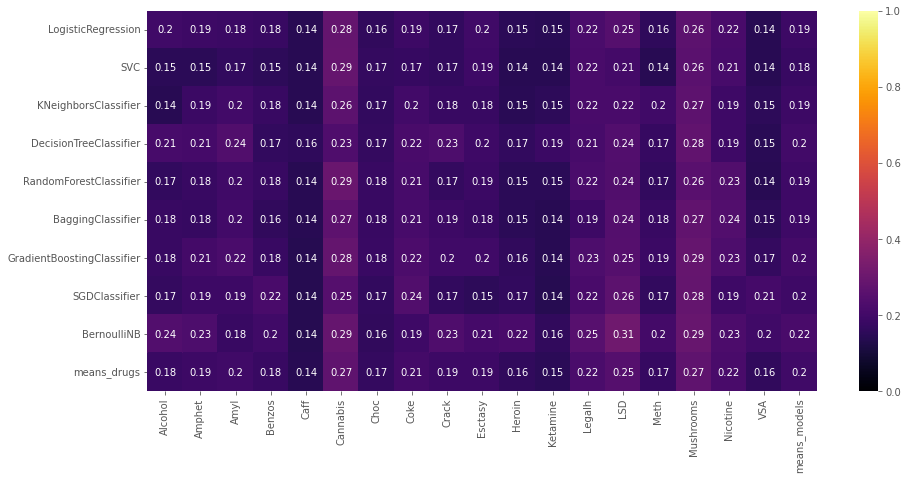

In [ ]:
All_scores = pd.DataFrame(scores, index=model_names)
All_scores['means_models'] = All_scores.mean(axis=1)
All_scores.loc['means_drugs'] = All_scores.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example Alcohol

In [ ]:
X_train_sampled, y_train_sampled = list_X["Alcohol"], list_y["Alcohol"]
y_test_sampled = y_test_sampled.loc[:,"Alcohol"]

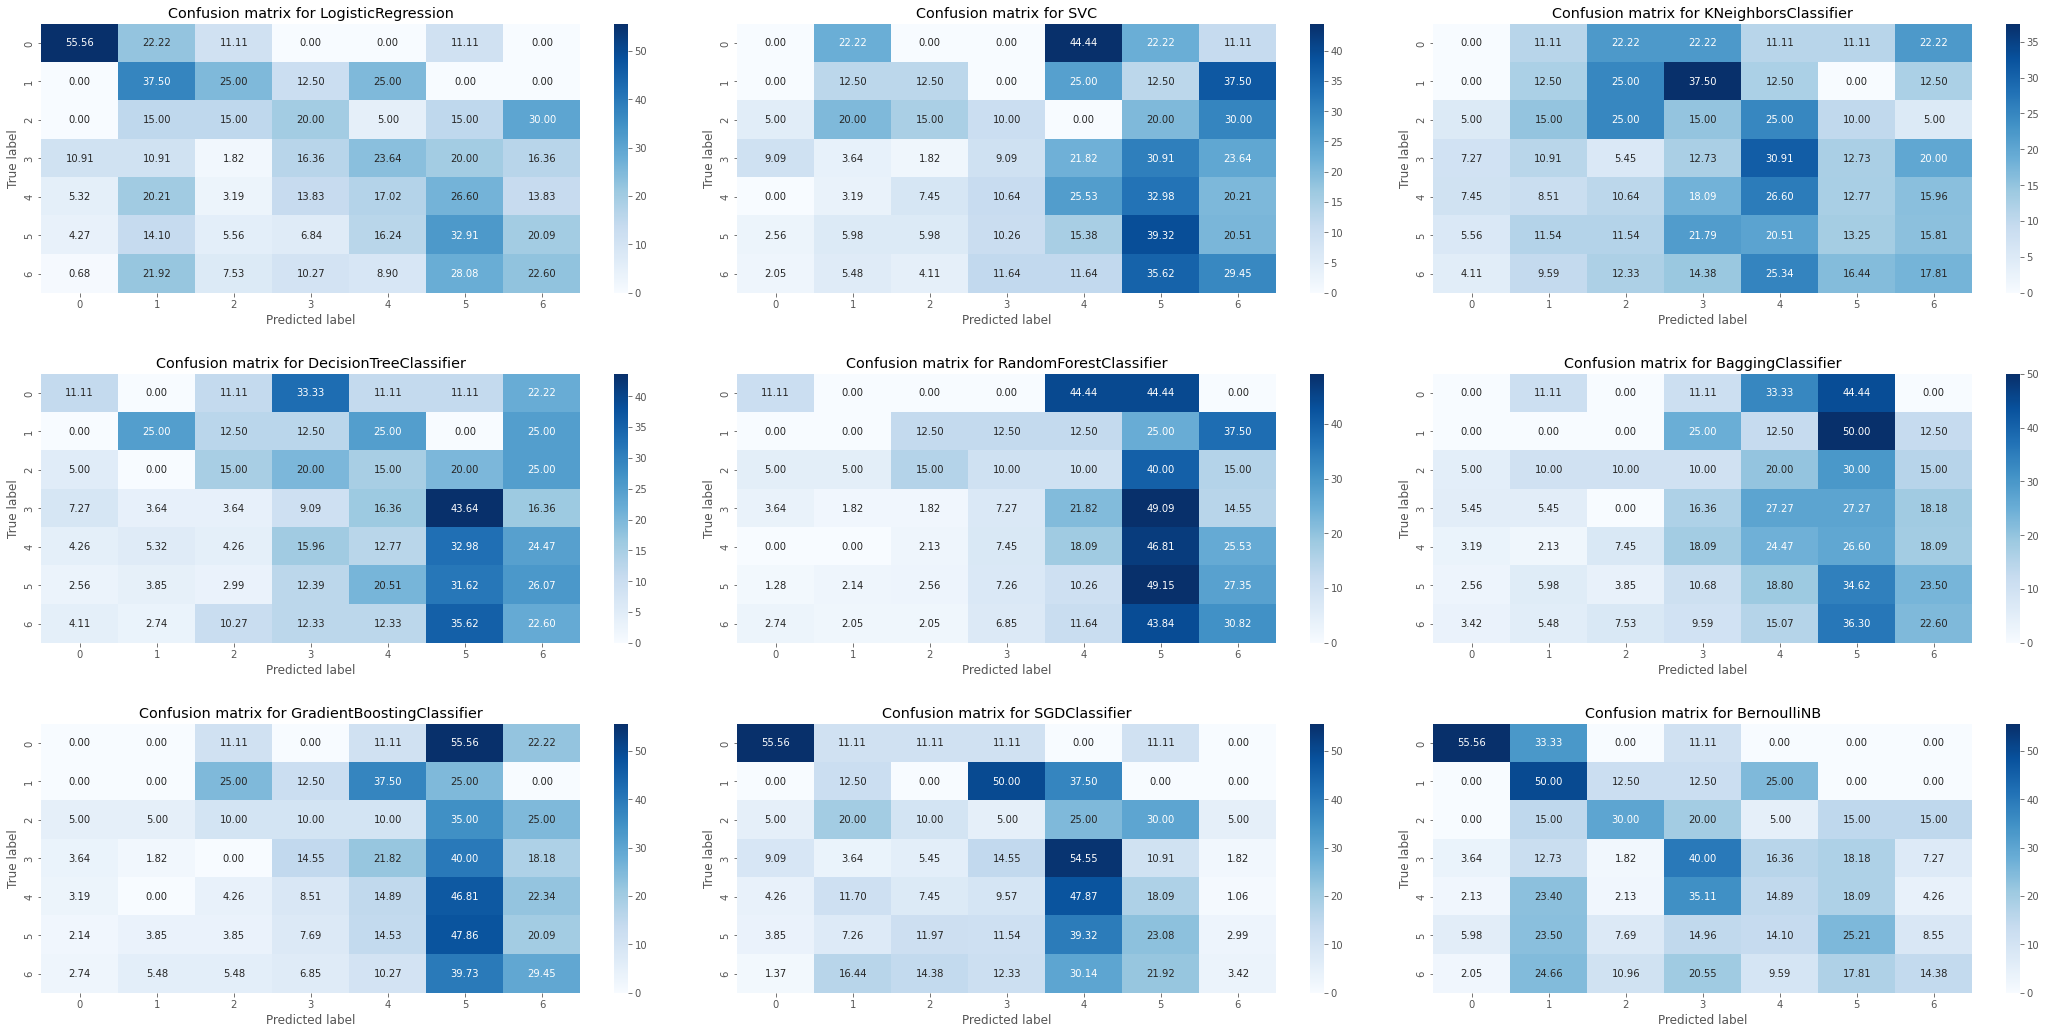

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train_sampled
        y_test_i = y_test_sampled
        models[k].fit(X_train_sampled, y_train_i)
        preds = models[k].predict(X_test_sampled)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

<a name="new_classes">

### New classes

We delete chocolate from the dataset

In [7]:
df = df.drop("Choc",axis=1) #ATTENTION CA CHANGE LES COLONNES

Based on the confusion matrix, we create new class depending on the drugs

In [8]:
liste = [["Alcohol","Cannabis", "Nicotine","Amphet", "Benzos", "Coke", "Esctasy", "Legalh"],
         ["Amyl", "Crack", "Heroin", "Ketamine", "Meth", "VSA","LSD", "Mushrooms"], 
         ["Caff"]]
dict_1 = {0:0,1:0,2:0,3:0,4:1,5:1,6:1} # Alcohol, Cannabis, Nicotine, Amphet, Benzos, Coke, Ecstasy, Legalh, LSD, mushrooms
# 0: never used in the last month => not addict
# 1: used last month => addict
dict_2 = {0:0,1:0,2:1,3:1,4:1,5:1,6:1} # Amyl, Crack, Heroin, Ketamine, Meth, VSA
# 0: never used 
# 1: used 
dict_3 = {0:0,1:0,2:0,3:0,4:0,5:0,6:1} # Caff
# 0: not used yesterday => not daily addict
# 1: used yesterday => daily addict

list_of_dicts = [dict_1,dict_2,dict_3]

df_classed = df.copy()
for l, d in zip(liste, list_of_dicts):
    for i in l:
        df_classed[i] = df_classed[i].replace(d.keys(),d.values())

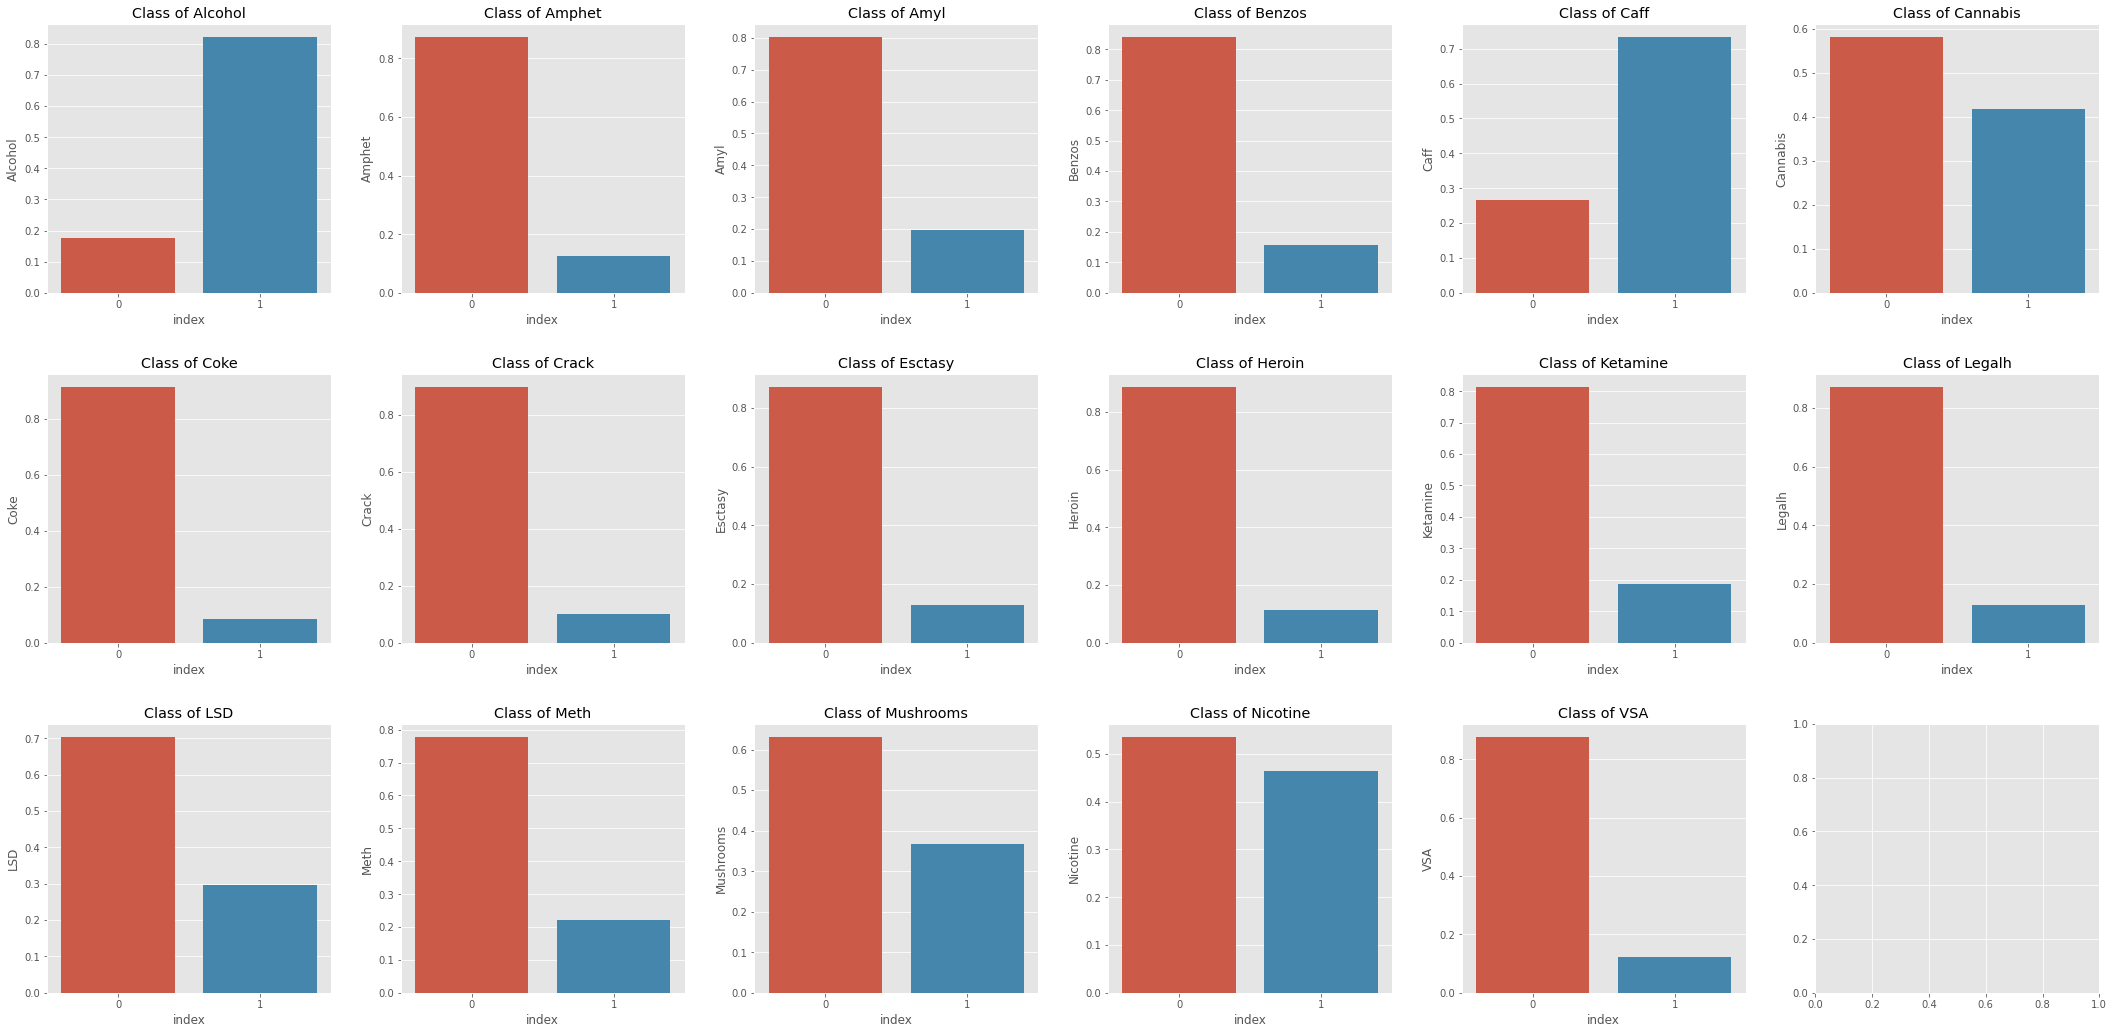

In [ ]:
nrows = 3
ncols = 6
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
i = 0
for r in range(nrows):
    for c in range(ncols):  
        drug_density = pd.DataFrame(df_classed.iloc[:,24+i].value_counts(normalize=True)).reset_index()
        sns.barplot(x = "index", y = df_classed.iloc[:,24:].columns[i], data = drug_density, ax=axis[r,c])
        axis[r,c].set_title(f"Class of {df_classed.iloc[:,24:].columns[i]}")
        axis[r,c].tick_params(axis='x')
        i+=1
        if i == 17:
          break
fig.tight_layout(pad=3.0)
fig.show()

In [9]:
X = df_classed.iloc[:,:24]
y = df_classed.iloc[:,24:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Alcohol
y_train_i = y_train.loc[:,"Alcohol"]
y_test_i = y_test.loc[:,"Alcohol"]

#### Basic implementation

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]
scores_basic = dict()
best_model_basic = dict()
best_model_name_basic = dict()

for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores_basic[y.columns[i]] = scores_models
    best_model_basic[y.columns[i]] = models[np.argmax(scores_models)]
    best_model_name_basic[y.columns[i]] = model_names[np.argmax(scores_models)]
    print(y.columns[i],': ', model_names[np.argmax(scores_models)], ": ", max(scores_models), sep="")

  0%|          | 0/17 [00:00<?, ?it/s]

Alcohol: BaggingClassifier: 0.5491423592001468
Amphet: BernoulliNB: 0.641136675123203
Amyl: SGDClassifier: 0.6522435897435898
Benzos: BernoulliNB: 0.696819132750095
Caff: BaggingClassifier: 0.5275041260442721
Cannabis: BernoulliNB: 0.7977694928328084
Coke: BernoulliNB: 0.5278580639423718
Crack: BernoulliNB: 0.6548573007539573
Esctasy: DecisionTreeClassifier: 0.5771708683473389
Heroin: BernoulliNB: 0.6728535484093338
Ketamine: BernoulliNB: 0.5897306961671696
Legalh: BernoulliNB: 0.6539688164422395
LSD: BernoulliNB: 0.7722229227083596
Meth: BernoulliNB: 0.7552911983652022
Mushrooms: BernoulliNB: 0.762484757787385
Nicotine: RandomForestClassifier: 0.6969952418418193
VSA: BernoulliNB: 0.6979076940176165


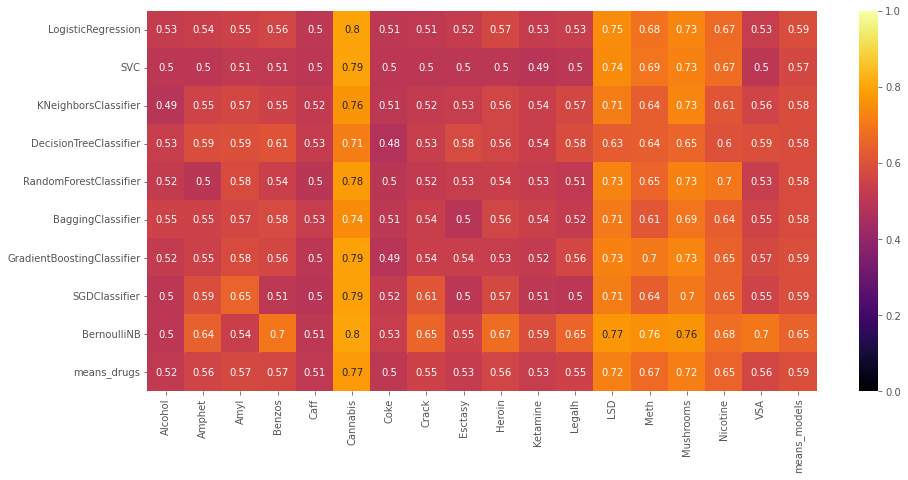

In [ ]:
All_scores_basic = pd.DataFrame(scores_basic, index=model_names)
All_scores_basic['means_models'] = All_scores_basic.mean(axis=1)
All_scores_basic.loc['means_drugs'] = All_scores_basic.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores_basic,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example: Alcohol

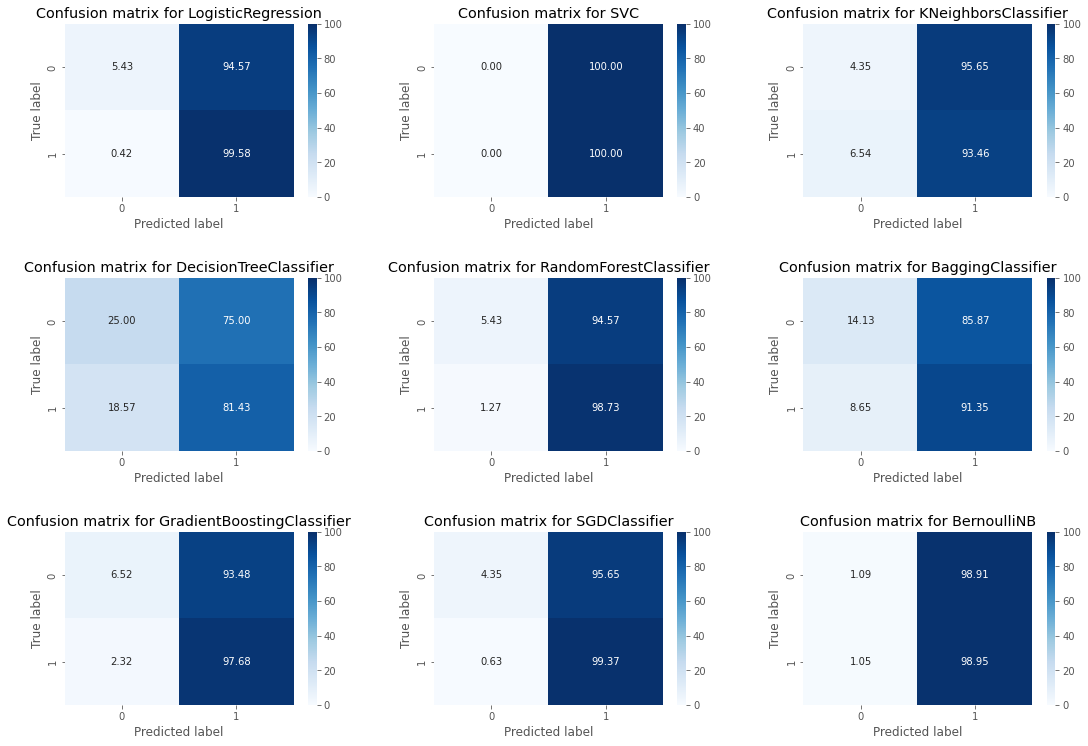

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
i = 0
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized,vmin=0, vmax=100, annot=True, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Weighting (balanced classes)

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000, class_weight="balanced"), 
          SVC(class_weight="balanced"), 
          KNeighborsClassifier(), 
          DecisionTreeClassifier(class_weight="balanced"), 
          RandomForestClassifier(class_weight="balanced"), 
          BaggingClassifier(), 
          GradientBoostingClassifier(), 
          SGDClassifier(class_weight="balanced"), 
          BernoulliNB()]

In [ ]:
scores_weight = dict()
best_model_weight = dict()
best_model_name_weight = dict()
i=0
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)

    scores_weight[y.columns[i]] = scores_models
    best_model_weight[y.columns[i]] = models[np.argmax(scores_models)]
    best_model_name_weight[y.columns[i]] = model_names[np.argmax(scores_models)]
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/17 [00:00<?, ?it/s]

Alcohol :  LogisticRegression :  0.6295633828655293
Amphet :  LogisticRegression :  0.6870498352433441
Amyl :  LogisticRegression :  0.6800907425907425
Benzos :  SGDClassifier :  0.7568229364777482
Caff :  LogisticRegression :  0.6021472444830109
Cannabis :  LogisticRegression :  0.8144500867776563
Coke :  SVC :  0.6809106674374139
Crack :  SVC :  0.6936012315951525
Esctasy :  SGDClassifier :  0.6621848739495798
Heroin :  SVC :  0.7241581360079964
Ketamine :  SVC :  0.6637613141133087
Legalh :  LogisticRegression :  0.7344377510040161
LSD :  LogisticRegression :  0.7921605093935191
Meth :  LogisticRegression :  0.7608925704276748
Mushrooms :  BernoulliNB :  0.762484757787385
Nicotine :  SGDClassifier :  0.6947035829805303
VSA :  LogisticRegression :  0.7479090833310178


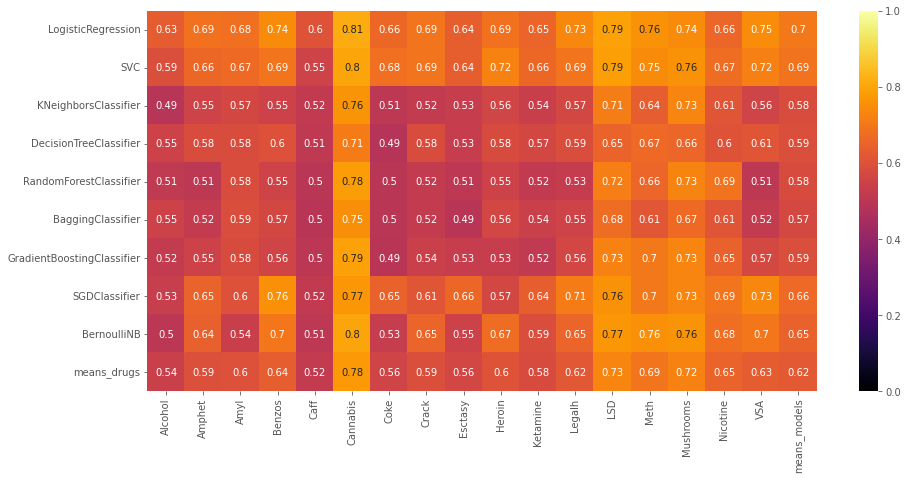

In [ ]:
All_scores_weight = pd.DataFrame(scores_weight, index=model_names)
All_scores_weight['means_models'] = All_scores_weight.mean(axis=1)
All_scores_weight.loc['means_drugs'] = All_scores_weight.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores_weight,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example for alcohol

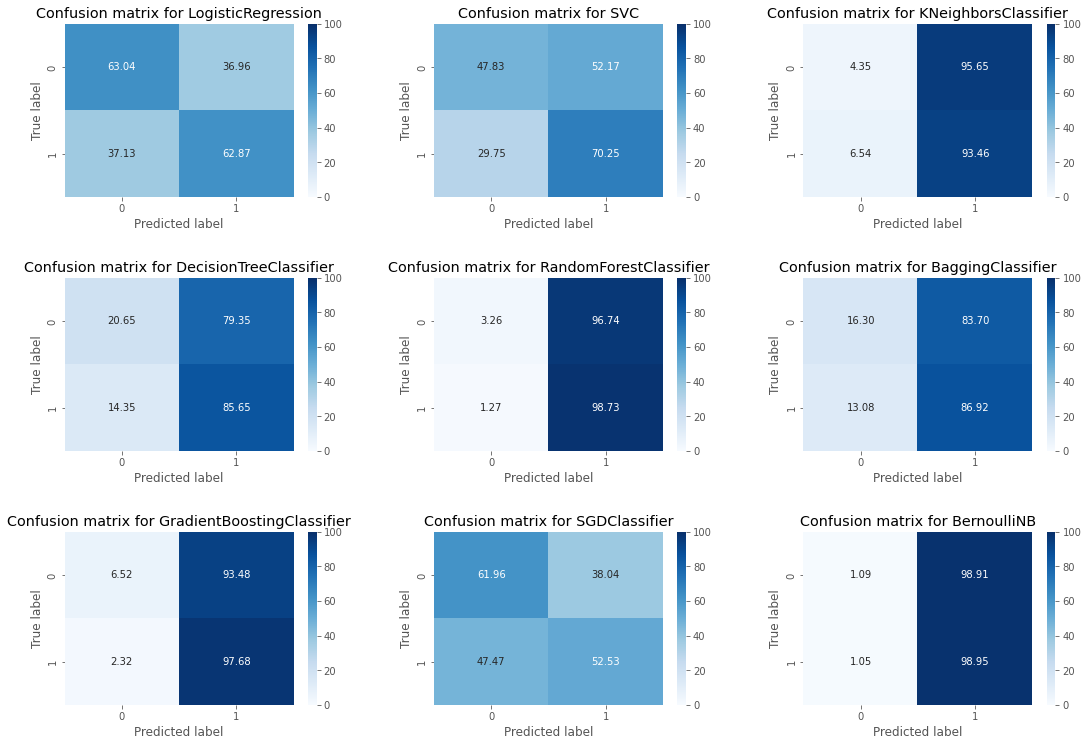

In [ ]:
nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(16,11))
k = 0
i = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]
        models[k].fit(X_train, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Over sampling

In [ ]:
oversample = SMOTE()
list_X = dict()
list_y = dict()
for i, name in enumerate(y_train.columns):
    try:
        new_X, new_y = oversample.fit_resample(X_train, y_train.iloc[:,i])
    except Exception as e:
        print(i,e)
    list_X[name] = new_X
    list_y[name] = new_y

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

scores_sampling = dict()
best_model_sampling = dict()
best_model_name_sampling = dict()
for i in tqdm(range(len(y.columns))):
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    X_train_i = list_X[y.columns[i]]
    scores_models = list()
    for model, model_name in zip(models, model_names):
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        score_ = balanced_accuracy_score(y_test_i, preds)
        scores_models.append(score_)
    best_model_sampling[y.columns[i]] = models[np.argmax(scores_models)]
    best_model_name_sampling[y.columns[i]] = model_names[np.argmax(scores_models)]
    scores_sampling[y.columns[i]] = scores_models
    print(y.columns[i],': ',model_names[np.argmax(scores_models)], ": ", max(scores_models))

  0%|          | 0/17 [00:00<?, ?it/s]

Alcohol :  DecisionTreeClassifier :  0.5483168226013575
Amphet :  BernoulliNB :  0.641136675123203
Amyl :  SGDClassifier :  0.6374666999667
Benzos :  BernoulliNB :  0.696819132750095
Caff :  DecisionTreeClassifier :  0.532685076480697
Cannabis :  SGDClassifier :  0.8004306742945297
Coke :  BernoulliNB :  0.5278580639423718
Crack :  BernoulliNB :  0.6548573007539573
Esctasy :  DecisionTreeClassifier :  0.5683473389355742
Heroin :  BernoulliNB :  0.6728535484093338
Ketamine :  BernoulliNB :  0.5897306961671696
Legalh :  BernoulliNB :  0.6539688164422395
LSD :  BernoulliNB :  0.7722229227083596
Meth :  BernoulliNB :  0.7552911983652022
Mushrooms :  BernoulliNB :  0.762484757787385
Nicotine :  RandomForestClassifier :  0.68669214341913
VSA :  SGDClassifier :  0.7055489177248604


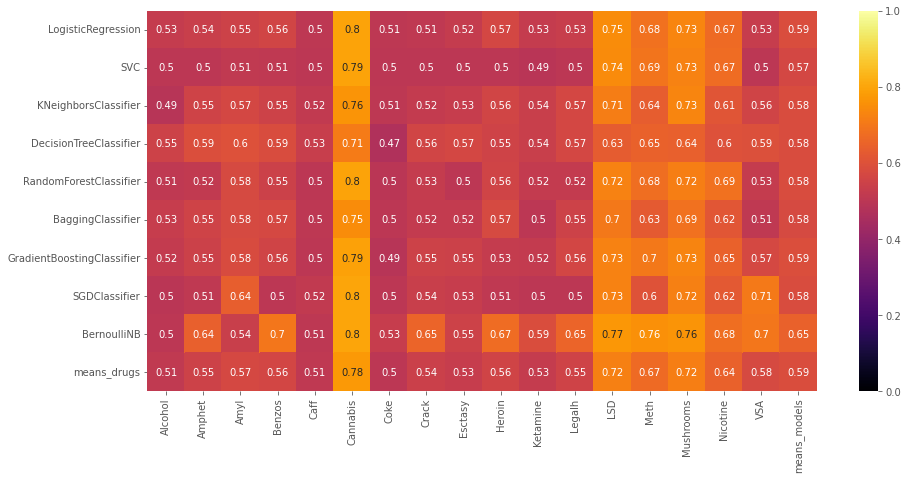

In [ ]:
All_scores_sampling = pd.DataFrame(scores_sampling, index=model_names)
All_scores_sampling['means_models'] = All_scores_sampling.mean(axis=1)
All_scores_sampling.loc['means_drugs'] = All_scores_sampling.mean(axis=0)
plt.figure(figsize=(15,7))
sns.heatmap(All_scores_sampling,annot=True,cmap = 'inferno',vmax=1.0,vmin=0.0)# nice palette of colors for the heatmap (copper_r, inferno, magma, plasma, viridis, cividis)
plt.show()

Example Alcohol

In [ ]:
X_train_sampled, y_train_sampled = list_X["Alcohol"], list_y["Alcohol"]
y_test_sampled = y_test.loc[:,"Alcohol"]

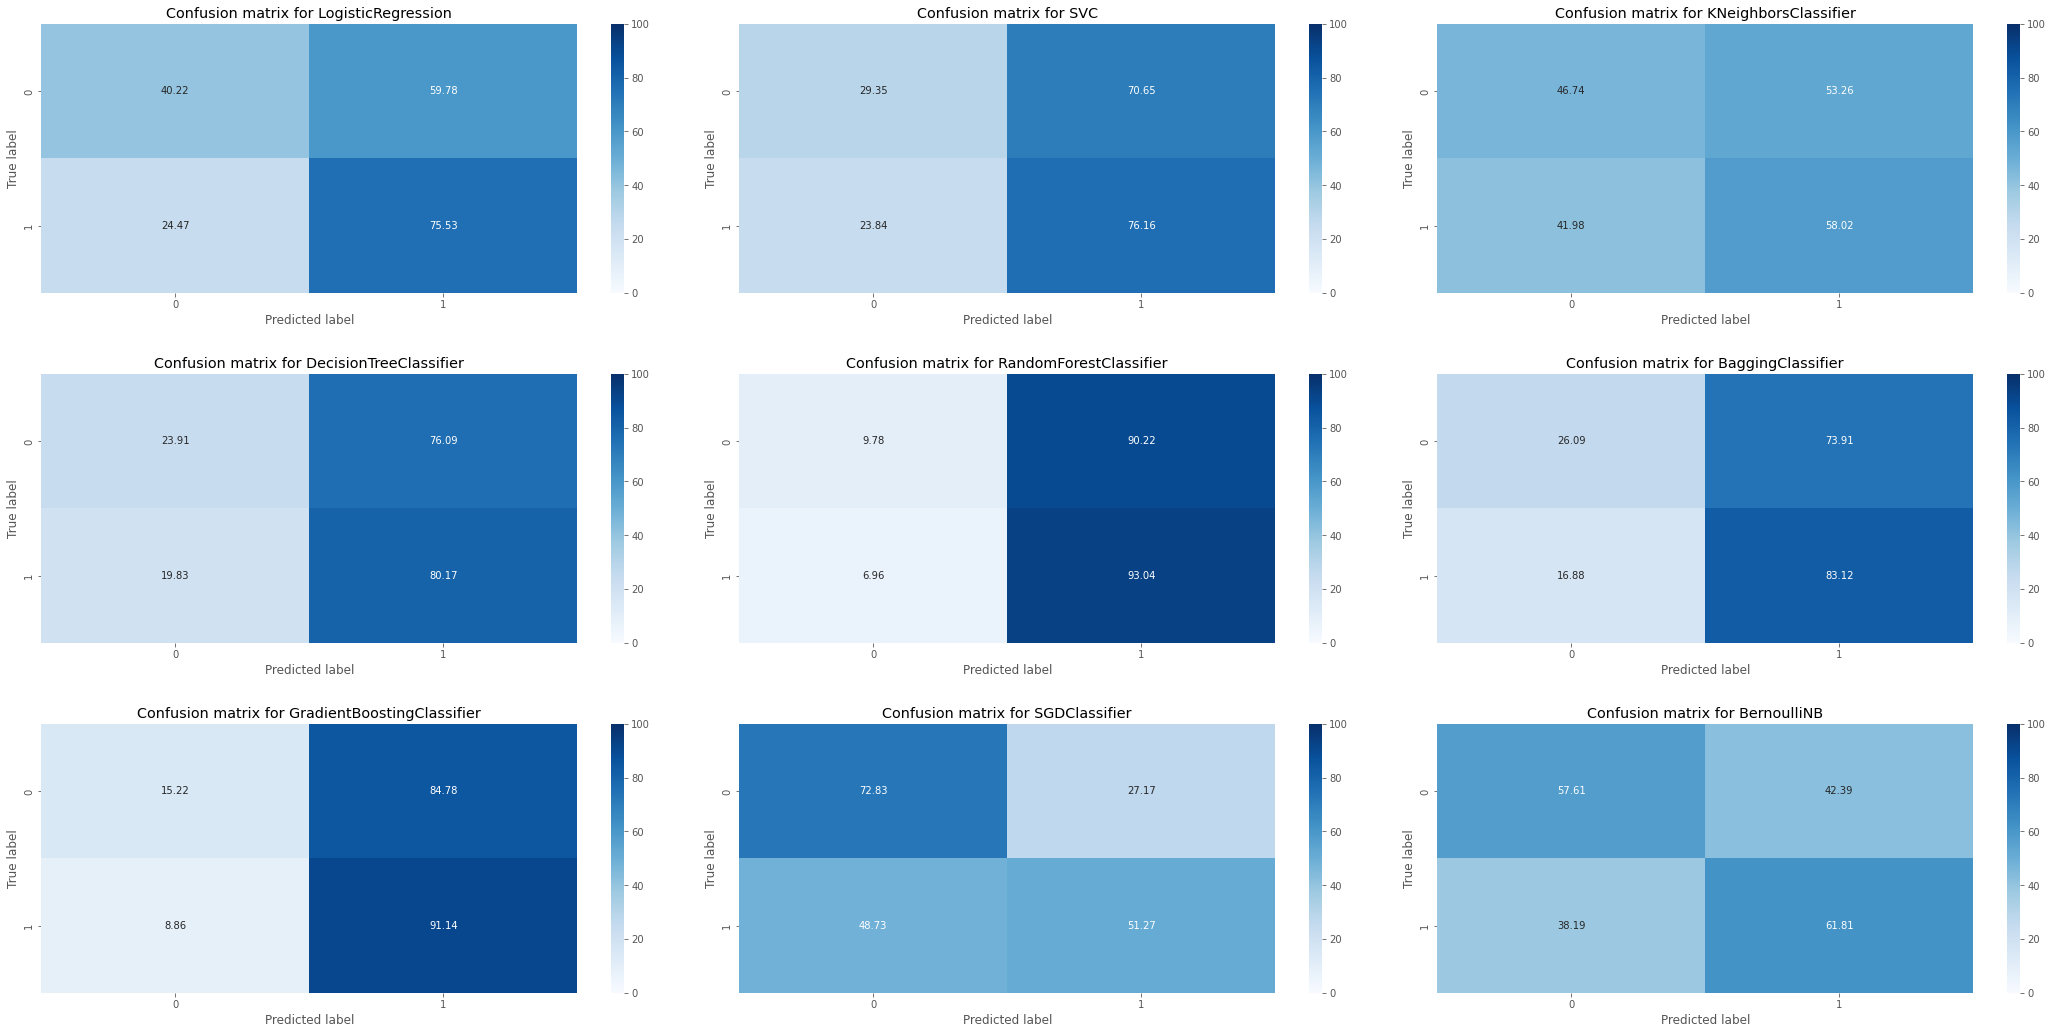

In [ ]:
model_names = ["LogisticRegression", "SVC", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", "BaggingClassifier", "GradientBoostingClassifier", "SGDClassifier", "BernoulliNB"]
models = [LogisticRegression(max_iter=1000), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), SGDClassifier(), BernoulliNB()]

nrows = 3
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(30,15))
k = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train_sampled
        y_test_i = y_test_sampled
        models[k].fit(X_train_sampled, y_train_i)
        preds = models[k].predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True, fmt='.2f',vmin=0, vmax=100, cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + model_names[k])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        k+=1 
fig.tight_layout(pad=3.0)
fig.show()

#### Comparison

In [ ]:
All_names = pd.DataFrame({drug_name:[basic,weight,sampling] for (drug_name, basic), (_, weight), (_, sampling) in zip(best_model_name_basic.items(),
                                                                                                                     best_model_name_weight.items(),
                                                                                                                     best_model_name_sampling.items())})
All_names.index = ["Basic_model_name","Weight_model_name","Sampling_model_name"]

All_scores = pd.DataFrame([All_scores_basic.iloc[:,:-1].max(), All_scores_weight.iloc[:,:-1].max(), All_scores_sampling.iloc[:,:-1].max()])
All_scores.index = ["Basic","Weight","Sampling"]

best_methods = [All_names.index[np.argmax(All_scores[drug])] for drug in All_scores.columns]
best_methods = pd.DataFrame({drug:[best_method,All_names.loc[best_method,drug]] for drug, best_method in zip(All_scores.columns,best_methods)})
best_methods.index = ["Best method","Best model"]

All_scores = All_scores.append(All_names)
All_scores.append(best_methods)

Alcohol  ...                 VSA
Basic                              0.549142  ...            0.697908
Weight                             0.629563  ...            0.747909
Sampling                           0.548317  ...            0.705549
Basic_model_name          BaggingClassifier  ...         BernoulliNB
Weight_model_name        LogisticRegression  ...  LogisticRegression
Sampling_model_name  DecisionTreeClassifier  ...       SGDClassifier
Best method               Weight_model_name  ...   Weight_model_name
Best model               LogisticRegression  ...  LogisticRegression

[8 rows x 17 columns]

Thus, weighting is the best method for all drugs except for mushrooms but the difference is weak.  
Let's now analyse the confusion matrix of the best model for each drugs to verify the results

#### Comparison with each method with confusion matrix

In [ ]:
All_models = pd.DataFrame({drug_name:[basic,weight,sampling] for (drug_name, basic), (_, weight), (_, sampling) in zip(best_model_basic.items(),
                                                                                                                     best_model_weight.items(),
                                                                                                                     best_model_sampling.items())})
All_models.index = ["Basic","Weight","Sampling"]

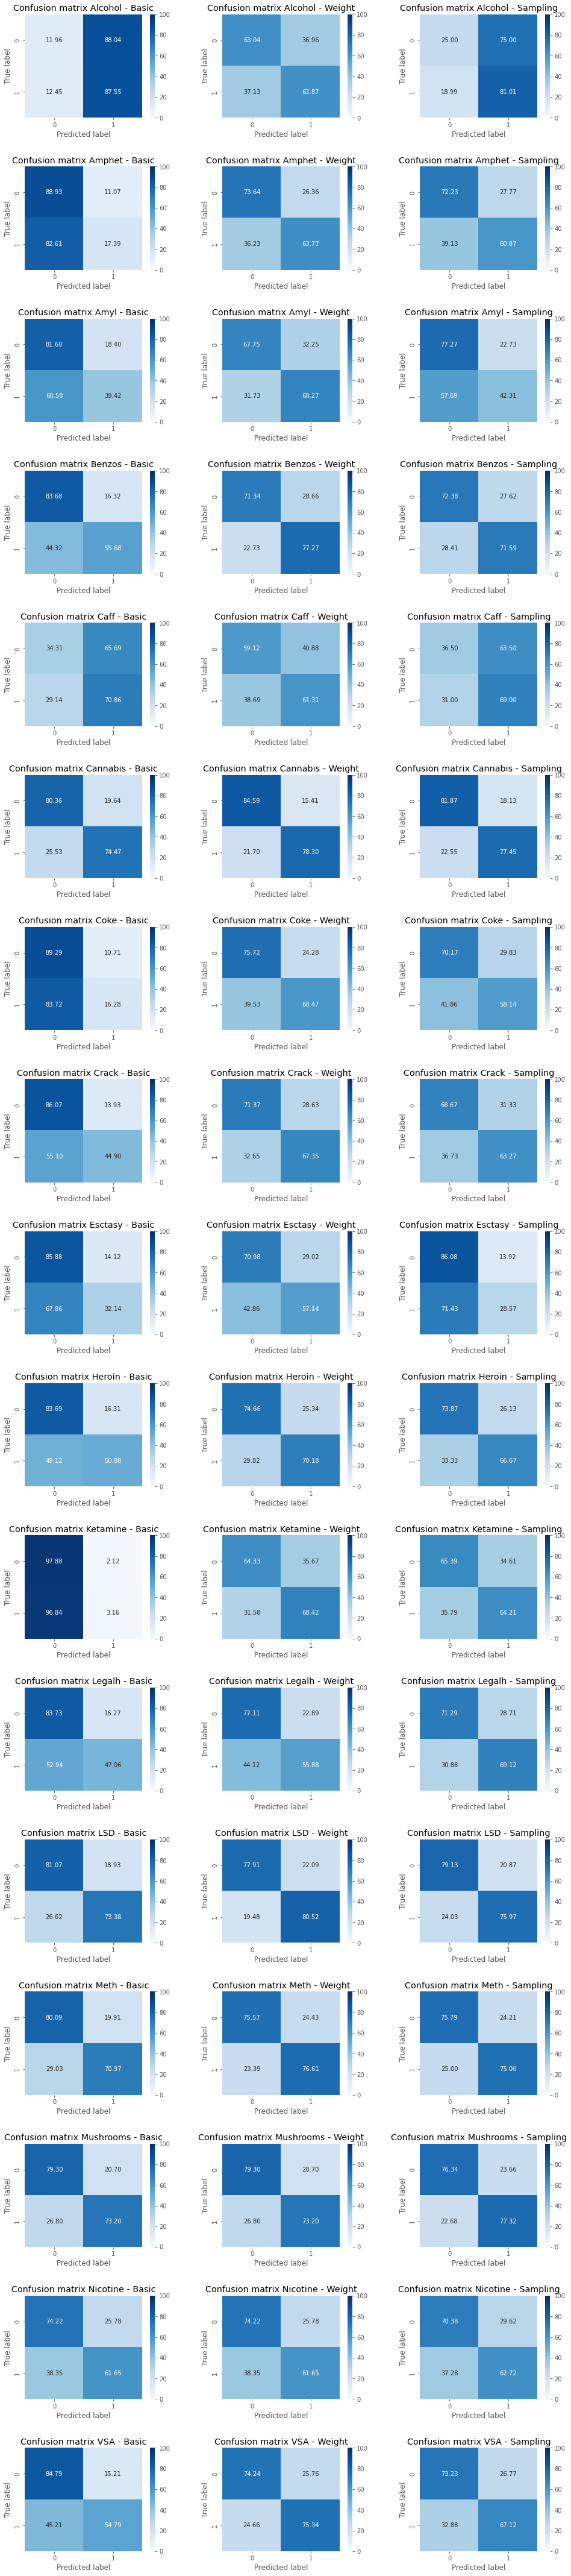

In [ ]:
nrows = 17
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(14,60))
drug_names_ = list(best_model_weight.keys())
i = 0
for r in range(nrows):
    j = 0
    y_train_i = y_train.iloc[:,i]
    y_test_i = y_test.iloc[:,i]
    X_train_sampled, y_train_sampled = list_X[drug_names_[i]], list_y[drug_names_[i]]
    for c in range(ncols):
        model = All_models.iloc[j,i]
        if c!=2:
            model.fit(X_train, y_train_i)
        else:
            model.fit(X_train_sampled, y_train_sampled)
        preds = model.predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix ' + drug_names_[i] + " - " + All_models.index[j])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        j+=1
    i+=1
fig.tight_layout(pad=3.0)
fig.show()

#### Confusion matrix for all drugs

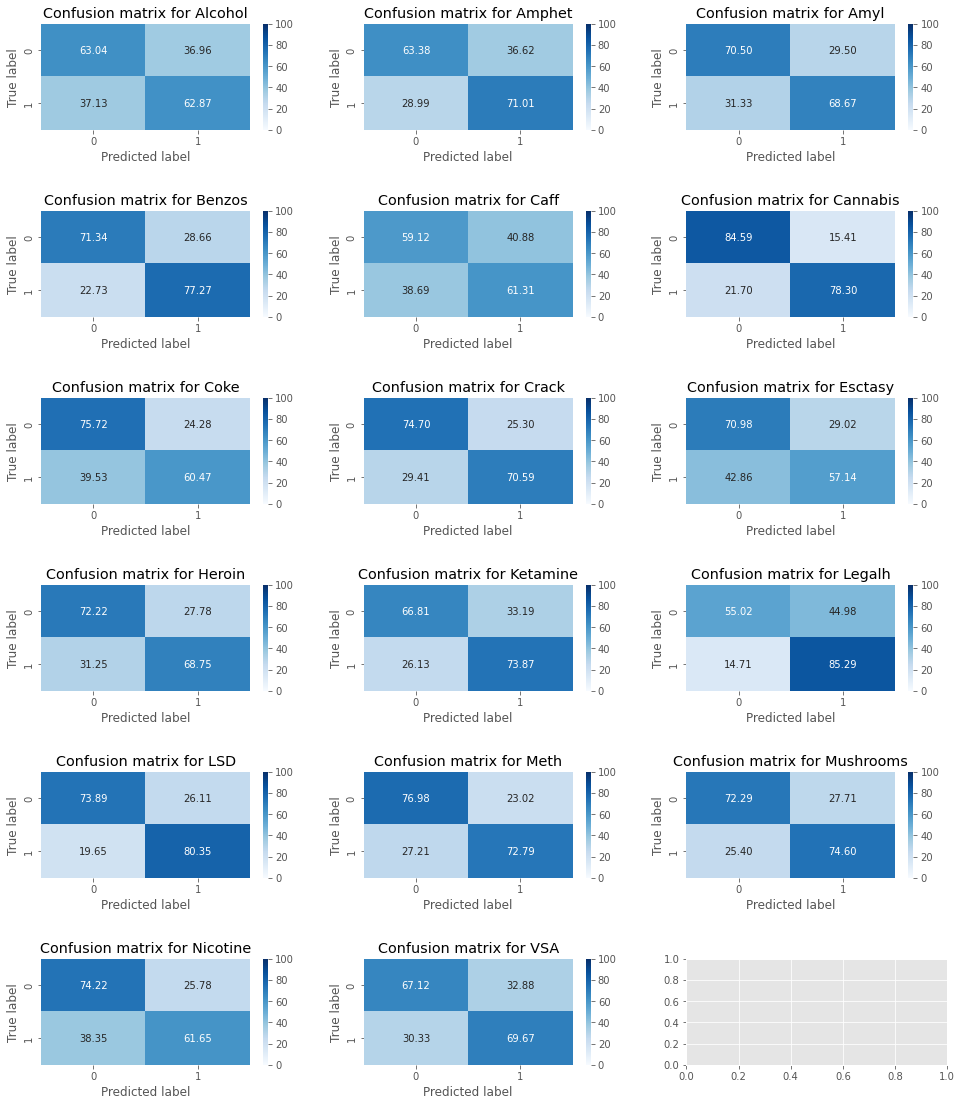

In [ ]:
nrows = 6
ncols = 3
fig, axis = plt.subplots(nrows, ncols, figsize=(14,16))
drug_names_ = list(best_model_weight.keys())
i = 0
for r in range(nrows):
    for c in range(ncols):  
        y_train_i = y_train.iloc[:,i]
        y_test_i = y_test.iloc[:,i]

        model = best_model_weight[drug_names_[i]]
        model.fit(X_train, y_train_i)
        preds = model.predict(X_test)
        conf_mat = confusion_matrix(y_test_i, preds)
        conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)
        sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues',ax=axis[r,c])
        axis[r,c].set_title('Confusion matrix for ' + drug_names_[i])
        axis[r,c].set_ylabel('True label')
        axis[r,c].set_xlabel('Predicted label')
        i+=1
        if i==17:
          break
fig.tight_layout(pad=3.0)
fig.show()

<a name="tuning">

### Tuning hyperparameters

#### Grid search

In [10]:
best_tuned_model = dict()

In [ ]:
All_scores.loc["Weight"]

Alcohol  ...                 VSA
Weight            0.629563  ...            0.747909
Weight  LogisticRegression  ...  LogisticRegression

[2 rows x 17 columns]

In [11]:
model_names = ["LogisticRegression", "SVC", "BernoulliNB"]
models = [LogisticRegression(class_weight="balanced", max_iter=1000), SVC(class_weight="balanced", probability=True), BernoulliNB()]
models_without_params = [LogisticRegression, SVC]
parameters_dict = [
                   {    
                      'penalty':('l2', 'l1', 'elasticnet'),
                      'tol':[1e-3,1e-4,1e-5],
                      'C':[1e-1,1,10],
                      'fit_intercept':(True,False),
                      'intercept_scaling':[1e-1,1,10],
                      'class_weight':['balanced'],
                      'solver':('newton-cg', 'lbfgs','liblinear', 'sag', 'saga'),
                      'multi_class': ['ovr'],
                      #'l1_ratio':[0.1,0.15,0.2,0.25],
                      'max_iter':[10000]
                  },
                  {
                      'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
                      'gamma':('scale', 'auto'),
                      'shrinking':(True,False),
                      'probability':[True],
                      'tol':[1e-2,1e-3,1e-4],
                      'class_weight':["balanced"]
                  },
                  {
                      'alpha':np.arange(1,10,1),
                      'fit_prior':(True,False),
                  }
]

In [12]:
def hyperparam_tuning(y_train, y_test, models_name=model_names, models=models, parameters_dict=parameters_dict):
    perf_test = dict()
    for name, model in zip(model_names, models):
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        perf_test[f"Orignal_{name}"] = {
                "test_balanced_accuracy":balanced_accuracy_score(y_test, preds),
        }
    with tqdm(total=len(models)) as bar:
        for name, model, parameters in zip(model_names, models, parameters_dict):
            clf = GridSearchCV(estimator=model,
                              param_grid=parameters,
                              scoring=make_scorer(balanced_accuracy_score))
            clf.fit(X_train, y_train)
            preds = clf.predict(X_test)
            perf_test[name] = {
                "balanced_accuracy":clf.best_score_,
                "test_balanced_accuracy":balanced_accuracy_score(y_test, preds),
                "best_params_":clf.best_params_
            }
            bar.update(1)
    return perf_test

##### Alcohol

In [ ]:
drug_name = "Alcohol"
results_alcohol = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_alcohol

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
results_alcohol

##### Amphet

In [ ]:
drug_name = "Amphet"
results_amphet = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_amphet

In [ ]:
results_amphet

##### Amyl

In [ ]:
drug_name = "Amyl"
results_amyl = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_amyl

In [ ]:
results_amyl

##### Benzos

In [ ]:
drug_name = "Benzos"
results_benzos = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_benzos

In [ ]:
results_benzos

##### Caff

In [ ]:
drug_name = "Caff"
results_caff = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_caff

In [ ]:
results_caff

##### Cannabis

In [ ]:
drug_name = "Cannabis"
results_cannabis = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_cannabis

In [ ]:
results_cannabis

##### Coke

In [ ]:
drug_name = "Coke"
results_coke = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_coke

In [ ]:
results_coke

##### Crack

In [ ]:
drug_name = "Crack"
results_crack = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_crack

In [ ]:
results_crack

##### Esctasy

In [ ]:
drug_name = "Esctasy"
results_esctasy = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_esctasy

In [ ]:
results_esctasy

##### Heroin

In [ ]:
drug_name = "Heroin"
results_heroin = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_heroin

In [ ]:
results_heroin

##### Ketamine

In [ ]:
drug_name = "Ketamine"
results_ketamine = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_ketamine

In [ ]:
results_ketamine

##### Legalh

In [ ]:
drug_name = "Legalh"
results_legalh = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_legalh

In [ ]:
results_legalh

##### LSD

In [ ]:
drug_name = "LSD"
results_LSD = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_LSD

In [ ]:
results_LSD

##### Meth

In [ ]:
drug_name = "Meth"
results_meth = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_meth

In [ ]:
results_meth

##### Mushrooms

In [ ]:
drug_name = "Mushrooms"
results_mushrooms = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_mushrooms

In [ ]:
results_mushrooms

##### Nicotine

In [ ]:
drug_name = "Nicotine"
results_nicotine = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_nicotine

In [ ]:
results_nicotine

##### VSA

In [ ]:
drug_name = "VSA"
results_VSA = hyperparam_tuning(y_train[drug_name],y_test[drug_name])
best_tuned_model[drug_name] = results_VSA

In [ ]:
results_VSA

##### Save data

In [ ]:
# SAVE
with open("best_params_score_models.pkl", "wb") as pkl_handle:
	pickle.dump(best_tuned_model, pkl_handle)

##### Comparison

In [ ]:
best_models_drugs = dict()
for name in best_tuned_model:
    list_acc = list()
    list_model = list()
    for model, element in best_tuned_model[name].items():
        list_acc.append(element["test_balanced_accuracy"])
        list_model.append(model)
    index_max = np.argmax(list_acc)
    if (index_max<len(models) or index_max==len(best_tuned_model[name])-1):
        best_model = models[index_max]
    else:
        best_model = models_without_params[index_max-len(models)](**best_tuned_model[name][list_model[index_max]]['best_params_'])
    best_models_drugs[name] = best_model

In [ ]:
for name in best_models_drugs:
    best_models_drugs[name].fit(X_train, y_train[name])
    preds = best_models_drugs[name].predict(X_test)
    print(balanced_accuracy_score(y_test[name],preds))

- 0.629563 => 0.629563
- 0.68705 => 0.68704
- 0.680091 => 0.680091
- *0.756823 => 0.743058* => best is SGDClassifier but it's too instable 
- 0.602147 => 0.602147
- 0.81445 => 0.81445
- **0.680911 => 0.68313**
- **0.693601 => 0.711206**
- **0.662185 => 0.704411**
- 0.724158 => 0.724158
- 0.663761 => 0.663761
- **0.734438 => 0.748789**
- **0.792161 => 0.79419**
- **0.760893 => 0.763155**
- 0.762485 => 0.762485
- **0.694704 => 0.679323**
- 0.747909 => 0.747909

<a name="neural_networks">

### Neural Networks

#### First model: Simple MLP

In [12]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=(24,1)),
      keras.layers.Dense(units=40, activation="tanh"),
      keras.layers.Dense(units=20, activation="tanh"),
      keras.layers.Dense(units=30, activation="tanh"),
      keras.layers.Dense(units=2, activation="softmax")                           
])

In [14]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="SGD",#keras.optimizers.SGD(learning_rate=0.01),
    metrics=tfma.metrics.BalancedAccuracy)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense (Dense)               (None, 40)                1000      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,512
Trainable params: 2,512
Non-trainable params: 0
_________________________________________________________________


In [181]:
Alcohol_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Alcohol'], epochs=100, validation_data=(X_test,y_test.loc[:,'Alcohol']))
Cannabis_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Cannabis'], epochs=100, validation_data=(X_test,y_test.loc[:,'Cannabis']))
Coke_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Coke'], epochs=100, validation_data=(X_test,y_test.loc[:,'Coke']))
Crack_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Crack'], epochs=100, validation_data=(X_test,y_test.loc[:,'Crack']))
Heroin_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Heroin'], epochs=100, validation_data=(X_test,y_test.loc[:,'Heroin']))
LSD_NeuralNetwork = model.fit(X_train, y_train.loc[:,'LSD'], epochs=100, validation_data=(X_test,y_test.loc[:,'LSD']))
Meth_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Meth'], epochs=100, validation_data=(X_test,y_test.loc[:,'Meth']))
Mushrooms_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Mushrooms'], epochs=100, validation_data=(X_test,y_test.loc[:,'Mushrooms']))
Amphet_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Amphet'], epochs=100, validation_data=(X_test,y_test.loc[:,'Amphet']))

# Find the error in the Estasy_NeuralNetwork model
#Ecstasy_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Ecstasy'], epochs=100, validation_data=(X_test,y_test.loc[:,'Ecstasy']))

Amyl_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Amyl'], epochs=100, validation_data=(X_test,y_test.loc[:,'Amyl']))
Benzos_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Benzos'], epochs=100, validation_data=(X_test,y_test.loc[:,'Benzos']))
Caff_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Caff'], epochs=100, validation_data=(X_test,y_test.loc[:,'Caff']))
Choc_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Choc'], epochs=100, validation_data=(X_test,y_test.loc[:,'Choc']))
Ketamine_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Ketamine'], epochs=100, validation_data=(X_test,y_test.loc[:,'Ketamine']))
Legalh_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Legalh'], epochs=100, validation_data=(X_test,y_test.loc[:,'Legalh']))
Nicotine_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Nicotine'], epochs=100, validation_data=(X_test,y_test.loc[:,'Nicotine']))
Semer_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Semer'], epochs=100, validation_data=(X_test,y_test.loc[:,'Semer']))
VSA_NeuralNetwork = model.fit(X_train, y_train.loc[:,'VSA'], epochs=100, validation_data=(X_test,y_test.loc[:,'VSA']))

Epoch 1/100


TypeError: ignored

#### More complex model

In [ ]:
model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=(24,)),
      keras.layers.Dense(units=256, activation="relu"),
      keras.layers.Dropout(rate=0.2),
      keras.layers.Dense(units=128, activation="relu"),
      keras.layers.Dropout(rate=0.2),
      keras.layers.Dense(units=64, activation="relu"),
      keras.layers.Dropout(rate=0.2),
      keras.layers.Dense(units=32, activation="relu"),
      keras.layers.Dense(units=7, activation="softmax")                           
])

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=tfma.metrics.BalancedAccuracy
)
model.summary()

In [ ]:
#Takes about 4 min to run the cell on my computer
Alcohol_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Alcohol'], epochs=100, validation_data=(X_test,y_test.loc[:,'Alcohol']))
Cannabis_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Cannabis'], epochs=100, validation_data=(X_test,y_test.loc[:,'Cannabis']))
Coke_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Coke'], epochs=100, validation_data=(X_test,y_test.loc[:,'Coke']))
Crack_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Crack'], epochs=100, validation_data=(X_test,y_test.loc[:,'Crack']))
Heroin_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Heroin'], epochs=100, validation_data=(X_test,y_test.loc[:,'Heroin']))
LSD_NeuralNetwork = model.fit(X_train, y_train.loc[:,'LSD'], epochs=100, validation_data=(X_test,y_test.loc[:,'LSD']))
Meth_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Meth'], epochs=100, validation_data=(X_test,y_test.loc[:,'Meth']))
Mushrooms_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Mushrooms'], epochs=100, validation_data=(X_test,y_test.loc[:,'Mushrooms']))
Amphet_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Amphet'], epochs=100, validation_data=(X_test,y_test.loc[:,'Amphet']))

# Find the error in the Estasy_NeuralNetwork model
#Ecstasy_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Ecstasy'], epochs=100, validation_data=(X_test,y_test.loc[:,'Ecstasy']))

Amyl_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Amyl'], epochs=100, validation_data=(X_test,y_test.loc[:,'Amyl']))
Benzos_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Benzos'], epochs=100, validation_data=(X_test,y_test.loc[:,'Benzos']))
Caff_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Caff'], epochs=100, validation_data=(X_test,y_test.loc[:,'Caff']))
Choc_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Choc'], epochs=100, validation_data=(X_test,y_test.loc[:,'Choc']))
Ketamine_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Ketamine'], epochs=100, validation_data=(X_test,y_test.loc[:,'Ketamine']))
Legalh_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Legalh'], epochs=100, validation_data=(X_test,y_test.loc[:,'Legalh']))
Nicotine_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Nicotine'], epochs=100, validation_data=(X_test,y_test.loc[:,'Nicotine']))
Semer_NeuralNetwork = model.fit(X_train, y_train.loc[:,'Semer'], epochs=100, validation_data=(X_test,y_test.loc[:,'Semer']))
VSA_NeuralNetwork = model.fit(X_train, y_train.loc[:,'VSA'], epochs=100, validation_data=(X_test,y_test.loc[:,'VSA']))


In [ ]:
# print me the accuracy of the neural network model IN PERCENTAGE rounded to 2 decimal places
print("The accuracy of the Alcohol_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Alcohol'])[1]*100,2), "%")
print("The accuracy of the Cannabis_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Cannabis'])[1]*100,2), "%")
print("The accuracy of the Coke_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Coke'])[1]*100,2), "%")
print("The accuracy of the Crack_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Crack'])[1]*100,2), "%")
print("The accuracy of the Heroin_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Heroin'])[1]*100,2), "%")
print("The accuracy of the LSD_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'LSD'])[1]*100,2), "%")
print("The accuracy of the Meth_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Meth'])[1]*100,2), "%")
print("The accuracy of the Mushrooms_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Mushrooms'])[1]*100,2), "%")
print("The accuracy of the Amphet_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Amphet'])[1]*100,2), "%")
print("The accuracy of the Amyl_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Amyl'])[1]*100,2), "%")
print("The accuracy of the Benzos_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Benzos'])[1]*100,2), "%")
print("The accuracy of the Caff_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Caff'])[1]*100,2), "%")
print("The accuracy of the Choc_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Choc'])[1]*100,2), "%")
print("The accuracy of the Ketamine_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Ketamine'])[1]*100,2), "%")
print("The accuracy of the Legalh_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Legalh'])[1]*100,2), "%")
print("The accuracy of the Nicotine_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Nicotine'])[1]*100,2), "%")
print("The accuracy of the Semer_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'Semer'])[1]*100,2), "%")
print("The accuracy of the VSA_Neural_Network model is: ", round(model.evaluate(X_test, y_test.loc[:,'VSA'])[1]*100,2), "%")



18/18 [==============================] - 0s 1ms/step - loss: 10.4693 - accuracy: 0.0230
The accuracy of the Alcohol_Neural_Network model is:  2.3 %
18/18 [==============================] - 0s 1ms/step - loss: 5.6471 - accuracy: 0.2491
The accuracy of the Cannabis_Neural_Network model is:  24.91 %
18/18 [==============================] - 0s 1ms/step - loss: 2.4493 - accuracy: 0.5495
The accuracy of the Coke_Neural_Network model is:  54.95 %
18/18 [==============================] - 0s 1ms/step - loss: 0.7946 - accuracy: 0.7774
The accuracy of the Crack_Neural_Network model is:  77.74 %
18/18 [==============================] - 0s 2ms/step - loss: 0.8796 - accuracy: 0.7756
The accuracy of the Heroin_Neural_Network model is:  77.56 %
18/18 [==============================] - 0s 1ms/step - loss: 1.9768 - accuracy: 0.5495
The accuracy of the LSD_Neural_Network model is:  54.95 %
18/18 [==============================] - 0s 1ms/step - loss: 1.5959 - accuracy: 0.6996
The accuracy of the Meth_Neur

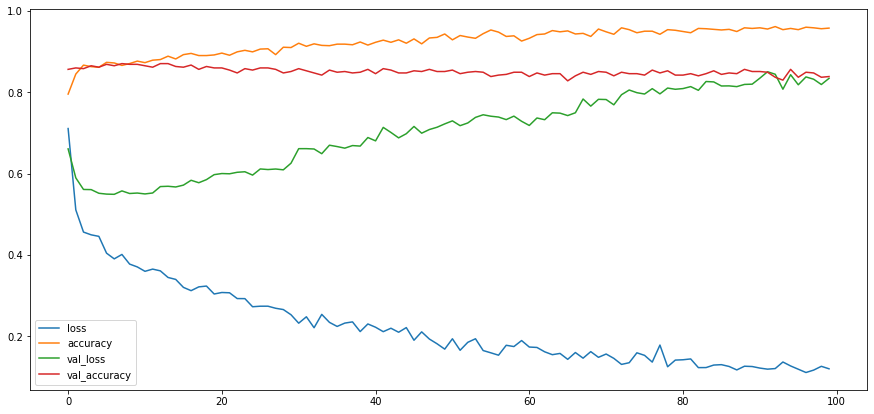

In [ ]:
pd.DataFrame(Crack_NeuralNetwork.history).plot(figsize=(15,7))
plt.show()

<a name="final_models">

## Final models for each drugs
---

In [93]:
models = [LogisticRegression(class_weight="balanced", max_iter=1000), SVC(class_weight="balanced", probability=True), BernoulliNB()]
models_without_params = [LogisticRegression, SVC]

In [171]:
with open("best_params_score_models.pkl", "rb") as pkl_handle:
	  best_tuned_model = pickle.load(pkl_handle)

In [175]:
best_models_drugs = dict()
for name in best_tuned_model:
    list_acc = list()
    list_model = list()
    for model, element in best_tuned_model[name].items():
        list_acc.append(element["test_balanced_accuracy"])
        list_model.append(model)
    index_max = np.argmax(list_acc)
    if (index_max<len(models) or index_max==len(best_tuned_model[name])-1):
        best_model = models[index_max]
    else:
        best_model = models_without_params[index_max-len(models)](**best_tuned_model[name][list_model[index_max]]['best_params_'])
    best_models_drugs[name] = best_model

In [94]:
def evaluation_report(name):
    best_models_drugs[name].fit(X_train, y_train[name])
    preds = best_models_drugs[name].predict(X_test)

    # Balanced accuracy
    balanced_score = balanced_accuracy_score(y_test[name],preds)

    # Classification report
    classification_report_ = classification_report(y_test[name],preds)

    # Confusion matrix
    conf_mat = confusion_matrix(y_test[name], preds)
    conf_mat_normalized = 100*np.apply_along_axis(lambda x: x/x.sum(), axis=1, arr=conf_mat)

    # ROC curve, AUC
    probs = best_models_drugs[name].predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test[name], preds)
    roc_auc = auc(fpr, tpr)

    print(f"Evaluation {name}")
    print("Model used:",best_models_drugs[name])
    print("Balanced accuracy score:", balanced_score)
    print("AUC:", roc_auc)
    print("\nClassification report:", classification_report_,sep="\n")

    fig, axes = plt.subplots(1,2,figsize=(14,5))

    sns.heatmap(conf_mat_normalized, annot=True,vmin=0, vmax=100, fmt='.2f', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion matrix for ' + name)
    axes[0].set_xlabel('Predicted label')
    axes[0].set_ylabel('True label')

    axes[1].set_title('ROC curve for ' + name)
    axes[1].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    axes[1].legend(loc = 'lower right')
    axes[1].plot([0, 1], [0, 1],'r--')
    axes[1].set_xlim([0, 1])
    axes[1].set_ylim([0, 1])
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_xlabel('False Positive Rate')

    plt.show()

<a name="alcohol">

### Alcohol

Evaluation Alcohol
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6295633828655293
AUC: 0.665978719501009

Classification report:
              precision    recall  f1-score   support

           0       0.25      0.63      0.36        92
           1       0.90      0.63      0.74       474

    accuracy                           0.63       566
   macro avg       0.57      0.63      0.55       566
weighted avg       0.79      0.63      0.68       566



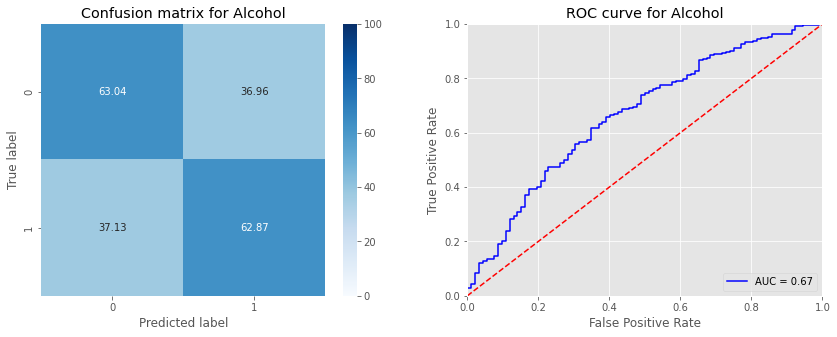

In [86]:
evaluation_report("Alcohol")

<a name="amphet">

### Amphet

Evaluation Amphet
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6870498352433441
AUC: 0.7754352200157466

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       497
           1       0.25      0.64      0.36        69

    accuracy                           0.72       566
   macro avg       0.59      0.69      0.59       566
weighted avg       0.85      0.72      0.77       566



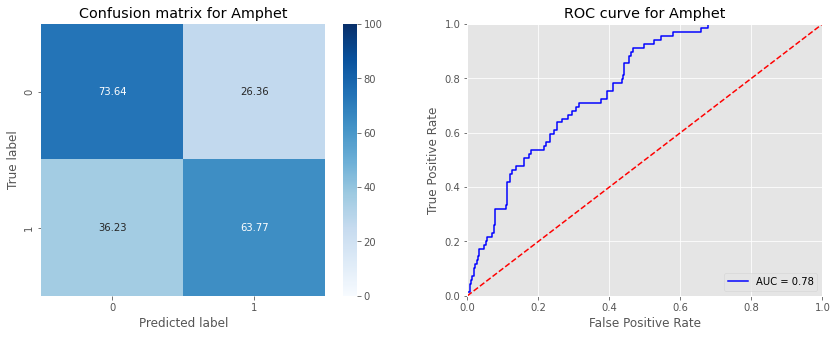

In [87]:
evaluation_report("Amphet")

<a name="amyl">

### Amyl

Evaluation Amyl
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6800907425907425
AUC: 0.7346403596403596

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       462
           1       0.32      0.68      0.44       104

    accuracy                           0.68       566
   macro avg       0.61      0.68      0.61       566
weighted avg       0.80      0.68      0.71       566



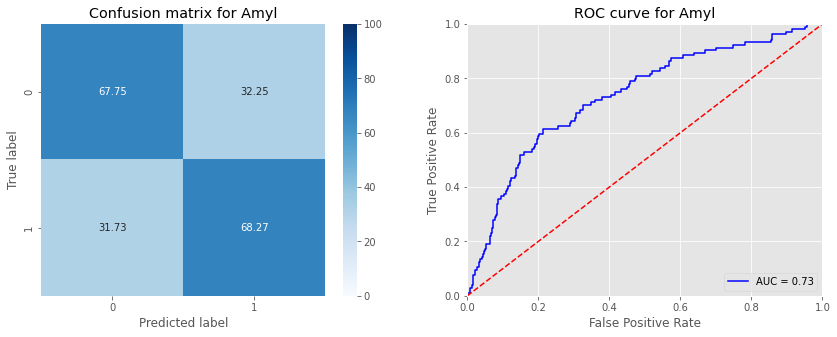

In [88]:
evaluation_report("Amyl")

<a name="benzos">

### Benzos

Evaluation Benzos
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.7430581970330924
AUC: 0.7977367820464055

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81       478
           1       0.33      0.77      0.46        88

    accuracy                           0.72       566
   macro avg       0.64      0.74      0.64       566
weighted avg       0.85      0.72      0.76       566



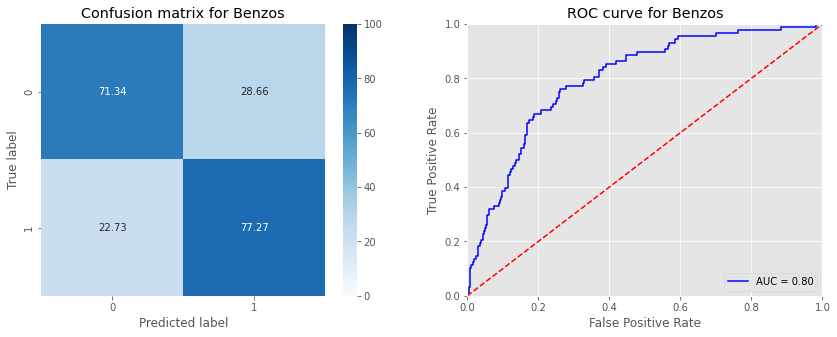

In [89]:
evaluation_report("Benzos")

<a name="caff">

### Caff

Evaluation Caff
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.6021472444830109
AUC: 0.6369931771391626

Classification report:
              precision    recall  f1-score   support

           0       0.33      0.59      0.42       137
           1       0.82      0.61      0.70       429

    accuracy                           0.61       566
   macro avg       0.58      0.60      0.56       566
weighted avg       0.70      0.61      0.64       566



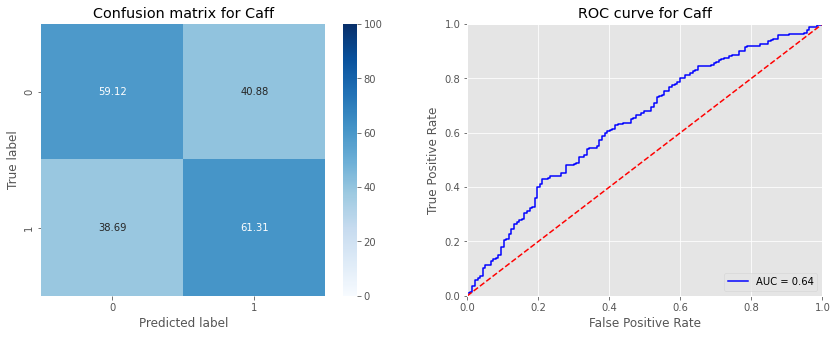

In [90]:
evaluation_report("Caff")

<a name="cannabis">

### Cannabis

Evaluation Cannabis
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.8144500867776563
AUC: 0.8839622035096741

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       331
           1       0.78      0.78      0.78       235

    accuracy                           0.82       566
   macro avg       0.81      0.81      0.81       566
weighted avg       0.82      0.82      0.82       566



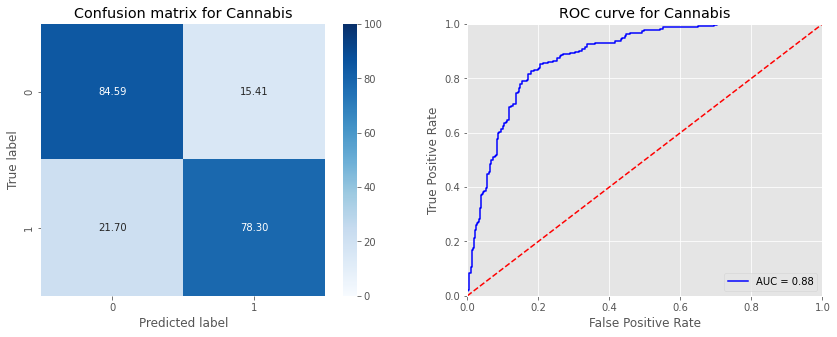

In [91]:
evaluation_report("Cannabis")

<a name="coke">

### Coke

Evaluation Coke
Model used: SVC(class_weight='balanced', gamma='auto', probability=True, tol=0.01)
Balanced accuracy score: 0.6831339766107876
AUC: 0.7169727422295344

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82       523
           1       0.16      0.65      0.25        43

    accuracy                           0.71       566
   macro avg       0.56      0.68      0.54       566
weighted avg       0.90      0.71      0.78       566



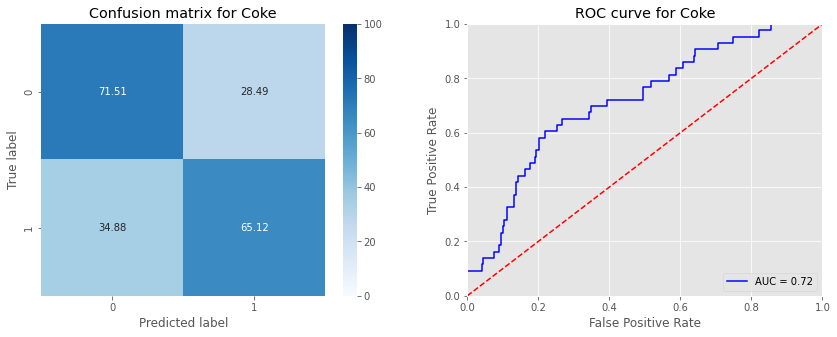

In [95]:
evaluation_report("Coke")

<a name="crack">

### Crack

Evaluation Crack
Model used: LogisticRegression(C=0.1, class_weight='balanced', intercept_scaling=0.1,
                   max_iter=10000, multi_class='ovr', penalty='l1',
                   solver='liblinear', tol=0.001)
Balanced accuracy score: 0.7112067264042947
AUC: 0.7639047882208976

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79       517
           1       0.18      0.76      0.29        49

    accuracy                           0.67       566
   macro avg       0.57      0.71      0.54       566
weighted avg       0.90      0.67      0.75       566



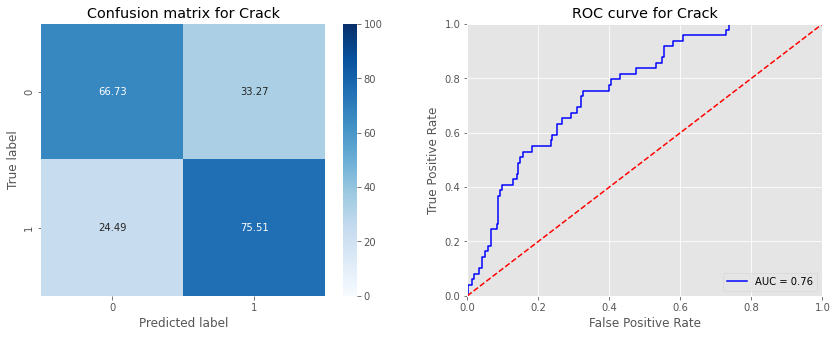

In [96]:
evaluation_report("Crack")

<a name="esctasy">

### Esctasy

Evaluation Esctasy
Model used: SVC(class_weight='balanced', gamma='auto', kernel='sigmoid', probability=True,
    tol=0.01)
Balanced accuracy score: 0.7044117647058823
AUC: 0.7233893557422969

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.66      0.78       510
           1       0.19      0.75      0.31        56

    accuracy                           0.67       566
   macro avg       0.58      0.70      0.55       566
weighted avg       0.88      0.67      0.73       566



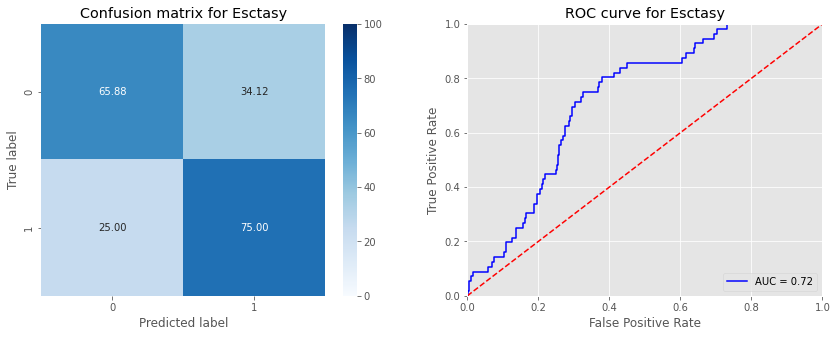

In [97]:
evaluation_report("Esctasy")

<a name="heroin">

### Heroin

Evaluation Heroin
Model used: SVC(class_weight='balanced', probability=True)
Balanced accuracy score: 0.7241581360079964
AUC: 0.799365801537242

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.75      0.84       509
           1       0.24      0.70      0.35        57

    accuracy                           0.74       566
   macro avg       0.60      0.72      0.60       566
weighted avg       0.88      0.74      0.79       566



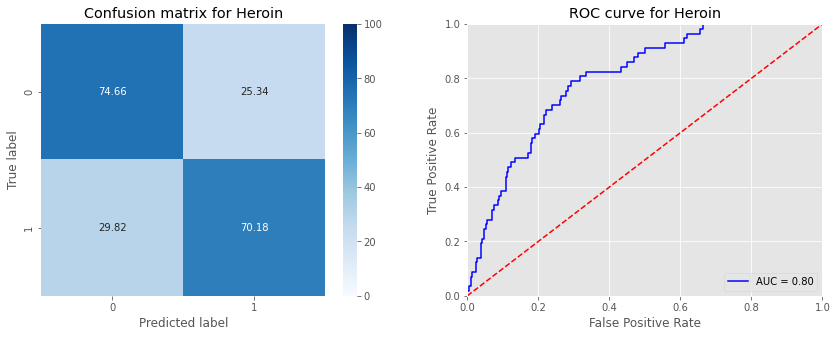

In [177]:
evaluation_report("Heroin")

<a name="ketamine">

### Ketamine

Evaluation Ketamine
Model used: SVC(class_weight='balanced', probability=True)
Balanced accuracy score: 0.6637613141133087
AUC: 0.7221142027042128

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       471
           1       0.28      0.68      0.40        95

    accuracy                           0.65       566
   macro avg       0.59      0.66      0.58       566
weighted avg       0.80      0.65      0.69       566



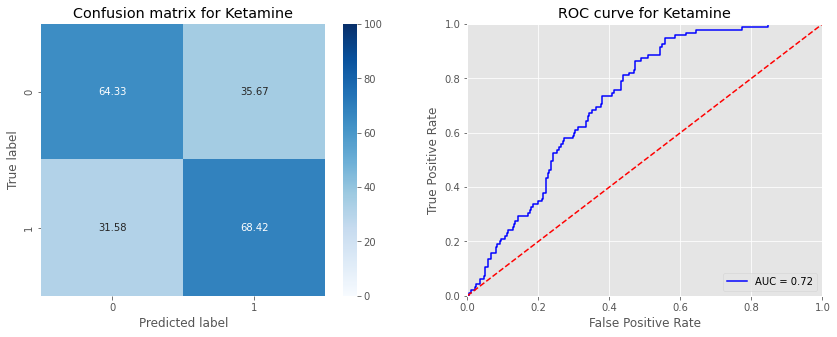

In [176]:
evaluation_report("Ketamine")

<a name="legalh">

### Legalh

Evaluation Legalh
Model used: SVC(class_weight='balanced', gamma='auto', kernel='sigmoid', probability=True,
    tol=0.01)
Balanced accuracy score: 0.748789274746043
AUC: 0.805752421450508

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80       498
           1       0.26      0.81      0.40        68

    accuracy                           0.70       566
   macro avg       0.61      0.75      0.60       566
weighted avg       0.88      0.70      0.75       566



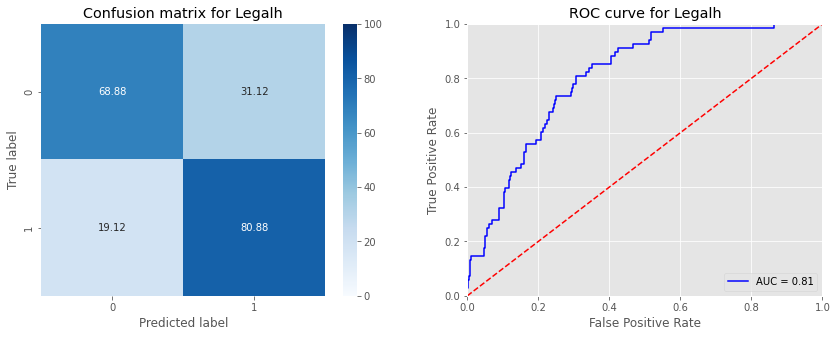

In [99]:
evaluation_report("Legalh")

<a name="LSD">

### LSD

Evaluation LSD
Model used: SVC(class_weight='balanced', gamma='auto', kernel='sigmoid', probability=True,
    tol=0.01)
Balanced accuracy score: 0.7941936704072626
AUC: 0.863809733955365

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.78      0.84       412
           1       0.58      0.81      0.67       154

    accuracy                           0.79       566
   macro avg       0.75      0.79      0.76       566
weighted avg       0.82      0.79      0.80       566



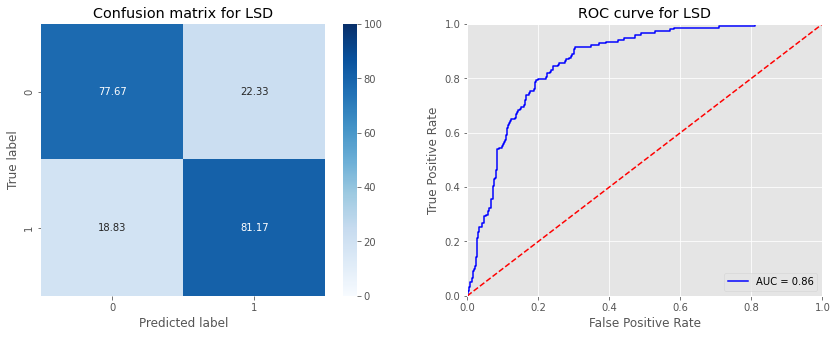

In [100]:
evaluation_report("LSD")

<a name="Meth">

### Meth

Evaluation Meth
Model used: LogisticRegression(C=0.1, class_weight='balanced', intercept_scaling=0.1,
                   max_iter=10000, multi_class='ovr', tol=0.001)
Balanced accuracy score: 0.7631550138665888
AUC: 0.8270690410159101

Classification report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       442
           1       0.47      0.77      0.58       124

    accuracy                           0.76       566
   macro avg       0.70      0.76      0.71       566
weighted avg       0.82      0.76      0.78       566



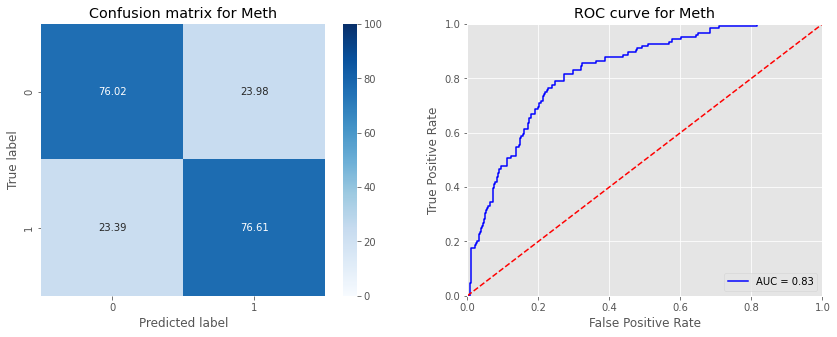

In [101]:
evaluation_report("Meth")

<a name="mushrooms">

### Mushrooms

Evaluation Mushrooms
Model used: BernoulliNB()
Balanced accuracy score: 0.762484757787385
AUC: 0.835363318922514

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       372
           1       0.65      0.73      0.69       194

    accuracy                           0.77       566
   macro avg       0.75      0.76      0.75       566
weighted avg       0.78      0.77      0.78       566



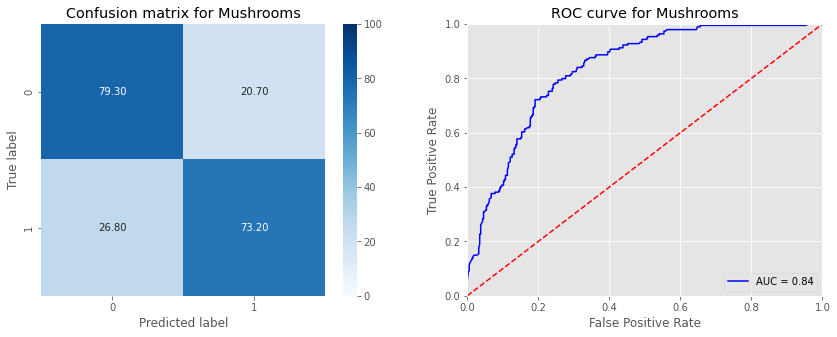

In [102]:
evaluation_report("Mushrooms")

<a name="nicotine">

### Nicotine

Evaluation Nicotine
Model used: BernoulliNB()
Balanced accuracy score: 0.6793238669713886
AUC: 0.7412673435490116

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       287
           1       0.70      0.62      0.66       279

    accuracy                           0.68       566
   macro avg       0.68      0.68      0.68       566
weighted avg       0.68      0.68      0.68       566



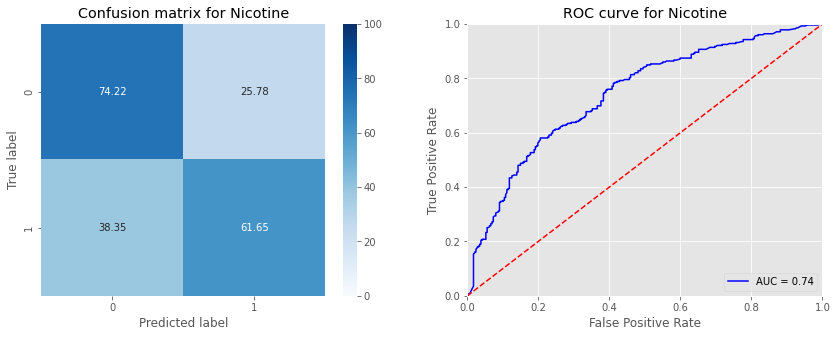

In [103]:
evaluation_report("Nicotine")

<a name="vsa">

### VSA

Evaluation VSA
Model used: LogisticRegression(class_weight='balanced', max_iter=1000)
Balanced accuracy score: 0.7479090833310178
AUC: 0.8206118536219401

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       493
           1       0.30      0.75      0.43        73

    accuracy                           0.74       566
   macro avg       0.63      0.75      0.63       566
weighted avg       0.87      0.74      0.78       566



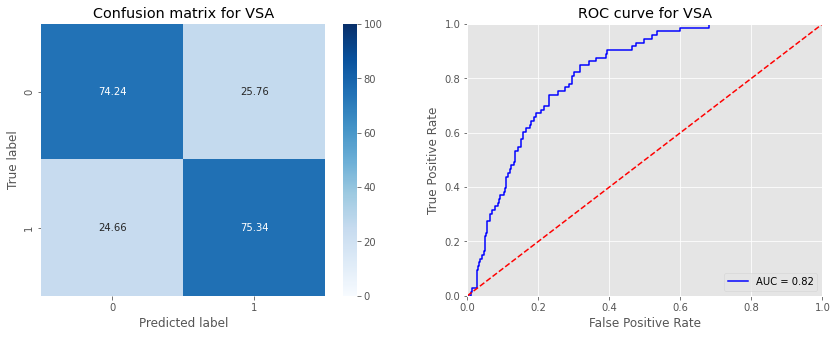

In [104]:
evaluation_report("VSA")

<a name="all">

### ALL

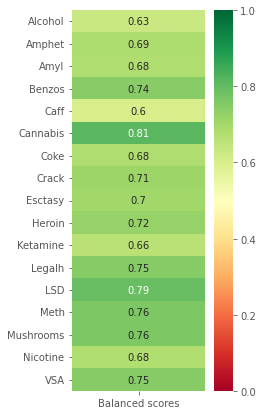

In [116]:
model_names = list(best_models_drugs.keys())
model_scores = list()
for name in best_models_drugs:
    best_models_drugs[name].fit(X_train, y_train[name])
    preds = best_models_drugs[name].predict(X_test)
    model_scores.append(balanced_accuracy_score(y_test[name],preds))

final_scores = pd.DataFrame({"Balanced scores": model_scores}, index=model_names)
plt.figure(figsize=(3,7))
sns.heatmap(final_scores,annot=True,cmap = 'RdYlGn',vmax=1.0,vmin=0.0)
plt.show()